## Import tools

In [19]:
# data manipulation
import pandas as pd
from pandas.plotting import table
import numpy as np

# system
import glob
import os

# data visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap
matplotlib.rcParams.update({'font.size': 16})

# image vizualiation
from IPython.display import Image

# data analysis
import scipy
from scipy.stats import chisquare
from scipy.signal import find_peaks
from sklearn.feature_selection import chi2

# metrics to compare two curves
from frechetdist import frdist

# pretty printing
from pprint import pprint

## Functions

In [20]:
darker = 0.7

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

In [21]:
def put_freq(x, Int, axis, fontsize=14, 
             rotation=90, color="black", shift_Int=25, shift_x=-10, 
             threshold=None,
             distance=None,
             prominence=None,
             width=None,
             height=None):
    """
    Adds the x axis value to the peaks of the curve.
    """
    for peak in find_peaks(Int.astype(float), threshold, distance, prominence, width, height)[0]:
        axis.annotate(str(round(x[peak])), 
                           xytext=(x[peak]+shift_x, Int[peak]+shift_Int), 
                           xy=(x[peak], Int[peak]), fontsize=fontsize, rotation=rotation, color=color)

In [22]:
def plotting(path, title, letter_place, fig_name, name_dict, nrows=6, ncols=2, darker = 0.6):
    """
    Function to plot DFT results from Crystal Code. 
    path = string, address of files i. e. 'HZO_112/*.txt' (obs: convert the files using the converting function if needed)
    title = string, title of the graph
    letter_place = integer, configuration position number inside path
    fig_name = string, name of figure to save
    darker = float, to darkent the rainbow colors of the graph lines
    """
    # reading the files from folder
    filenames_HZO = glob.glob(path)
    # putting the files in order
    filenames_HZO.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    # creating figure and axes
    fig, ax = plt.subplots(nrows, ncols, sharex=True)

    # white background to appears in dark jupyter theme
    rect = fig.patch
    rect.set_facecolor('white')

    # empty dict to put the files inside
    name_dict = {}

    # creating a range of colors in rainbow style
    n = len(filenames_HZO)
    colors = cm.rainbow(np.linspace(0, 1, n))

    # itarating over the files, colors and columns fot he figure
    for i, j, z in zip(filenames_HZO, colors, range(len(filenames_HZO))):
        #opening the files with pandas
        config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                    names=["Frequency", "Wavelength", 
                           "Raw_abs", "Classical_abs", 
                           "Rayleigh_scat1", "Rayleigh_scat2", 
                           "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
        # saving data to dictionary
        name_dict[i[letter_place]] = config[["Frequency", "Raw_abs"]]

        # plotting half of data into the first column of figure
        if z < nrows:
                ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                           label=i[letter_place], 
                           color=adjust_lightness(j, darker))
                ax[z,0].legend()  
                ax[z,0].tick_params(axis='x', direction='in')
                ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
                ax[z,0].set_xlim(0, 800)
                # adding the frequency values to the peaks
                for peak in find_peaks(config.Raw_abs[:])[0]:
        #             print(peak)

                    #annotation
                    ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                     xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

        else:
                ax[z-nrows, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                                label=i[letter_place], 
                                color=adjust_lightness(j, darker))
                ax[z-nrows, 1].legend()  
                ax[z-nrows, 1].tick_params(axis='x', direction='in')
                ax[z-nrows, 1].set_ylim(-5, max(config.Raw_abs[:])+60)

                for peak in find_peaks(config.Raw_abs[:])[0]:
                    ax[z-nrows, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                     xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)


    fig.text(0.45, 0.92, title, fontsize = 17)
    fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
    fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
    plt.rcParams.update({'font.size': 16})
    fig.set_size_inches(12.5, 20.5)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.2, 
                        hspace=0)


    fig.savefig(fig_name, bbox_inches="tight")

In [23]:
import nbformat as nbf
# from glob import glob

import uuid
def get_cell_id(id_length=8):
    return uuid.uuid4().hex[:id_length]

# your notebook name/keyword
nb_name = 'my_notebook'
notebooks = list(filter(lambda x: nb_name in x, glob.glob("./*.ipynb", recursive=True)))

# iterate over notebooks
for ipath in sorted(notebooks):
    # load notebook
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)
    
    cell_ids = []
    for cell in ntbk.cells:
        cell_ids.append(cell['id'])

    # reset cell ids if there are duplicates
    if not len(cell_ids) == len(set(cell_ids)): 
        for cell in ntbk.cells:
            cell['id'] = get_cell_id()

        nbf.write(ntbk, ipath)

## Converting files extentions

In [237]:
# filenames_HZO211 = glob.glob('HZO_211/*.irspec')
# # filenames_HZO211
# for file in filenames_HZO211:
#     base = os.path.splitext(file)[0]
#     os.rename(file, base + ".txt")

# filenames_txt = glob.glob('*.txt')

In [238]:
# filenames_HZO112 = glob.glob('HZO_112/*.irspec')
# # filenames_HZO211
# for file in filenames_HZO112:
#     base = os.path.splitext(file)[0]
#     os.rename(file, base + ".txt")

# filenames_txt = glob.glob('*.txt')

In [239]:
# filenames_HZO121 = glob.glob('HZO_121/*.irspec')
# # filenames_HZO211
# for file in filenames_HZO121:
#     base = os.path.splitext(file)[0]
#     os.rename(file, base + ".txt")

# filenames_txt = glob.glob('*.txt')

## Theory behind the weighted average of multiple IR spectra using the supercell method

The final theoretical IR spectrum, with intensity $\bar{I}_N(\nu,T)$, can be obtained from a weighted average over all the spectra, $I_i\left(\nu\right)$, corresponding to each of the $N = 14$ (HZO 121), $N = 12$ (HZO 112) and $N = 13$ (HZO 211) configurations in the orthorhombic (space group 29) geometry following:

\begin{equation}
  \bar{I}_N\left(\nu,T\right)=\sum_{i=1}^{N}{P_i\left(V,T\right) \times {I_i}\left(\nu\right)}
\label{eq1}
\end{equation}


and by using the Boltzmann occupation probability, $P_i\left(V,T\right)$, given by:


\begin{equation}
  {P_i}\left(V,T\right)=\frac{m_i\exp{\left(-\frac{E_i}{k_BT}\right)}}{\mathrm{\Omega}}\;\;\text{ with }\;\;{\Omega}=\sum_{i=1}^{N}{{m_i}\exp\left(-\frac{E_i}{k_BT}\right)}. 
\label{eq2}
\end{equation}

## HZO Supercell FIXDEF ORTHO29
- this is the one we are going to put inside the paper
- the energies were extracted from the IR output files, this is done inside another notebook: http://localhost:8888/notebooks/OneDrive/Python/HZO/Params_extraction/extracting_params_out_DFT_file.ipynb#

### HZO 112 FIXDEF

In [11]:
filenames_HZO_112_FIXDEF = glob.glob('HZO_112_FIXDEF_IR/*/*/*.irspec')
print(filenames_HZO_112_FIXDEF)

# empty dictionary to add the normalized data
d_HZO_112_FIXDEF = {}

# the list of non normalized configurations
non_norm = ["H", "K", "L"]

for i in filenames_HZO_112_FIXDEF:
#     print(i[-23])
#     print(i[51:-7])
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    if i[-23] in non_norm:
        config["Raw_abs"] = config.Raw_abs*2
        d_HZO_112_FIXDEF[i[51:-7]] = config[["Frequency", "Raw_abs"]]
    else:
        d_HZO_112_FIXDEF[i[51:-7]] = config[["Frequency", "Raw_abs"]]
        
# for k, nrow in zip(d_HZO_112.keys(), range(len(filenames_HZO_112))):
#     ax[nrow].plot(d_HZO_112[k]["Frequency"], d_HZO_112[k]["Raw_abs"], label = k)
#     ax[nrow].legend()

['HZO_112_FIXDEF_IR\\HZO_112_A_OPTGEOM_FIXDEF\\2328561\\HZO_112_A_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_B_OPTGEOM_FIXDEF\\2328578\\HZO_112_B_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_C_OPTGEOM_FIXDEF\\2328623\\HZO_112_C_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_D_OPTGEOM_FIXDEF\\2328639\\HZO_112_D_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_E_OPTGEOM_FIXDEF\\2328657\\HZO_112_E_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_F_OPTGEOM_FIXDEF\\2328690\\HZO_112_F_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_G_OPTGEOM_FIXDEF\\2328702\\HZO_112_G_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_H_OPTGEOM_FIXDEF\\2328724\\HZO_112_H_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_I_OPTGEOM_FIXDEF\\2328746\\HZO_112_I_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_J_OPTGEOM_FIXDEF\\2328772\\HZO_112_J_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\HZO_112_K_OPTGEOM_FIXDEF\\2328798\\HZO_112_K_OPTGEOM_FIXDEF.irspec', 'HZO_112_FIXDEF_IR\\

HZO_112_FIXDEF_IR\HZO_112_A_OPTGEOM_FIXDEF\2328561\HZO_112_A_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_B_OPTGEOM_FIXDEF\2328578\HZO_112_B_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_C_OPTGEOM_FIXDEF\2328623\HZO_112_C_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_D_OPTGEOM_FIXDEF\2328639\HZO_112_D_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_E_OPTGEOM_FIXDEF\2328657\HZO_112_E_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_F_OPTGEOM_FIXDEF\2328690\HZO_112_F_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_G_OPTGEOM_FIXDEF\2328702\HZO_112_G_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_H_OPTGEOM_FIXDEF\2328724\HZO_112_H_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_I_OPTGEOM_FIXDEF\2328746\HZO_112_I_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_J_OPTGEOM_FIXDEF\2328772\HZO_112_J_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_K_OPTGEOM_FIXDEF\2328798\HZO_112_K_OPTGEOM_FIXDEF.irspec
HZO_112_FIXDEF_IR\HZO_112_L_OPTGEOM_FIXDEF\2328817\HZO_112_L_OPTGEOM_FIXDEF.irspec


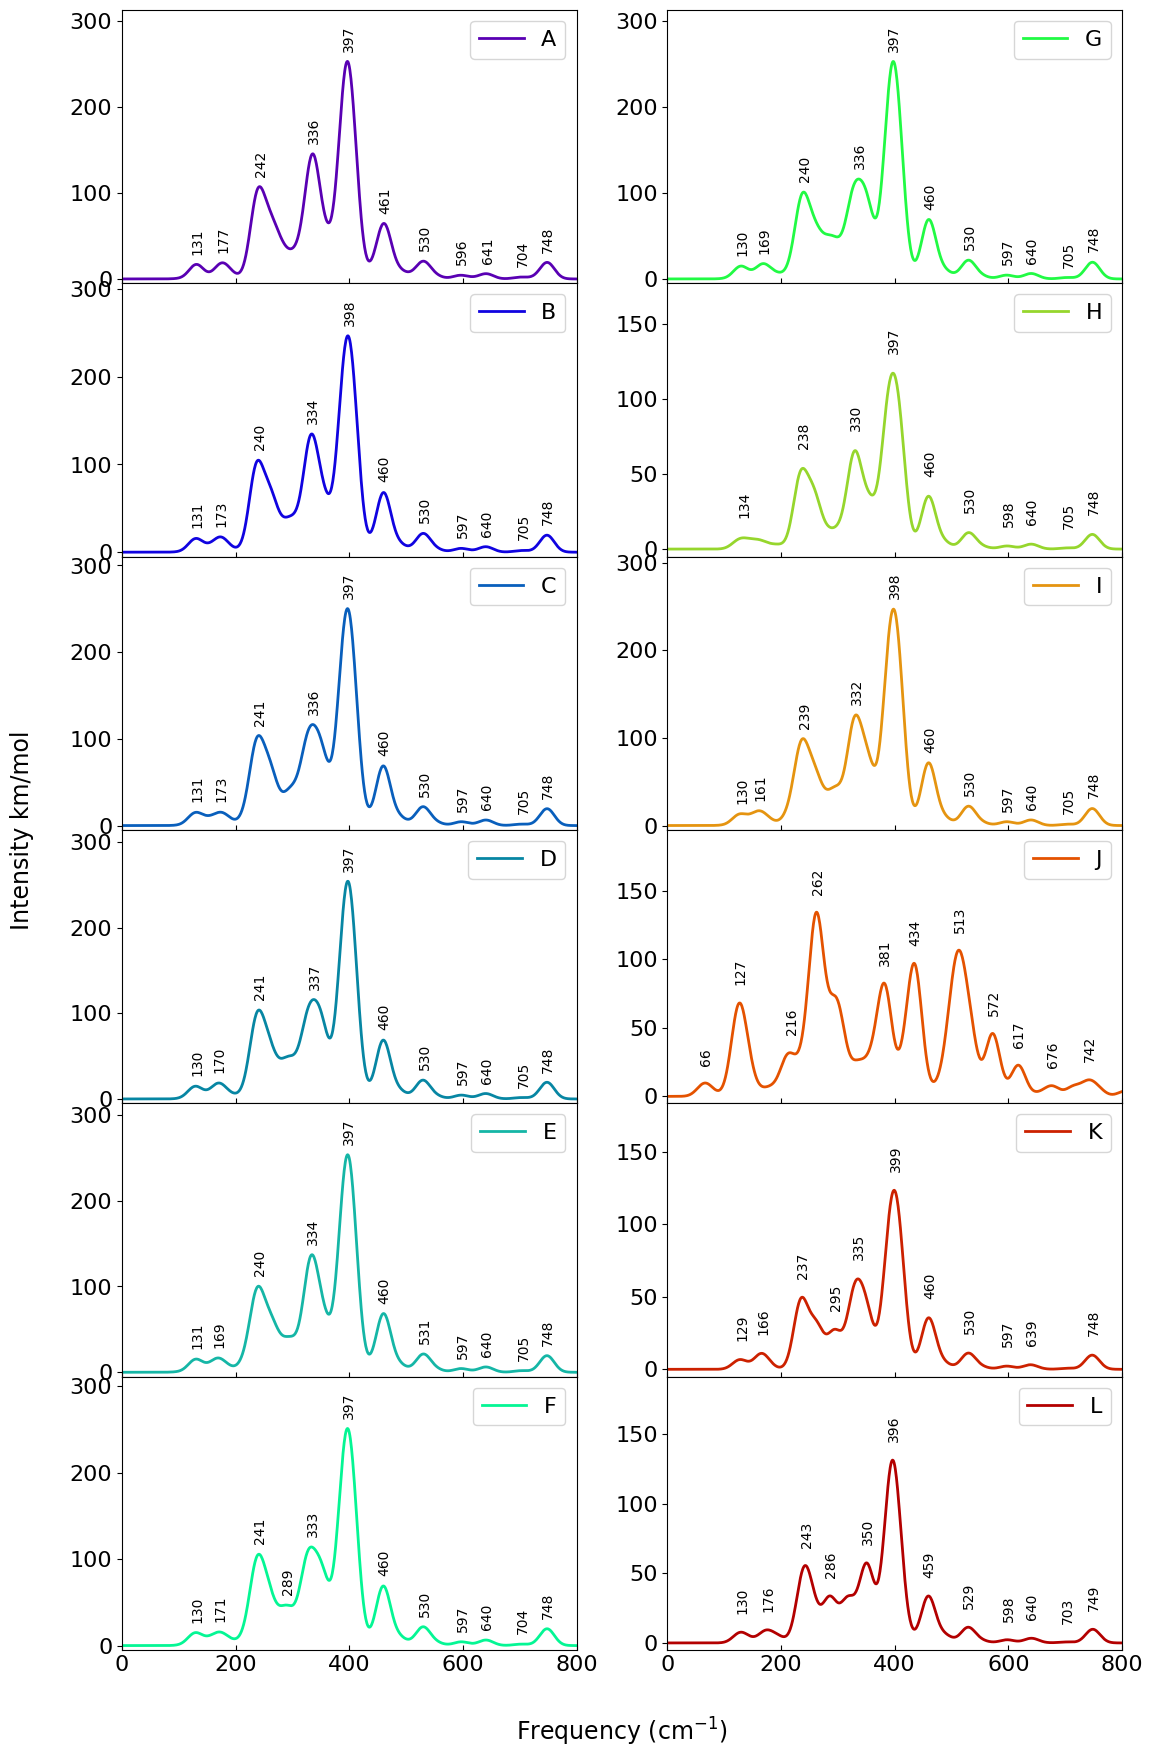

In [12]:
# reading the files from folder
filenames_HZO_112_FIXDEF = glob.glob('HZO_112_FIXDEF_IR/*/*/*.irspec')
# putting the files in order
filenames_HZO_112_FIXDEF.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# creating figure and axes
fig, ax = plt.subplots(nrows=6, ncols=2, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = len(filenames_HZO_112_FIXDEF)
colors = cm.rainbow(np.linspace(0, 1, n))

# itarating over the files, colors and columns fot he figure
for i, j, z in zip(filenames_HZO_112_FIXDEF, colors, range(len(filenames_HZO_112_FIXDEF))):
    print(i)
    #opening the files with pandas
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    
    non_norm = ["H", "K", "L"]
    
    # plotting half of data into the first column of figure
    if z < 6:
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                       label=i[-23], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(config.Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

    else:
        if i[16] in non_norm:
            normalized = config.Raw_abs[:800]*2
            ax[z-6, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-23], 
                            color=adjust_lightness(j, darker))
            ax[z-6, 1].set_ylim(-5, max(normalized)+80)
            for peak in find_peaks(normalized)[0]:
                ax[z-6, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
            
        else:   
            ax[z-6, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                            label=i[-23], 
                            color=adjust_lightness(j, darker))
            
            ax[z-6, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
            for peak in find_peaks(config.Raw_abs[:])[0]:
                ax[z-6, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        ax[z-6, 1].legend() 
        ax[z-6, 1].tick_params(axis='x', direction='in')
    
# fig.text(0.45, 0.92, 'HZO 112 FIXDEF', fontsize = 17)
fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)


# fig.savefig("HZO_DFT_112_FIXDEF_IR_atoms_unit_cell.png", bbox_inches="tight")

### HZO 121 FIXDEF

In [13]:
# listing all files to plot
filenames_HZO_121_FIXDEF = glob.glob('HZO_121_FIXDEF_IR/*/*/*.irspec')
print(filenames_HZO_121_FIXDEF)

# # white background to appears in dark jupyter theme
# fig, ax = plt.subplots(nrows=len(filenames_HZO_121), ncols=1, figsize=(6,35))
# rect = fig.patch
# rect.set_facecolor('white')

# empty dictionary to add the normalized data
d_HZO_121_FIXDEF = {}

# only 12 atoms in unit cell, not 24 as the others
non_norm = ["F", "J", "M"]

# iterate over the list of files to plot 
for i in filenames_HZO_121_FIXDEF:
    print(i[-23])
    print(i[51:-7])
    # opens the spectrm file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    if i[-23] in non_norm:
        print(i[-23])
        # calculates the weight of this config
        config["Raw_abs"] = config["Raw_abs"]*2
    else:
        config["Raw_abs"] = config["Raw_abs"]
    # saves this config inside the dict
    d_HZO_121_FIXDEF[i[51:-7]] = config[["Frequency", "Raw_abs"]]

['HZO_121_FIXDEF_IR\\HZO_121_A_OPTGEOM_FIXDEF\\2972244\\HZO_121_A_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_B_OPTGEOM_FIXDEF\\2997924\\HZO_121_B_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_C_OPTGEOM_FIXDEF\\2997925\\HZO_121_C_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_D_OPTGEOM_FIXDEF\\2997934\\HZO_121_D_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_E_OPTGEOM_FIXDEF\\2997929\\HZO_121_E_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_F_OPTGEOM_FIXDEF\\2972236\\HZO_121_F_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_G_OPTGEOM_FIXDEF\\2997931\\HZO_121_G_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_H_OPTGEOM_FIXDEF\\2997927\\HZO_121_H_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_I_OPTGEOM_FIXDEF\\2972234\\HZO_121_I_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_J_OPTGEOM_FIXDEF\\2972241\\HZO_121_J_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\HZO_121_K_OPTGEOM_FIXDEF\\2997926\\HZO_121_K_OPTGEOM_FIXDEF.irspec', 'HZO_121_FIXDEF_IR\\

HZO_121_A_OPTGEOM_FIXDEF A
HZO_121_B_OPTGEOM_FIXDEF B
HZO_121_C_OPTGEOM_FIXDEF C
HZO_121_D_OPTGEOM_FIXDEF D
HZO_121_E_OPTGEOM_FIXDEF E
HZO_121_F_OPTGEOM_FIXDEF F
HZO_121_G_OPTGEOM_FIXDEF G
HZO_121_H_OPTGEOM_FIXDEF H
HZO_121_I_OPTGEOM_FIXDEF I
HZO_121_J_OPTGEOM_FIXDEF J
HZO_121_K_OPTGEOM_FIXDEF K
HZO_121_L_OPTGEOM_FIXDEF L
HZO_121_M_OPTGEOM_FIXDEF M
HZO_121_N_OPTGEOM_FIXDEF N


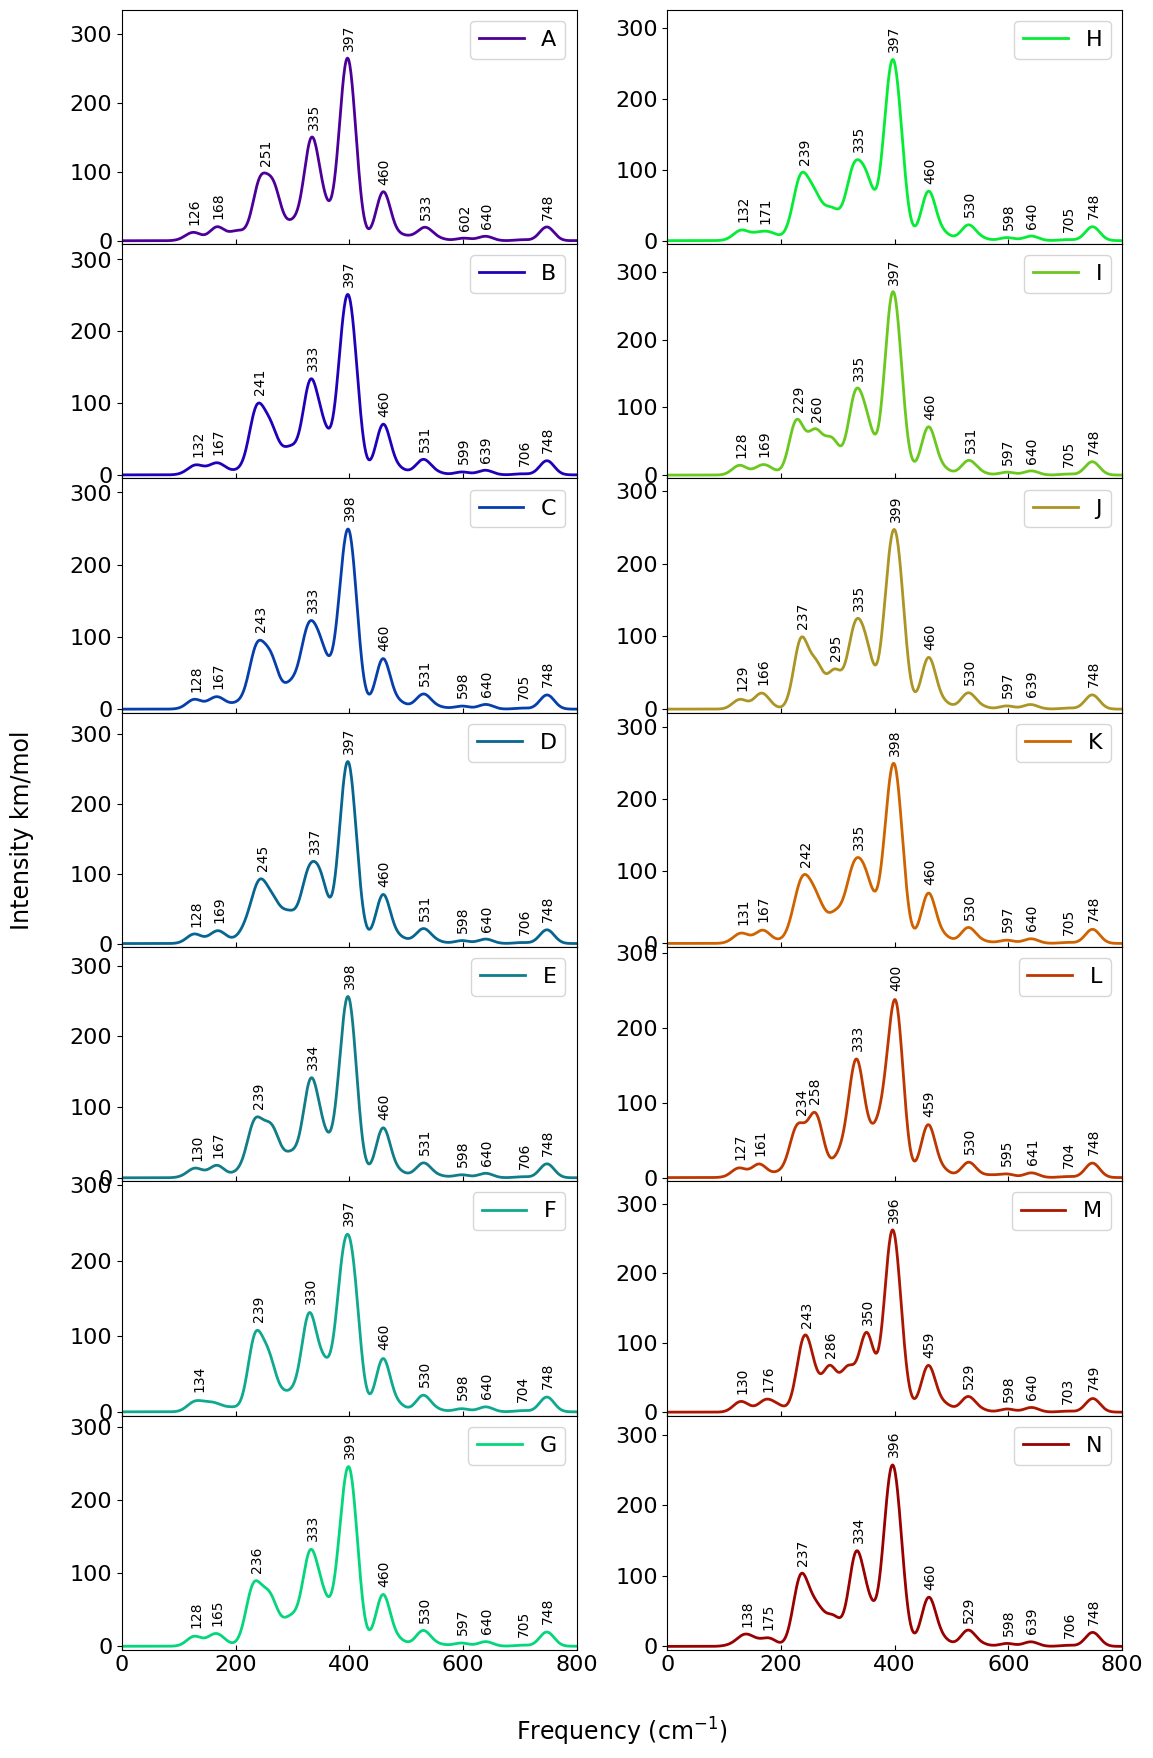

In [15]:
# Plotting HZO 121 using the number of atoms in unit cell
nrows=7
ncols=2
darker=0.6

# creating figure and axes
fig, ax = plt.subplots(nrows, ncols, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = len(d_HZO_121_FIXDEF)
colors = cm.rainbow(np.linspace(0, 1, n))

# iterating over the files, colors and columns for the figure
for i, j, z in zip(d_HZO_121_FIXDEF.keys(), colors, range(len(d_HZO_121_FIXDEF))):
    print(i, i[-16])
    # plotting half of data into the first column of figure
    if z < nrows:
            ax[z,0].plot(d_HZO_121_FIXDEF[i].Frequency[:800], d_HZO_121_FIXDEF[i].Raw_abs[:800], linewidth=2, 
                       label=i[-16], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(d_HZO_121_FIXDEF[i].Raw_abs[:])+70)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(d_HZO_121_FIXDEF[i].Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(d_HZO_121_FIXDEF[i].Frequency[peak])), xytext=(d_HZO_121_FIXDEF[i].Frequency[peak]-10, d_HZO_121_FIXDEF[i].Raw_abs[peak]+15), 
                                 xy=(d_HZO_121_FIXDEF[i].Frequency[peak], d_HZO_121_FIXDEF[i].Raw_abs[peak]), fontsize=10, rotation=90)

    else:
            ax[z-nrows, 1].plot(d_HZO_121_FIXDEF[i].Frequency[:800], d_HZO_121_FIXDEF[i].Raw_abs[:800], linewidth=2, 
                            label=i[-16], 
                            color=adjust_lightness(j, darker))
            ax[z-nrows, 1].legend()  
            ax[z-nrows, 1].tick_params(axis='x', direction='in')
            ax[z-nrows, 1].set_ylim(-5, max(d_HZO_121_FIXDEF[i].Raw_abs[:])+70)

            for peak in find_peaks(d_HZO_121_FIXDEF[i].Raw_abs[:])[0]:
                ax[z-nrows, 1].annotate(str(round(d_HZO_121_FIXDEF[i].Frequency[peak])), xytext=(d_HZO_121_FIXDEF[i].Frequency[peak]-10, d_HZO_121_FIXDEF[i].Raw_abs[peak]+15), 
                                 xy=(d_HZO_121_FIXDEF[i].Frequency[peak], d_HZO_121_FIXDEF[i].Raw_abs[peak]), fontsize=10, rotation=90)


# fig.text(0.32, 0.92, "HZO 121 - same atoms in unit cell", fontsize = 17)
fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)


# fig.savefig("HZO_121_FIXDEF_DFT_IR_atoms_unit_cell.png", bbox_inches="tight")

### HZO 211 FIXDEF

['HZO_211_FIXDEF_IR\\HZO_211_A_OPTGEOM_FIXDEF\\1984449\\HZO_211_A_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_B_OPTGEOM_FIXDEF\\2328866\\HZO_211_B_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_C_OPTGEOM_FIXDEF\\2328871\\HZO_211_C_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_D_OPTGEOM_FIXDEF\\2328875\\HZO_211_D_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_E_OPTGEOM_FIXDEF\\1984454\\HZO_211_E_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_F_OPTGEOM_FIXDEF\\2328886\\HZO_211_F_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_G_OPTGEOM_FIXDEF\\2328894\\HZO_211_G_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_H_OPTGEOM_FIXDEF\\1984460\\HZO_211_H_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_I_OPTGEOM_FIXDEF\\1984461\\HZO_211_I_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_J_OPTGEOM_FIXDEF\\1984462\\HZO_211_J_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\HZO_211_K_OPTGEOM_FIXDEF\\2328909\\HZO_211_K_OPTGEOM_FIXDEF.irspec', 'HZO_211_FIXDEF_IR\\

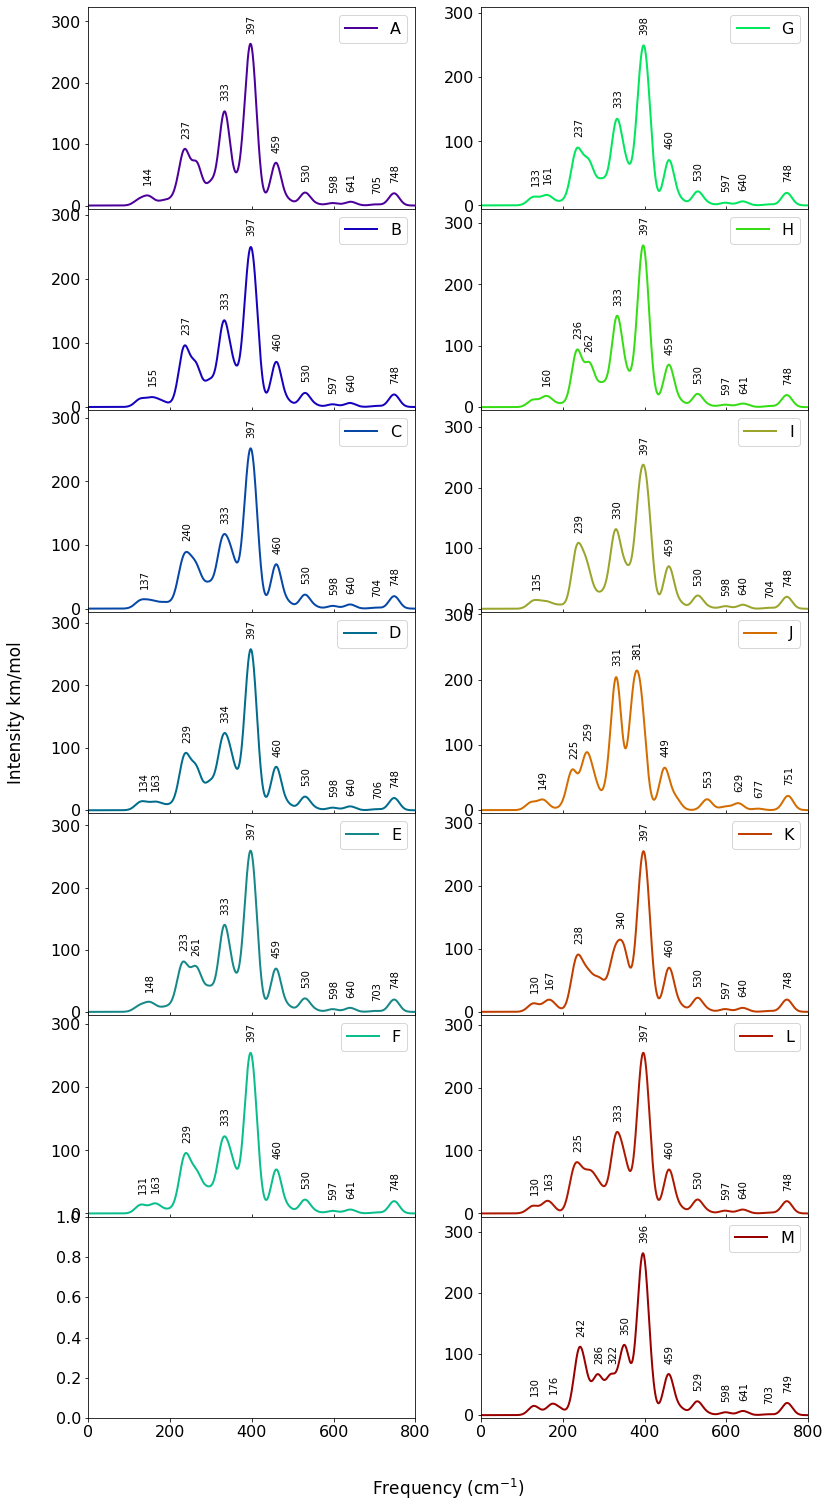

In [105]:
# lists the files to plot
filenames_HZO_211_FIXDEF = glob.glob('HZO_211_FIXDEF_IR/*/*/*.irspec')
print(filenames_HZO_211_FIXDEF)

n = len(filenames_HZO_211_FIXDEF)


fig, ax = plt.subplots(nrows=7, ncols=2, sharex=True)


d_HZO_211_FIXDEF = {}


colors = cm.rainbow(np.linspace(0, 1, n))

#how dark the colors should be
darker = 0.6

for i, j, z in zip(filenames_HZO_211_FIXDEF, colors, range(len(filenames_HZO_211_FIXDEF))):
#     print(z)
#     print(i[-23])
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    
    d_HZO_211_FIXDEF[i[-23]] = config[["Frequency", "Raw_abs"]]
    
    non_norm = ["I", "J", "M"]
           
    if z < 6:
#         print('1er ', z)
        if i[-23] in non_norm:
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800]*2, linewidth=2, 
                   label=i, 
                   color=adjust_lightness(j, darker))
        else:
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                   label=i[-23], 
                   color=adjust_lightness(j, darker))
          
        ax[z,0].tick_params(axis='x', direction='in')
        ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
        ax[z,0].set_xlim(0, 800)
        ax[z,0].legend()  
        
#         print(find_peaks(config.Raw_abs[:])[0])
        for peak in find_peaks(config.Raw_abs[:])[0]:
#             print(peak)
        
            #annotation
            ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+20), 
                             xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        
    if  6 <= z < 12:
        if i[-23] in non_norm:
            normalized = config.Raw_abs[:800]*2
            ax[z-6, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                   label=i[-23], 
                   color=adjust_lightness(j, darker))
            ax[z-6, 1].set_ylim(-5, max(normalized)+90)
            
            for peak in find_peaks(normalized[:])[0]:
                ax[z-6, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+20), 
                             xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
            
        else:    
            ax[z-6, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                   label=i[-23], 
                   color=adjust_lightness(j, darker))
            ax[z-6, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
            for peak in find_peaks(config.Raw_abs[:])[0]:
                ax[z-6, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+20), 
                             xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        
        ax[z-6, 1].legend()  
        ax[z-6, 1].tick_params(axis='x', direction='in')
        
        
        
        
    if z == 12:
        if i[-23] in non_norm: 
            normalized = config.Raw_abs[:800]*2
            ax[6,1].plot(config.Frequency[:800], normalized, linewidth=2, 
                   label=i[-23], 
                   color=adjust_lightness(j, darker))
            ax[6,1].legend()
            ax[6,1].set_ylim(-5, max(normalized)+60)
            for peak in find_peaks(normalized)[0]:
                ax[6,1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+20), 
                             xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)        
        else:
            continue
            
    
    

# ax[0,0].plot(wvn_Average_HZO_211[:800], Int_Average_HZO_211[:800], c='black', 
#          label='average HZO 211\npolar o-phase 29')
# ax[0,0].legend(fontsize=12)
# ax[0,0].set_ylim(-5, max(Int_Average_HZO_211)+60)

# for peak in find_peaks(Int_Average_HZO_211)[0]:
#     ax[0,0].annotate(str(round(wvn_Average_HZO_211[peak])), xytext=(wvn_Average_HZO_211[peak]-10, Int_Average_HZO_211[peak]+20), 
#                      xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)  
    
    
# sub2 = fig.add_subplot(grid[6, :])   
# plt.annotate('sub2', xy = (0.5, 0.5), va = 'center', ha = 'center',  weight='bold', fontsize = 15)

# fig.text(0.45, 0.92, 'HZO 211 FIXDEF', fontsize = 17)
fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 24.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)


# fig.savefig("HZO_211_FIXDEF_DFT_IR_atoms_unit_cell.png", bbox_inches="tight")

### Averaging all the 3 HZO ORTHO29 112 121 211 using Boltzmann distribution
- energies values are taken from results obtained in the notebook http://localhost:8888/notebooks/OneDrive/Python/HZO/Params_extraction/extracting_params_out_DFT_file.ipynb#
- the energies are extracted directly from the .out files of Crystal

In [35]:
# opening populations coming from another notebook 
df_HZO_all_populations_FIXDEF = pd.read_csv("../Params_extraction/population_HZO_FIXDEF_all_corrected.csv")
df_HZO_all_populations_FIXDEF = df_HZO_all_populations_FIXDEF.sort_values('Unnamed: 0')
df_HZO_all_populations_FIXDEF

Unnamed: 0  normalized_population  normalized_population %
27  HZO_112_A_OPTGEOM_FIXDEF                0.01877                  1.87748
28  HZO_112_B_OPTGEOM_FIXDEF                0.03832                  3.83224
29  HZO_112_C_OPTGEOM_FIXDEF                0.03872                  3.87179
30  HZO_112_D_OPTGEOM_FIXDEF                0.03873                  3.87330
31  HZO_112_E_OPTGEOM_FIXDEF                0.03846                  3.84568
32  HZO_112_F_OPTGEOM_FIXDEF                0.03886                  3.88606
33  HZO_112_G_OPTGEOM_FIXDEF                0.03887                  3.88722
34  HZO_112_H_OPTGEOM_FIXDEF                0.00986                  0.98580
35  HZO_112_I_OPTGEOM_FIXDEF                0.03930                  3.92980
36  HZO_112_J_OPTGEOM_FIXDEF                0.00000                  0.00000
37  HZO_112_K_OPTGEOM_FIXDEF                0.00974                  0.97438
38  HZO_112_L_OPTGEOM_FIXDEF                0.00967                  0.96738
13  HZO_121_A_OPTGEOM_FIXDEF                0.00973                  0.97302
14  HZO_121_B_OPTGEOM_FIXDEF                0.03936                  3.93570
15  HZO_121_C_OPTGEOM_FIXDEF                0.03876                  3.87585
16  HZO_121_D_OPTGEOM_FIXDEF                0.03886                  3.88570
17  HZO_121_E_OPTGEOM_FIXDEF                0.03869                  3.86934
18  HZO_121_F_OPTGEOM_FIXDEF                0.00986                  0.98580
19  HZO_121_G_OPTGEOM_FIXDEF                0.03864                  3.86425
20  HZO_121_H_OPTGEOM_FIXDEF                0.03914                  3.91382
21  HZO_121_I_OPTGEOM_FIXDEF                0.00961                  0.96134
22  HZO_121_J_OPTGEOM_FIXDEF                0.00974                  0.97438
23  HZO_121_K_OPTGEOM_FIXDEF                0.03893                  3.89286
24  HZO_121_L_OPTGEOM_FIXDEF                0.00946                  0.94554
25  HZO_121_M_OPTGEOM_FIXDEF                0.00967                  0.96740
26  HZO_121_N_OPTGEOM_FIXDEF                0.00992                  0.99225
0   HZO_211_A_OPTGEOM_FIXDEF                0.02130                  2.12978
1   HZO_211_B_OPTGEOM_FIXDEF                0.03887                  3.88682
2   HZO_211_C_OPTGEOM_FIXDEF                0.03878                  3.87816
3   HZO_211_D_OPTGEOM_FIXDEF                0.03860                  3.86039
4   HZO_211_E_OPTGEOM_FIXDEF                0.02137                  2.13740
5   HZO_211_F_OPTGEOM_FIXDEF                0.03906                  3.90621
6   HZO_211_G_OPTGEOM_FIXDEF                0.03898                  3.89758
7   HZO_211_H_OPTGEOM_FIXDEF                0.02168                  2.16775
8   HZO_211_I_OPTGEOM_FIXDEF                0.01100                  1.10018
9   HZO_211_J_OPTGEOM_FIXDEF                0.00191                  0.19081
10  HZO_211_K_OPTGEOM_FIXDEF                0.03885                  3.88524
11  HZO_211_L_OPTGEOM_FIXDEF                0.01900                  1.90021
12  HZO_211_M_OPTGEOM_FIXDEF                0.01091                  1.09110

HZO_112_A 1.87748


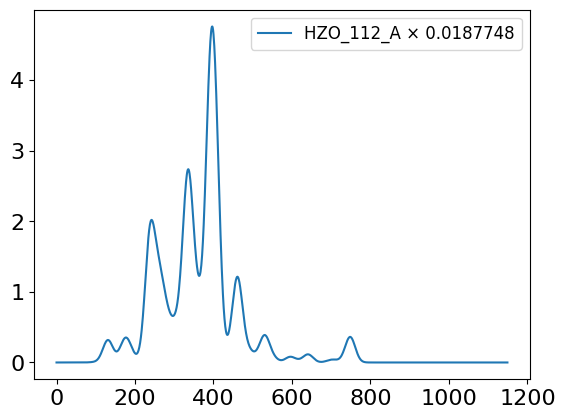

HZO_112_B 3.83224


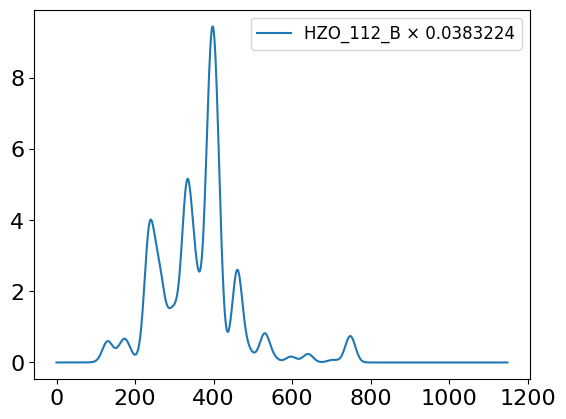

HZO_112_C 3.87179


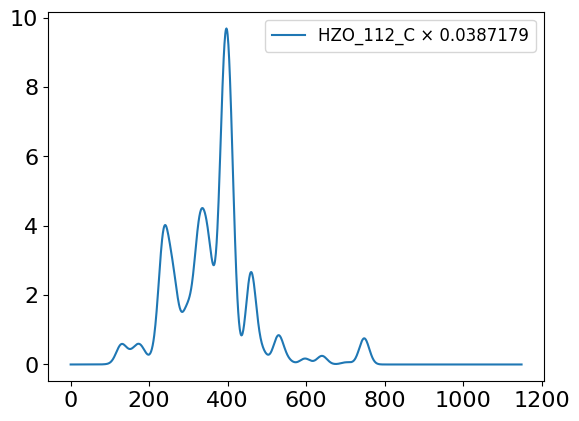

HZO_112_D 3.8733


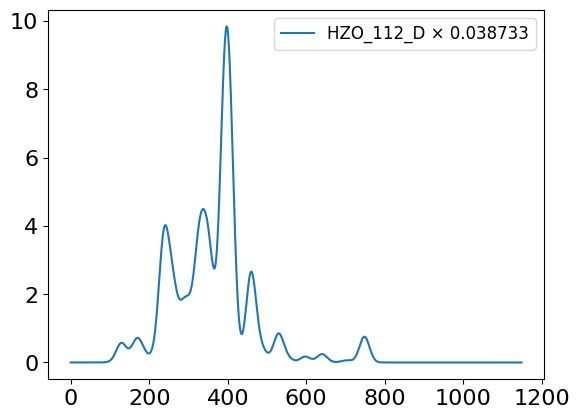

HZO_112_E 3.84568


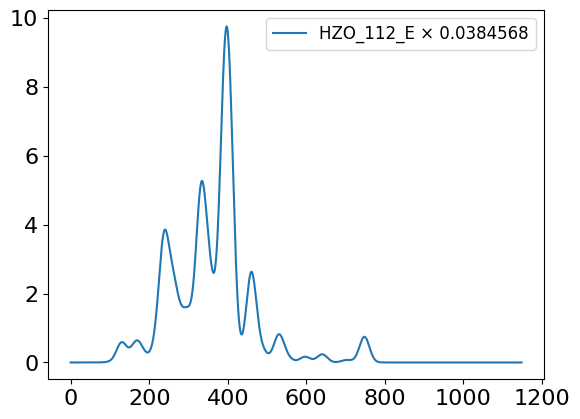

HZO_112_F 3.88606


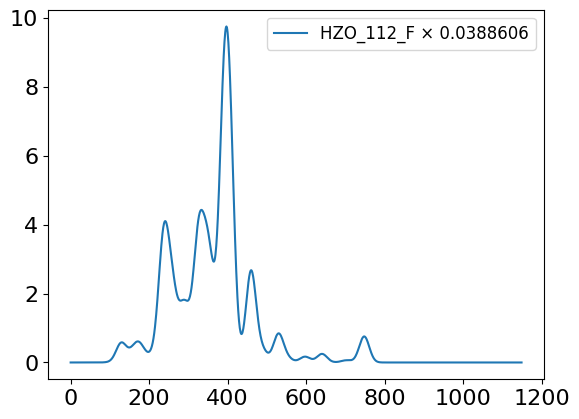

HZO_112_G 3.88722


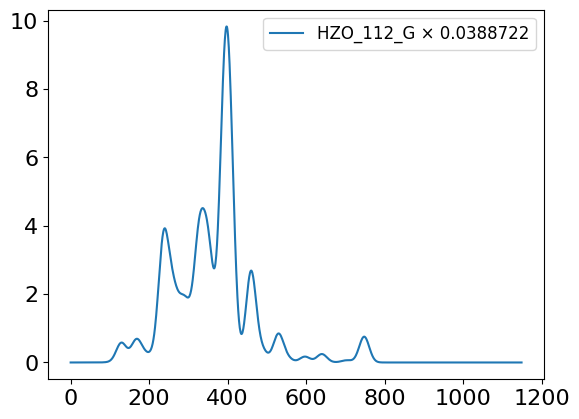

HZO_112_H 0.9858


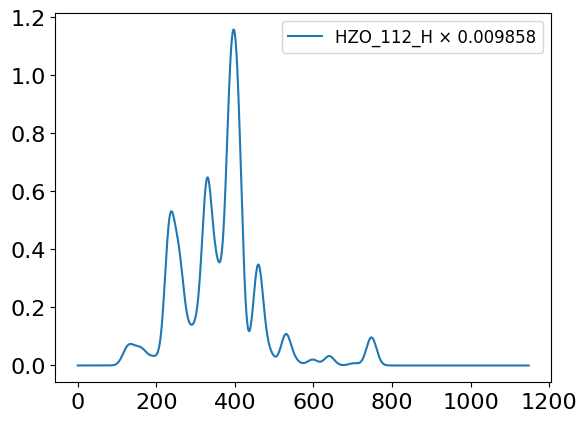

HZO_112_I 3.9298


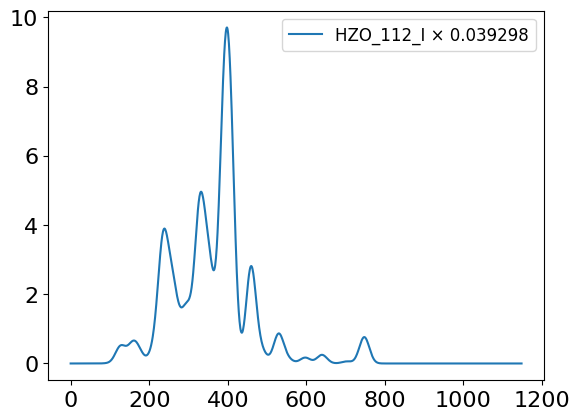

HZO_112_J 0.0


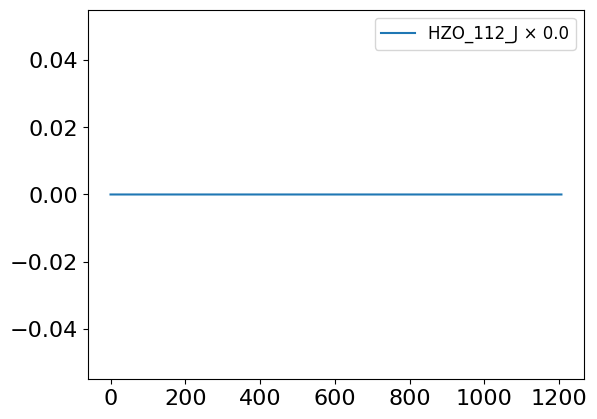

HZO_112_K 0.97438


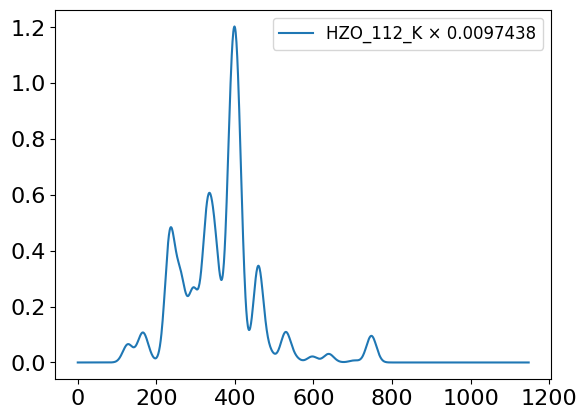

HZO_112_L 0.96738


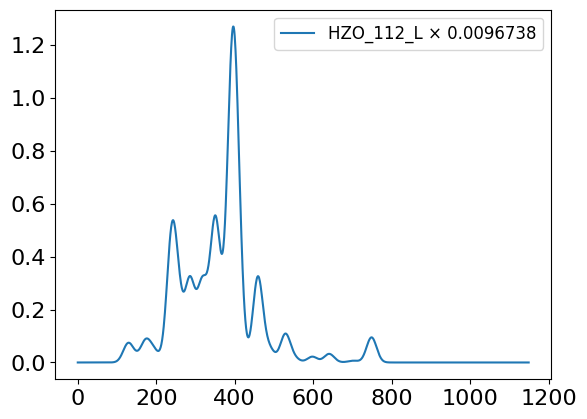

HZO_121_A 0.97302


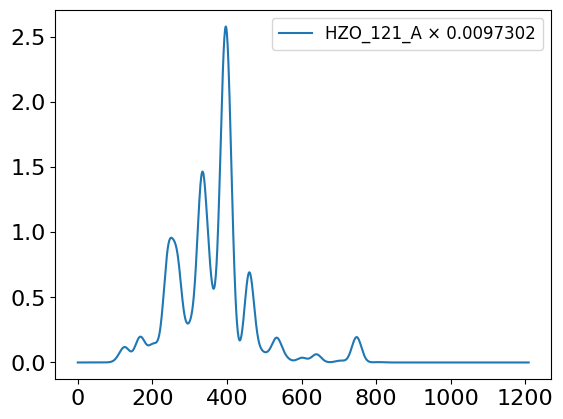

HZO_121_B 3.9357


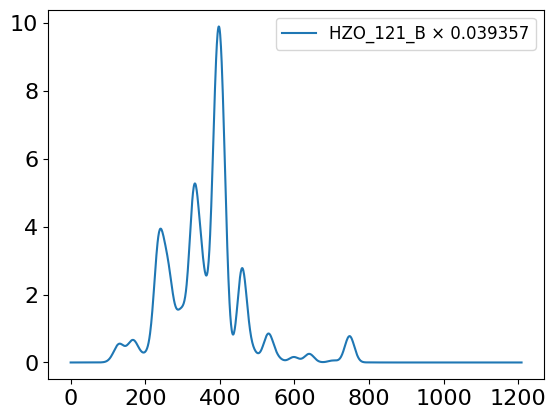

HZO_121_C 3.87585


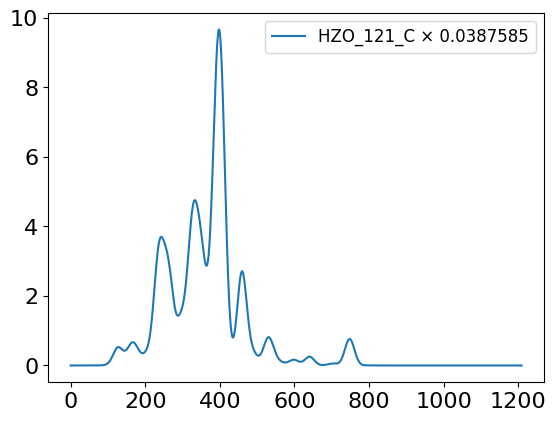

HZO_121_D 3.8857


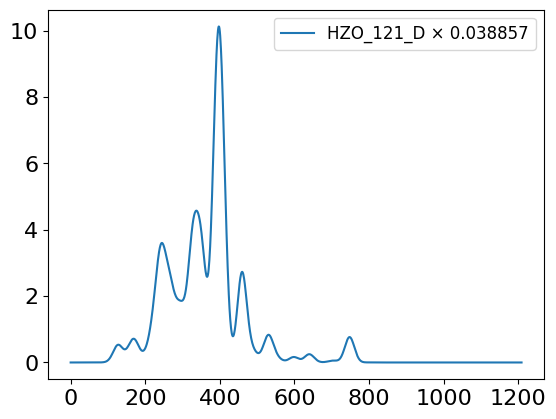

HZO_121_E 3.86934


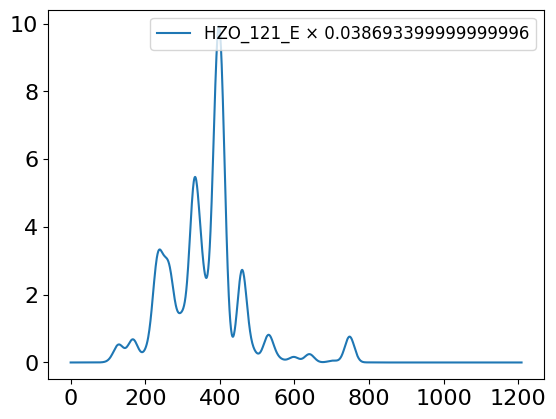

HZO_121_F 0.9858


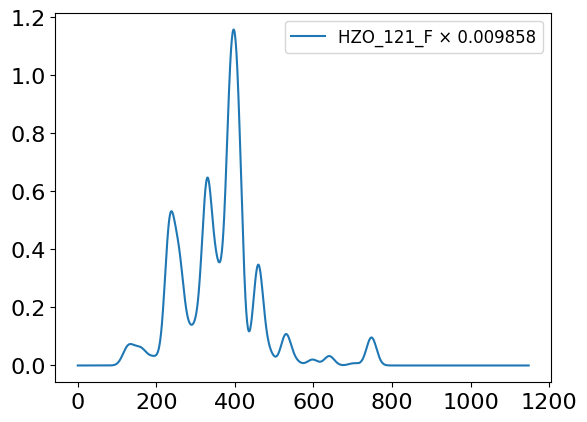

HZO_121_G 3.86425


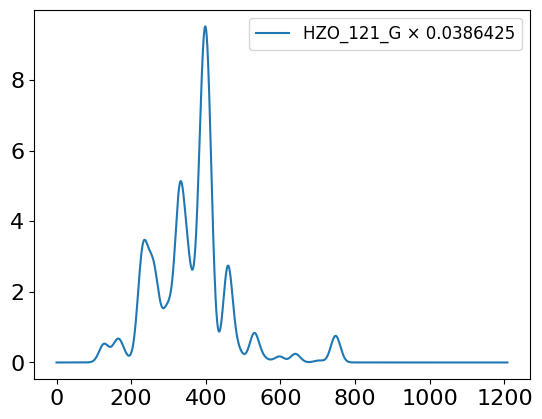

HZO_121_H 3.91382


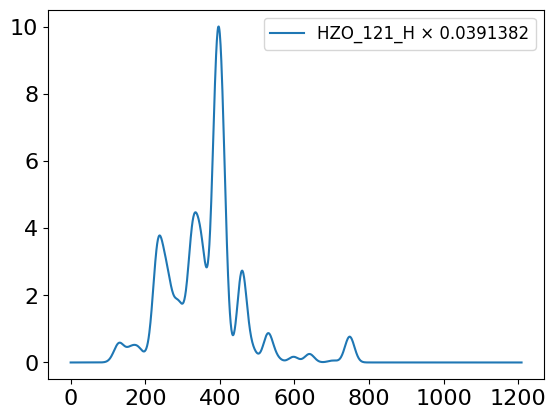

HZO_121_I 0.96134


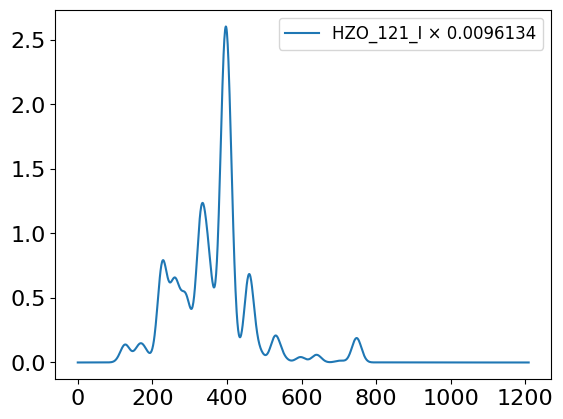

HZO_121_J 0.97438


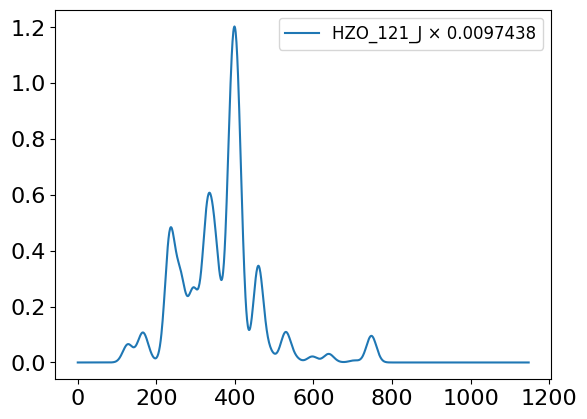

HZO_121_K 3.89286


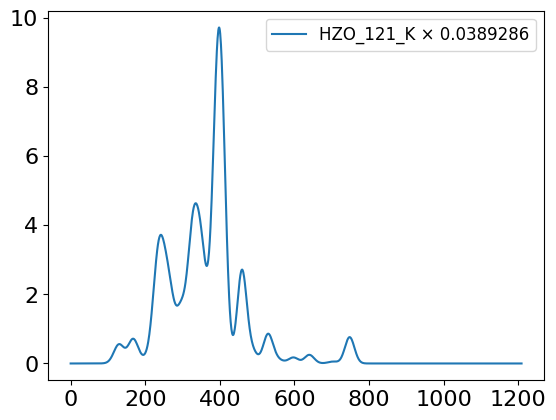

HZO_121_L 0.94554


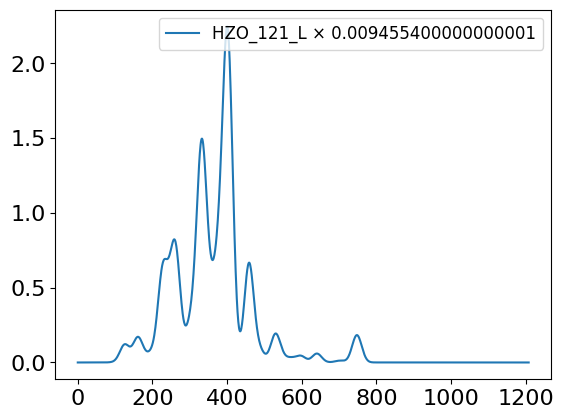

HZO_121_M 0.9674


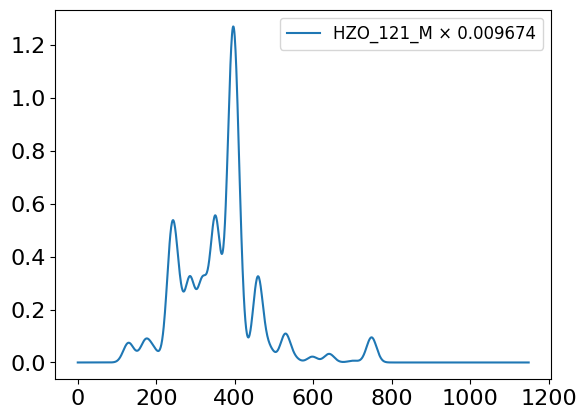

HZO_121_N 0.99225


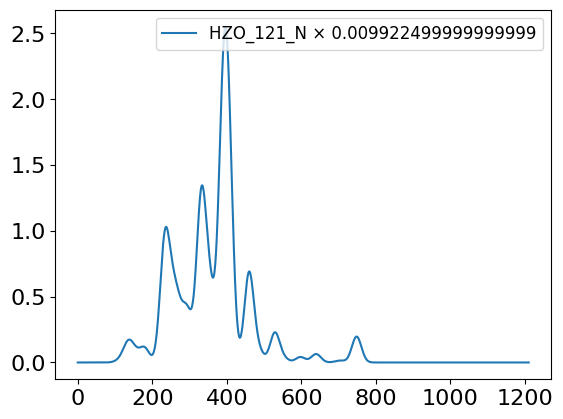

HZO_211_A 2.12978


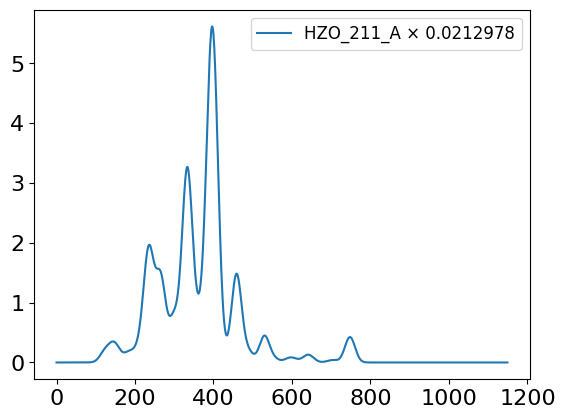

HZO_211_B 3.88682


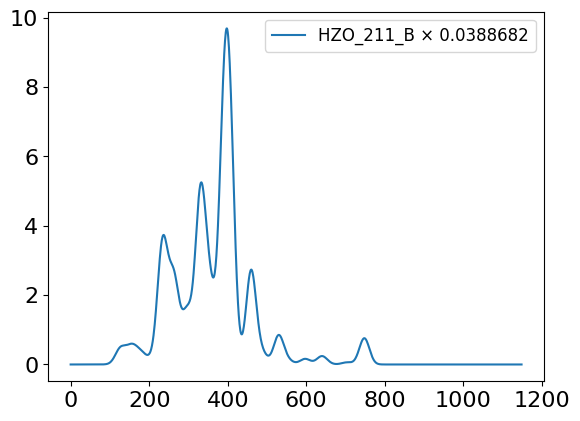

HZO_211_C 3.87816


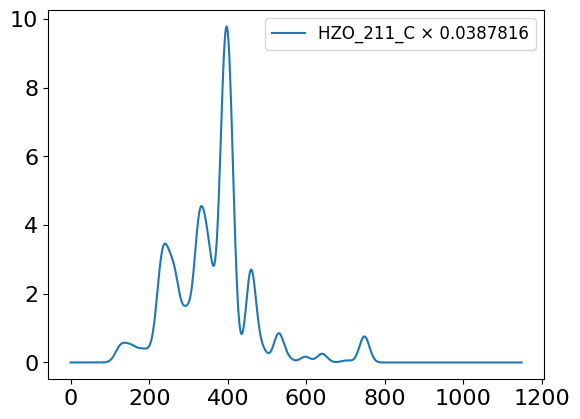

HZO_211_D 3.86039


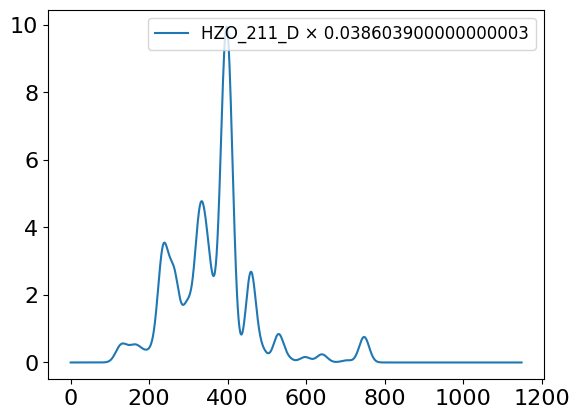

HZO_211_E 2.1374


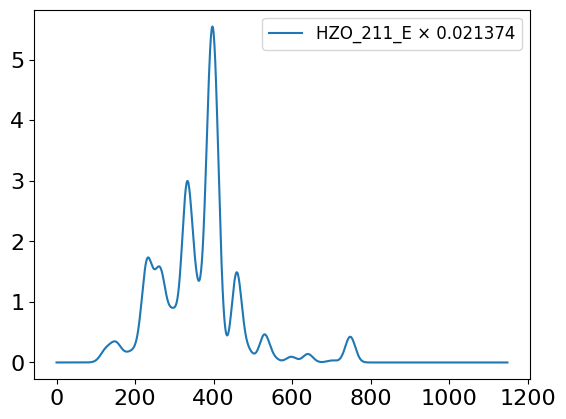

HZO_211_F 3.90621


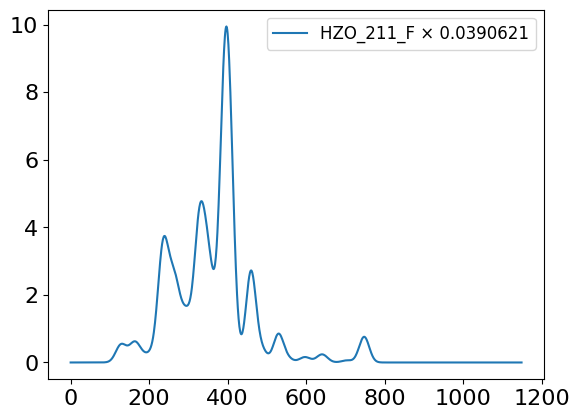

HZO_211_G 3.89758


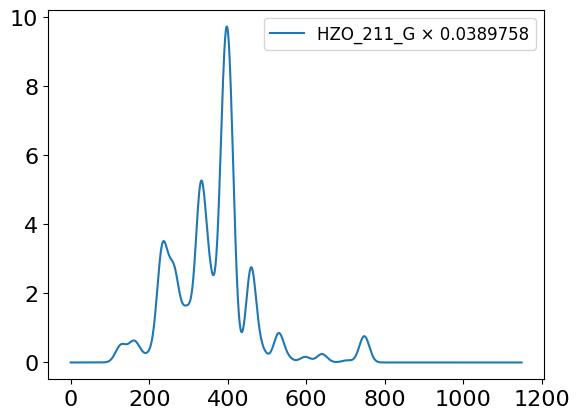

HZO_211_H 2.16775


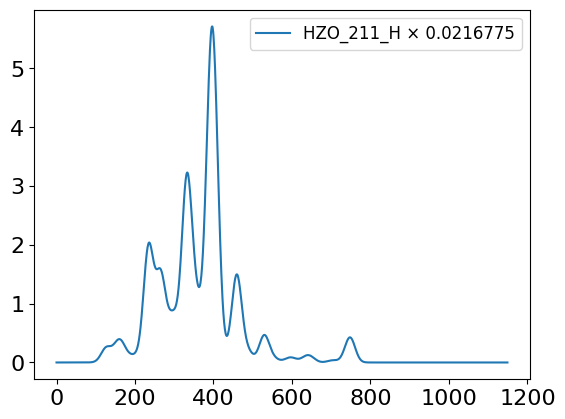

HZO_211_I 1.10018


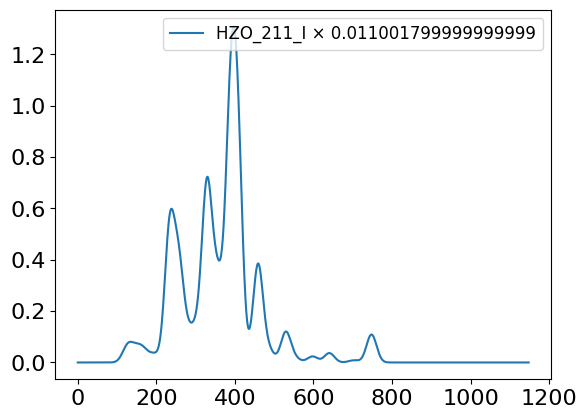

HZO_211_J 0.19081


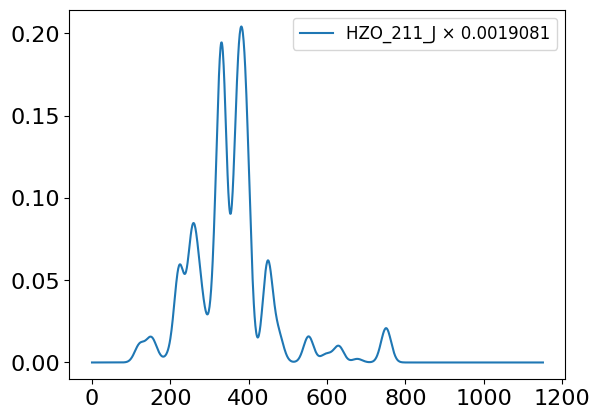

HZO_211_K 3.88524


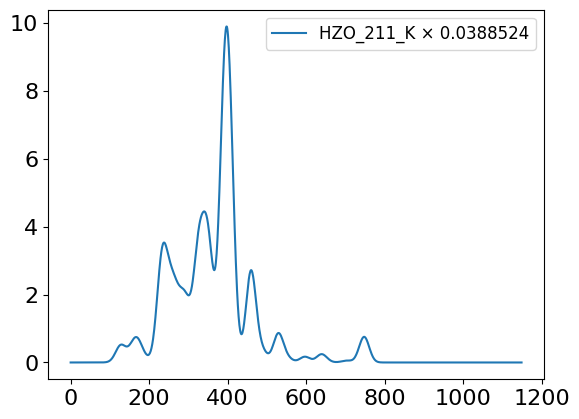

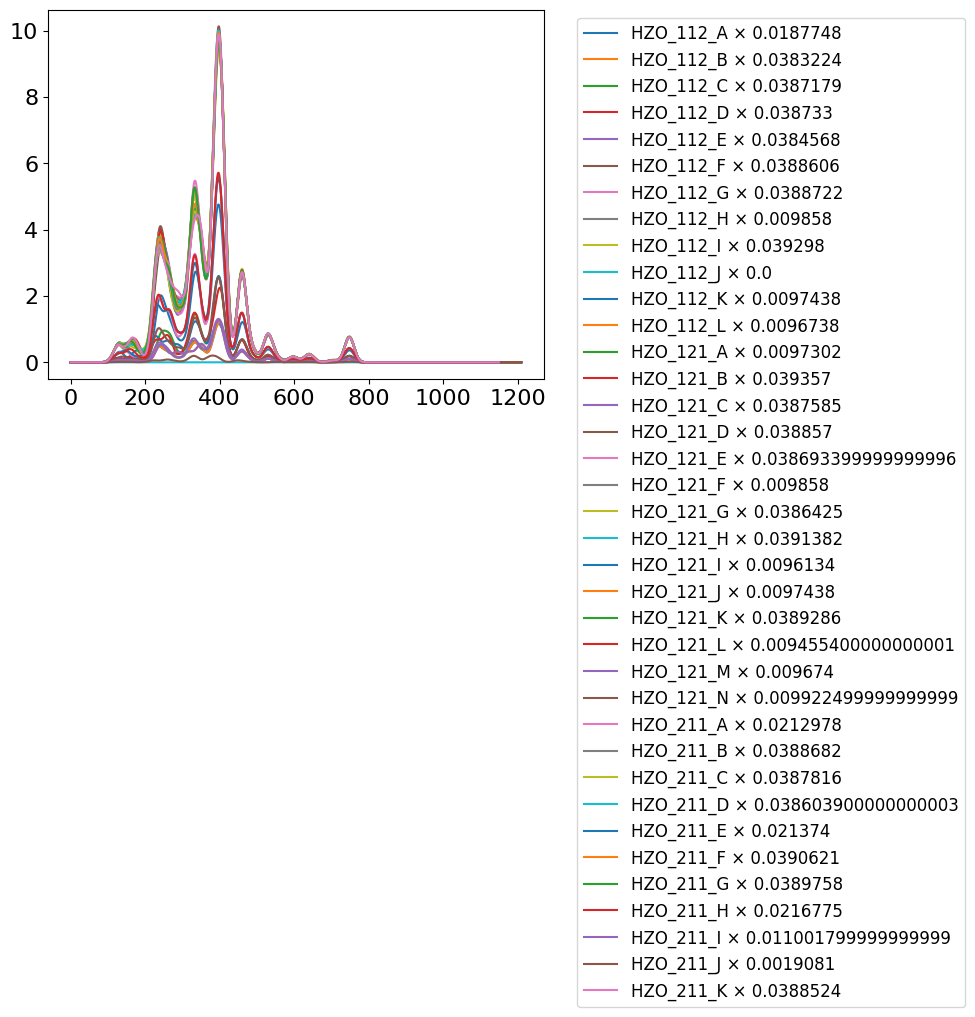

In [50]:
# listing all files to plot
filenames_HZO_all_FIXDEF = glob.glob('HZO_all_FIXDEF/*')
# sort them by alphabetical order
filenames_HZO_all_FIXDEF.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# # white background to appears in dark jupyter theme
# fig, ax = plt.subplots(nrows=len(filenames_HZO_all), ncols=1, figsize=(6,35))
# rect = fig.patch
# rect.set_facecolor('white')

# empty dictionary to add the normalized data
d_HZO_all_pop_FIXDEF = {}

# iterate over the list of files to plot and the population of each config to be multiplied
for i, population in zip(filenames_HZO_all_FIXDEF, df_HZO_all_populations_FIXDEF["normalized_population %"]):
    print(i[15:-22], population)
    # opens the spectrm file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    # calculates the weight of this config
    config["Raw_abs"] = (config.Raw_abs*population)/100
    plt.plot(config["Frequency"], config["Raw_abs"], label=(f"{i[15:-22]} × {population/100}"))
    plt.legend(fontsize=12)
    plt.show()
    # saves this config inside the dict
    d_HZO_all_pop_FIXDEF[i[-23]] = config[["Frequency", "Raw_abs"]]
    
# d_HZO_all_pop_FIXDEF



# Plots all configs multiplied by their populations together
# iterate over the list of files to plot and the population of each config to be multiplied
for i, population in zip(filenames_HZO_all_FIXDEF, df_HZO_all_populations_FIXDEF["normalized_population %"]):
#     print(i[15:-22], population)

    # opens the spectrm file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    
    # calculates the weight of this config
    config["Raw_abs"] = (config.Raw_abs*population)/100
    
    # Plots all configs multiplied by their populations together
    plt.plot(config["Frequency"], config["Raw_abs"], label=(f"{i[15:-22]} × {population/100}"))
    plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1))

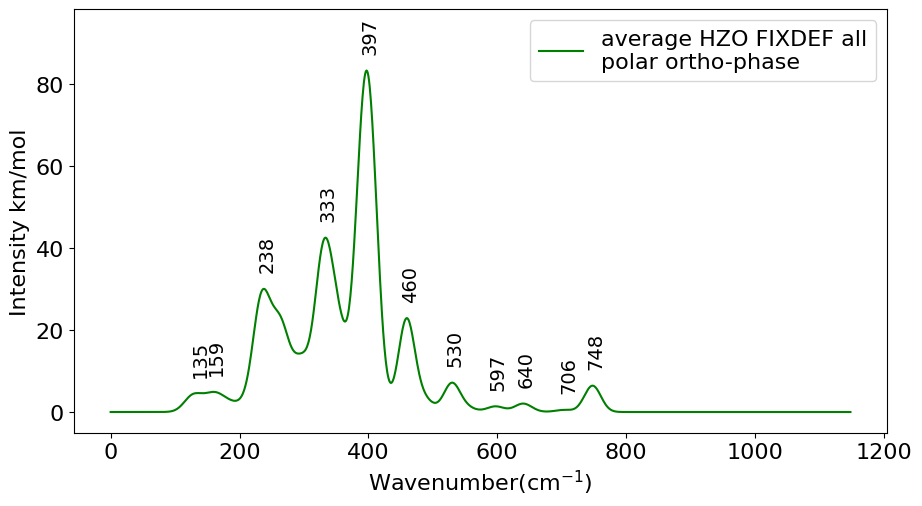

In [37]:
# Calculating the average of all configs
# empty lists to add intensity and frequency values to sum
Int_all = []
wvn_all = []

# iterate over the configs
for k in d_HZO_all_pop_FIXDEF.keys():
    # adds the frequencies to an empty list
    wvn_all.append(d_HZO_all_pop_FIXDEF[k]['Frequency'])
    # adds the intensities to an empty list
    Int_all.append(d_HZO_all_pop_FIXDEF[k]['Raw_abs'])

# total weight of all configurations is 210        
Int_Average_HZO_all_FIXDEF = sum(Int_all) #/210
wvn_Average_HZO_all_FIXDEF = sum(wvn_all)/len(wvn_all)

# create figure and axes
fig, ax = plt.subplots()

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# matplotlib.rcParams.update({'font.size': 18})
# plotting
ax.plot(wvn_Average_HZO_all_FIXDEF, Int_Average_HZO_all_FIXDEF, c='green', 
         label='average HZO FIXDEF all\npolar ortho-phase')
ax.legend(fontsize=16)
ax.set_xlabel('Wavenumber(cm$^{-1}$)', fontsize=16)
ax.set_ylabel('Intensity km/mol', fontsize=16)
ax.set_ylim(-5, max(Int_Average_HZO_all_FIXDEF)+15)

# adding frequency values to peaks iteratively
for peak in find_peaks(Int_Average_HZO_all_FIXDEF)[0]:
    ax.annotate(str(round(wvn_Average_HZO_all_FIXDEF[peak])), 
                xytext=(wvn_Average_HZO_all_FIXDEF[peak]-10, Int_Average_HZO_all_FIXDEF[peak]+5), 
                xy=(wvn_Average_HZO_all_FIXDEF[peak], Int_Average_HZO_all_FIXDEF[peak]), 
                fontsize=14, rotation=90) 

fig.set_size_inches(10.5, 5.5)
# fig.savefig("Average_HZOall_sp29.png", bbox_inches="tight")



In [21]:
np.save('Int_Average_HZO_all_FIXDEF_corrected.npy', Int_Average_HZO_all_FIXDEF)
np.save('wvn_Average_HZO_all_FIXDEF_corrected.npy', wvn_Average_HZO_all_FIXDEF)

### Comparing with the wrong calculation of populations (the one that makes all populations around 3%)

#### Opening the not_good population files

In [26]:
# opening populations coming from another notebook 
df_HZO_all_populations_FIXDEF_not_good = pd.read_csv("../Params_extraction/population_HZO_FIXDEF_all.csv")
df_HZO_all_populations_FIXDEF_not_good = df_HZO_all_populations_FIXDEF_not_good.sort_values('Unnamed: 0')
df_HZO_all_populations_FIXDEF_not_good

Unnamed: 0  normalized_population  normalized_population %
27  HZO_112_A_OPTGEOM_FIXDEF                0.02562                  2.56240
28  HZO_112_B_OPTGEOM_FIXDEF                0.02615                  2.61514
29  HZO_112_C_OPTGEOM_FIXDEF                0.02642                  2.64212
30  HZO_112_D_OPTGEOM_FIXDEF                0.02643                  2.64316
31  HZO_112_E_OPTGEOM_FIXDEF                0.02624                  2.62430
32  HZO_112_F_OPTGEOM_FIXDEF                0.02652                  2.65186
33  HZO_112_G_OPTGEOM_FIXDEF                0.02653                  2.65265
34  HZO_112_H_OPTGEOM_FIXDEF                0.02691                  2.69086
35  HZO_112_I_OPTGEOM_FIXDEF                0.02682                  2.68171
36  HZO_112_J_OPTGEOM_FIXDEF                0.00000                  0.00001
37  HZO_112_K_OPTGEOM_FIXDEF                0.02660                  2.65969
38  HZO_112_L_OPTGEOM_FIXDEF                0.02641                  2.64057
13  HZO_121_A_OPTGEOM_FIXDEF                0.02656                  2.65596
14  HZO_121_B_OPTGEOM_FIXDEF                0.02686                  2.68574
15  HZO_121_C_OPTGEOM_FIXDEF                0.02645                  2.64490
16  HZO_121_D_OPTGEOM_FIXDEF                0.02652                  2.65162
17  HZO_121_E_OPTGEOM_FIXDEF                0.02640                  2.64046
18  HZO_121_F_OPTGEOM_FIXDEF                0.02691                  2.69086
19  HZO_121_G_OPTGEOM_FIXDEF                0.02637                  2.63698
20  HZO_121_H_OPTGEOM_FIXDEF                0.02671                  2.67081
21  HZO_121_I_OPTGEOM_FIXDEF                0.02624                  2.62408
22  HZO_121_J_OPTGEOM_FIXDEF                0.02660                  2.65969
23  HZO_121_K_OPTGEOM_FIXDEF                0.02657                  2.65650
24  HZO_121_L_OPTGEOM_FIXDEF                0.02581                  2.58095
25  HZO_121_M_OPTGEOM_FIXDEF                0.02641                  2.64064
26  HZO_121_N_OPTGEOM_FIXDEF                0.02708                  2.70845
0   HZO_211_A_OPTGEOM_FIXDEF                0.02907                  2.90674
1   HZO_211_B_OPTGEOM_FIXDEF                0.02652                  2.65238
2   HZO_211_C_OPTGEOM_FIXDEF                0.02646                  2.64647
3   HZO_211_D_OPTGEOM_FIXDEF                0.02634                  2.63435
4   HZO_211_E_OPTGEOM_FIXDEF                0.02917                  2.91714
5   HZO_211_F_OPTGEOM_FIXDEF                0.02666                  2.66561
6   HZO_211_G_OPTGEOM_FIXDEF                0.02660                  2.65973
7   HZO_211_H_OPTGEOM_FIXDEF                0.02959                  2.95856
8   HZO_211_I_OPTGEOM_FIXDEF                0.03003                  3.00308
9   HZO_211_J_OPTGEOM_FIXDEF                0.00521                  0.52085
10  HZO_211_K_OPTGEOM_FIXDEF                0.02651                  2.65130
11  HZO_211_L_OPTGEOM_FIXDEF                0.02593                  2.59341
12  HZO_211_M_OPTGEOM_FIXDEF                0.02978                  2.97828

HZO_112_A 2.5624


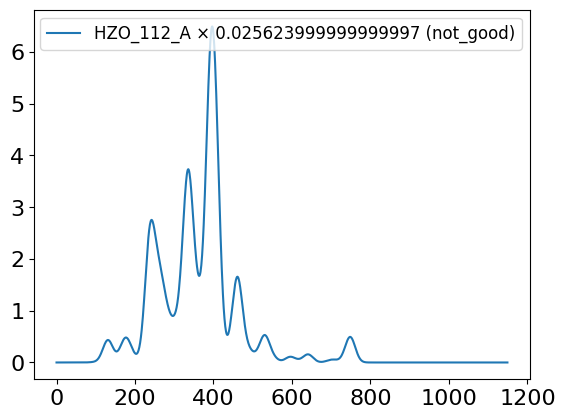

HZO_112_B 2.61514


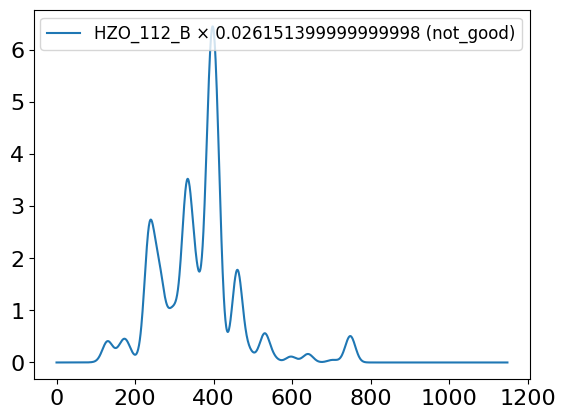

HZO_112_C 2.64212


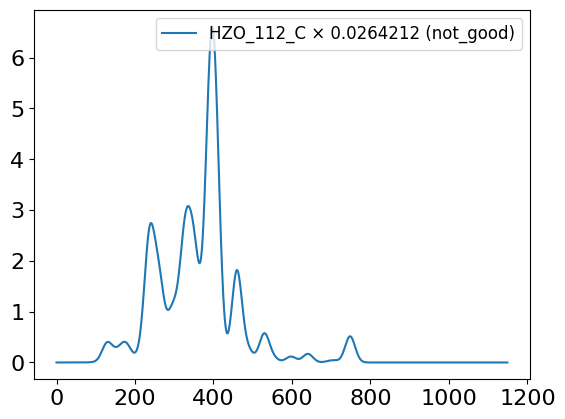

HZO_112_D 2.64316


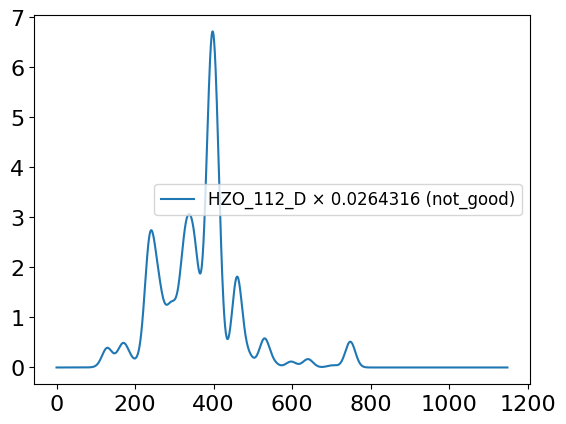

HZO_112_E 2.6243


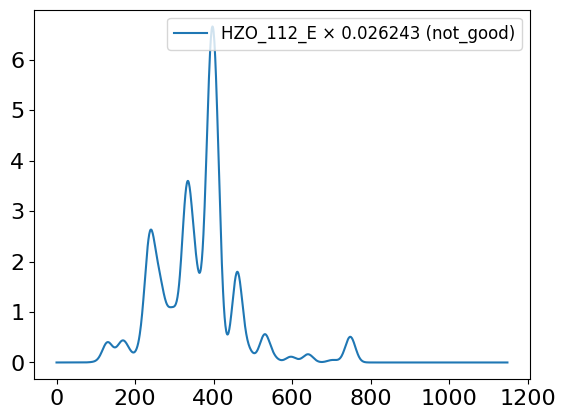

HZO_112_F 2.65186


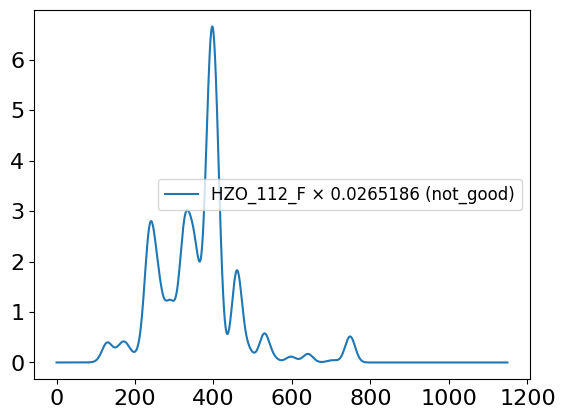

HZO_112_G 2.65265


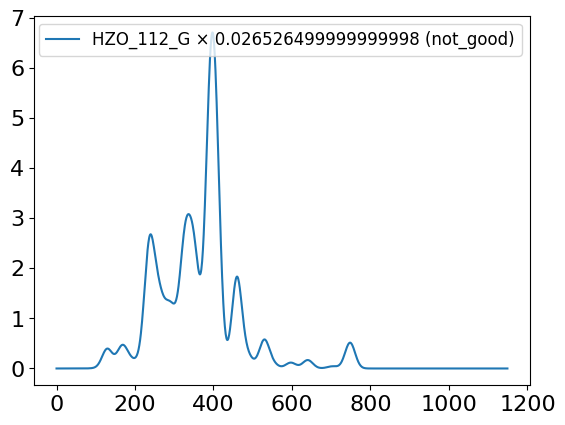

HZO_112_H 2.69086


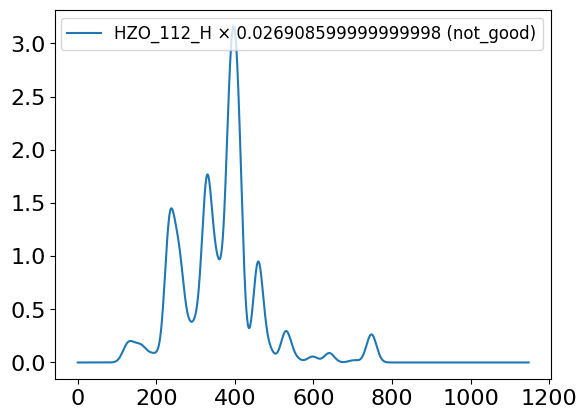

HZO_112_I 2.68171


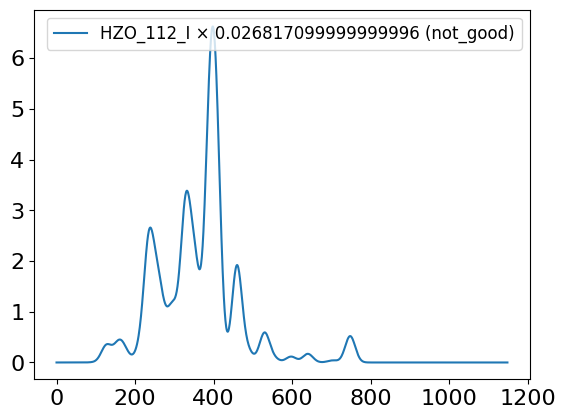

HZO_112_J 1e-05


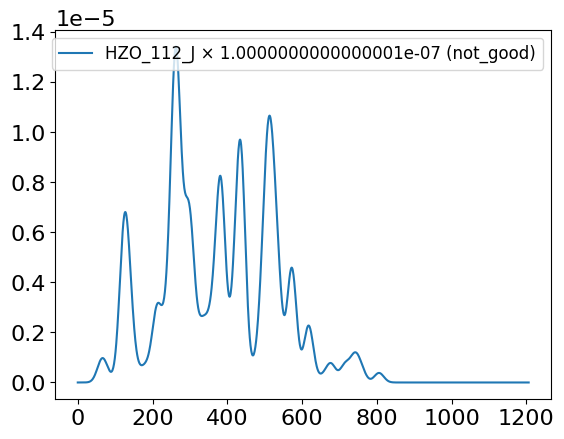

HZO_112_K 2.65969


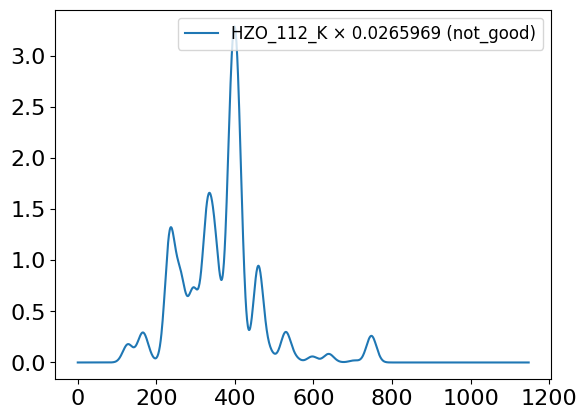

HZO_112_L 2.64057


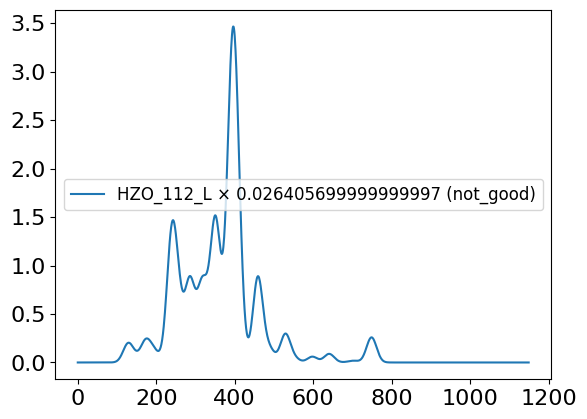

HZO_121_A 2.65596


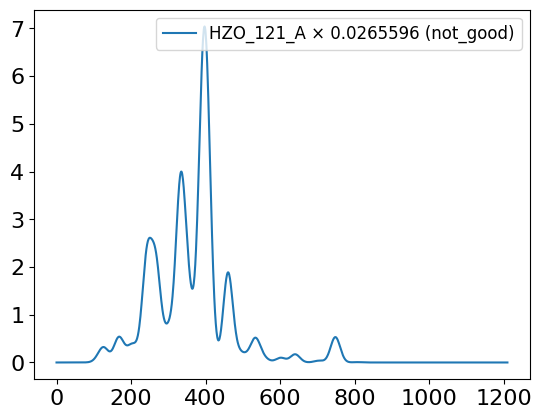

HZO_121_B 2.68574


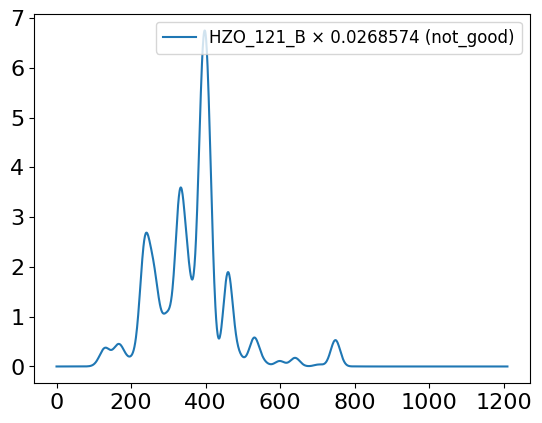

HZO_121_C 2.6449


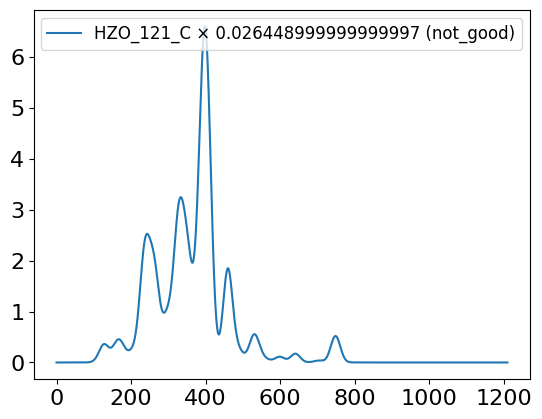

HZO_121_D 2.65162


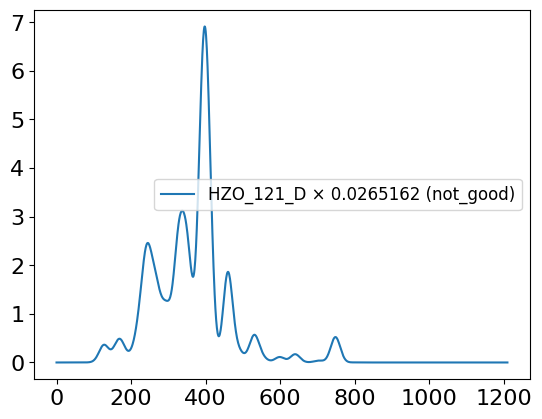

HZO_121_E 2.64046


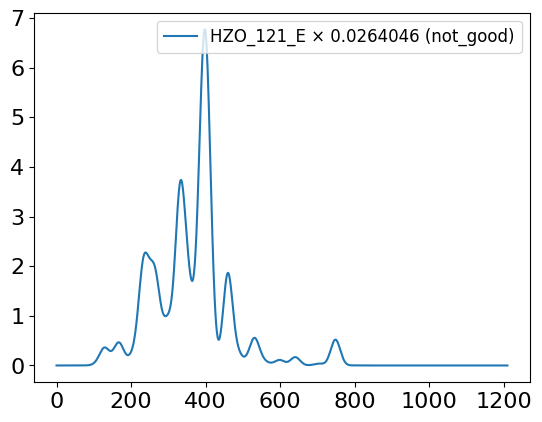

HZO_121_F 2.69086


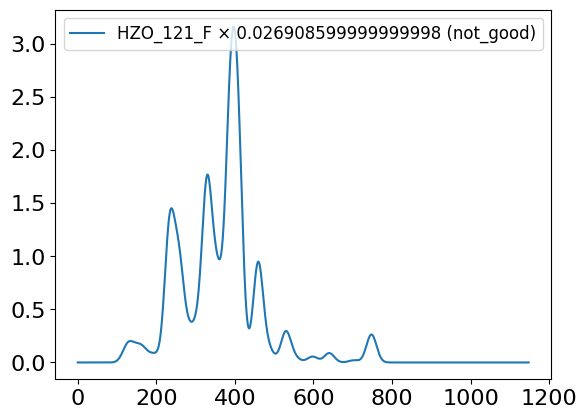

HZO_121_G 2.63698


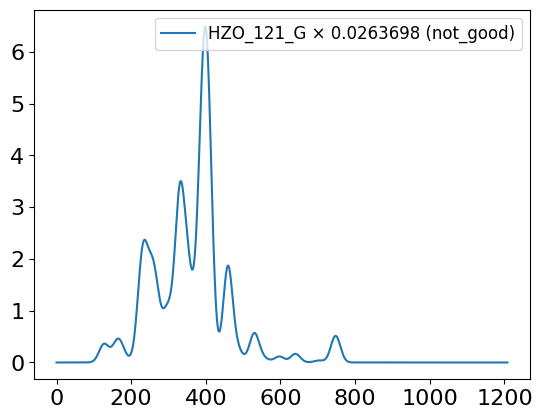

HZO_121_H 2.67081


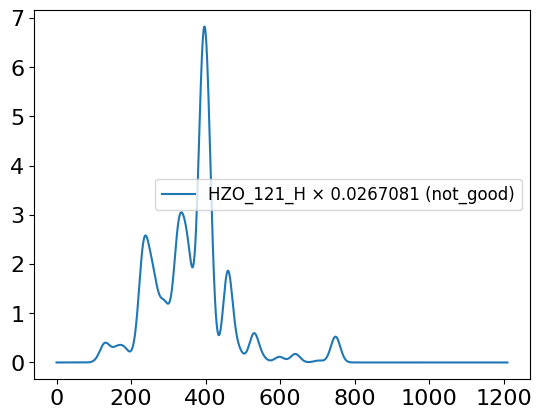

HZO_121_I 2.62408


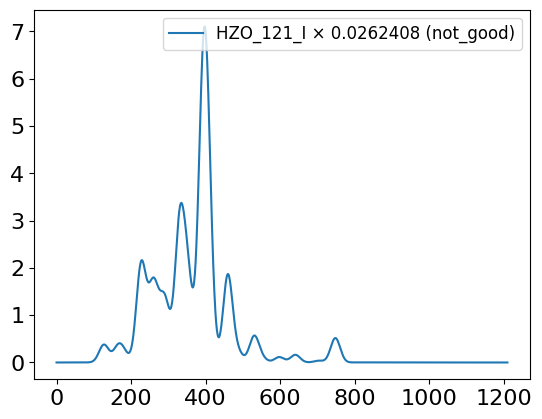

HZO_121_J 2.65969


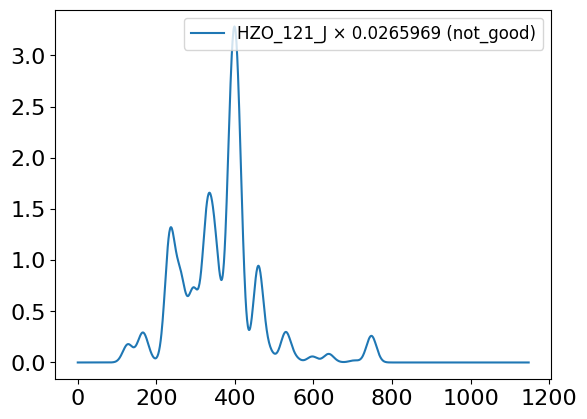

HZO_121_K 2.6565


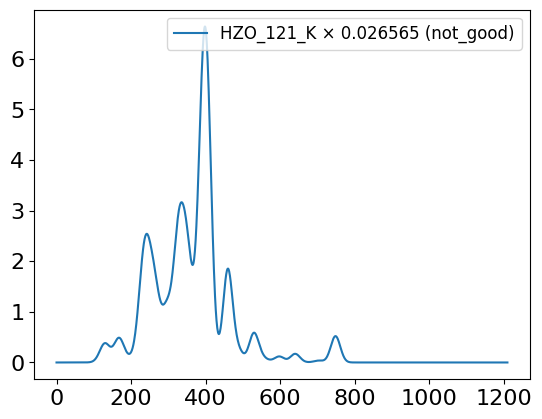

HZO_121_L 2.58095


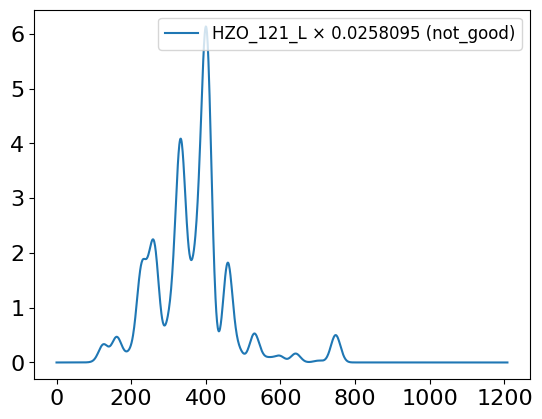

HZO_121_M 2.64064


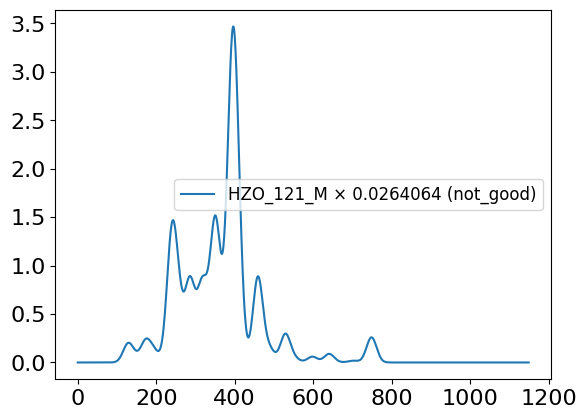

HZO_121_N 2.70845


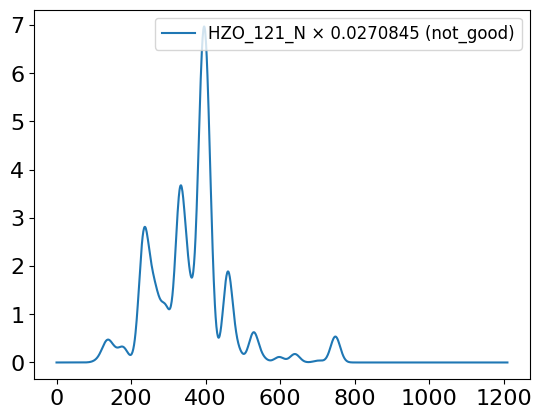

HZO_211_A 2.90674


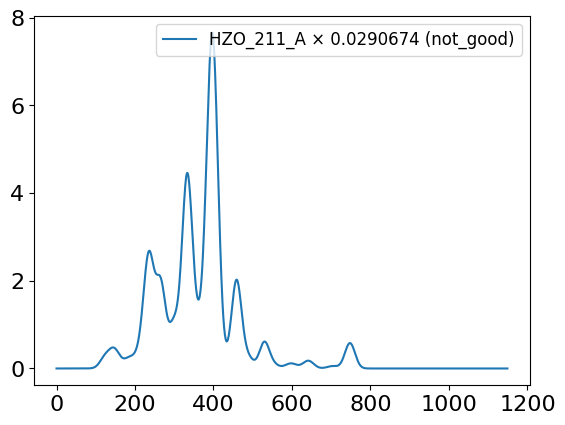

HZO_211_B 2.65238


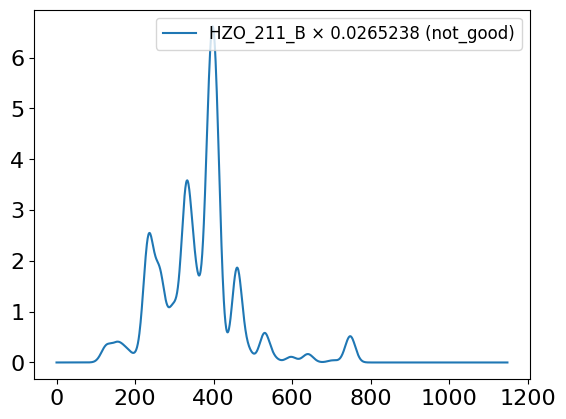

HZO_211_C 2.64647


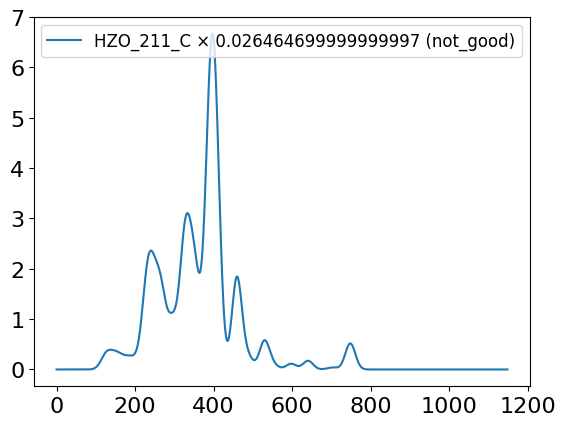

HZO_211_D 2.63435


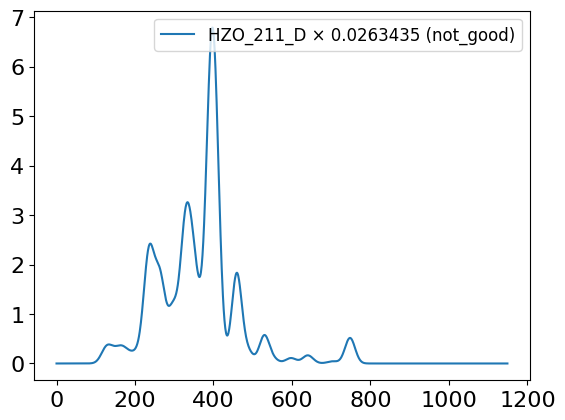

HZO_211_E 2.91714


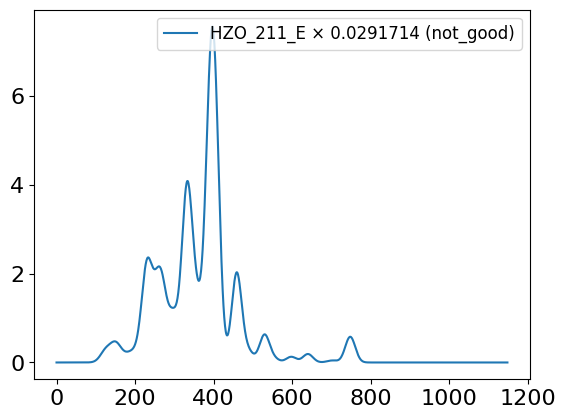

HZO_211_F 2.66561


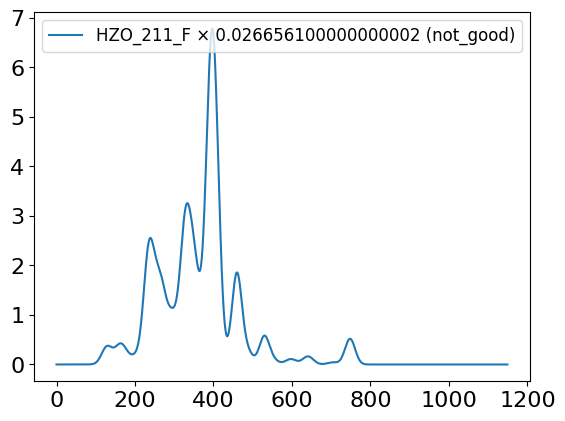

HZO_211_G 2.65973


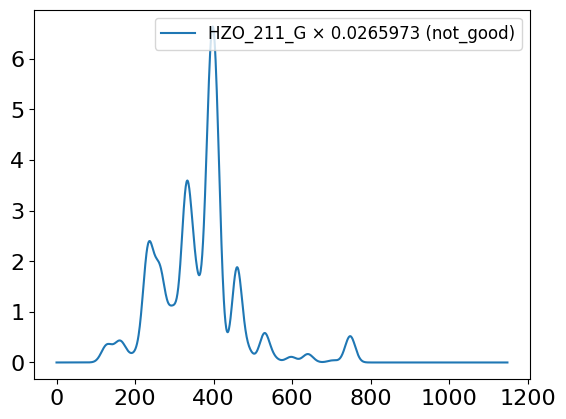

HZO_211_H 2.95856


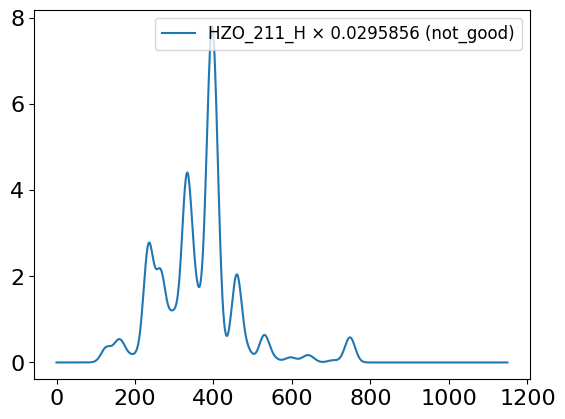

HZO_211_I 3.00308


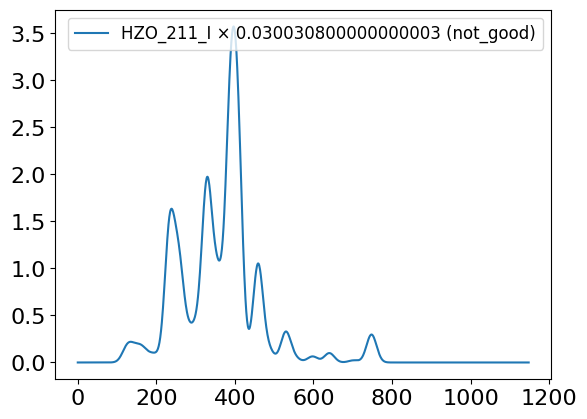

HZO_211_J 0.52085


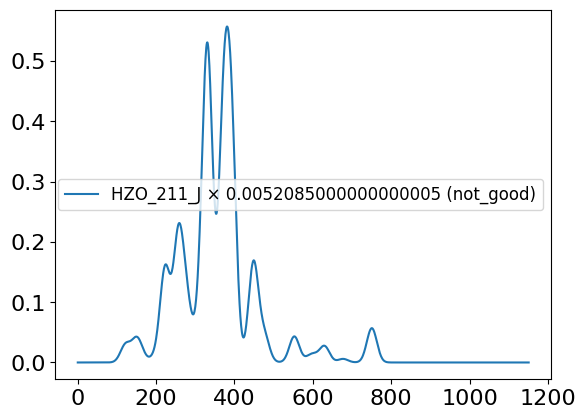

HZO_211_K 2.6513


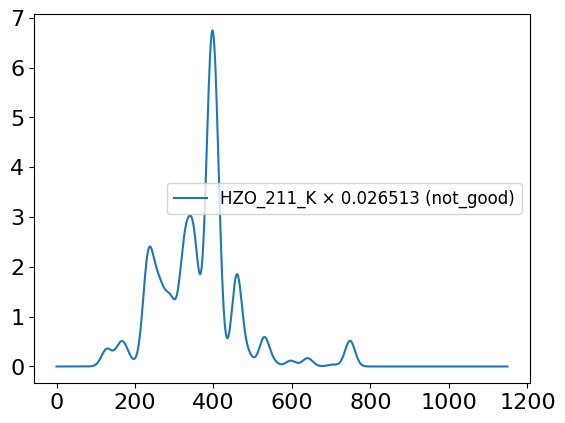

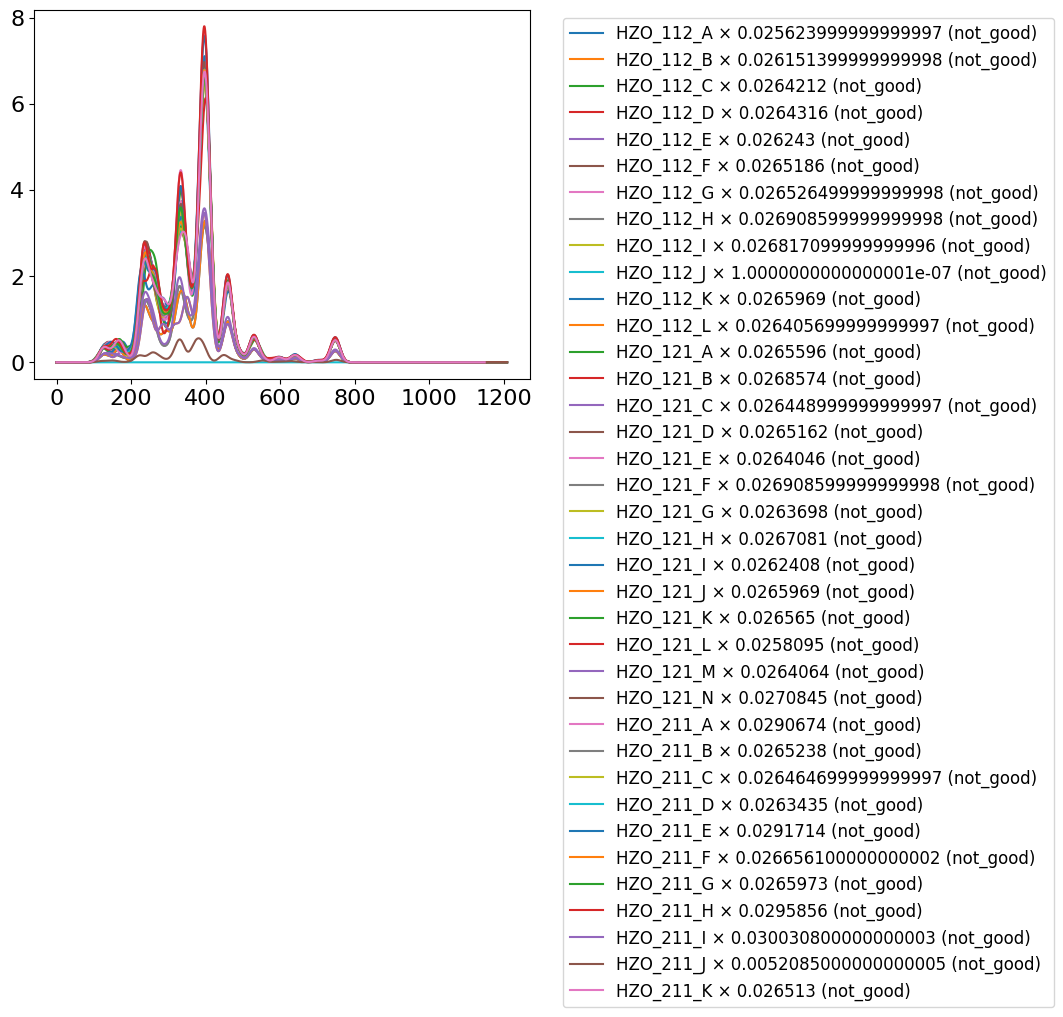

In [45]:
# listing all files to plot
filenames_HZO_all_FIXDEF_not_good = glob.glob('HZO_all_FIXDEF/*')
# sort them by alphabetical order
filenames_HZO_all_FIXDEF_not_good.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# # white background to appears in dark jupyter theme
# fig, ax = plt.subplots(nrows=len(filenames_HZO_all), ncols=1, figsize=(6,35))
# rect = fig.patch
# rect.set_facecolor('white')

# empty dictionary to add the normalized data
d_HZO_all_pop_FIXDEF_not_good = {}

# Plots each config multiplied by its population in a different plot
# iterate over the list of files to plot and the population of each config to be multiplied
for i, population in zip(filenames_HZO_all_FIXDEF_not_good, df_HZO_all_populations_FIXDEF_not_good["normalized_population %"]):
    print(i[15:-22], population)
    
    # opens the spectrum file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    
    # calculates the weight of this config
    config["Raw_abs"] = (config.Raw_abs*population)/100
    plt.plot(config["Frequency"], config["Raw_abs"], label=(f"{i[15:-22]} × {population/100} (not_good)"))
    plt.legend(fontsize=12)
    plt.show()
    
    # saves this config inside the dict
    d_HZO_all_pop_FIXDEF_not_good[i[-23]] = config[["Frequency", "Raw_abs"]]
    
# d_HZO_all_pop_FIXDEF_not_good



# Plots all configs multiplied by their populations together
# iterate over the list of files to plot and the population of each config to be multiplied
for i, population in zip(filenames_HZO_all_FIXDEF_not_good, df_HZO_all_populations_FIXDEF_not_good["normalized_population %"]):
#     print(i[15:-22], population)

    # opens the spectrm file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    
    # calculates the weight of this config
    config["Raw_abs"] = (config.Raw_abs*population)/100
    
    # Plots all configs multiplied by their populations together
    plt.plot(config["Frequency"], config["Raw_abs"], label=(f"{i[15:-22]} × {population/100} (not_good)"))
    plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1))

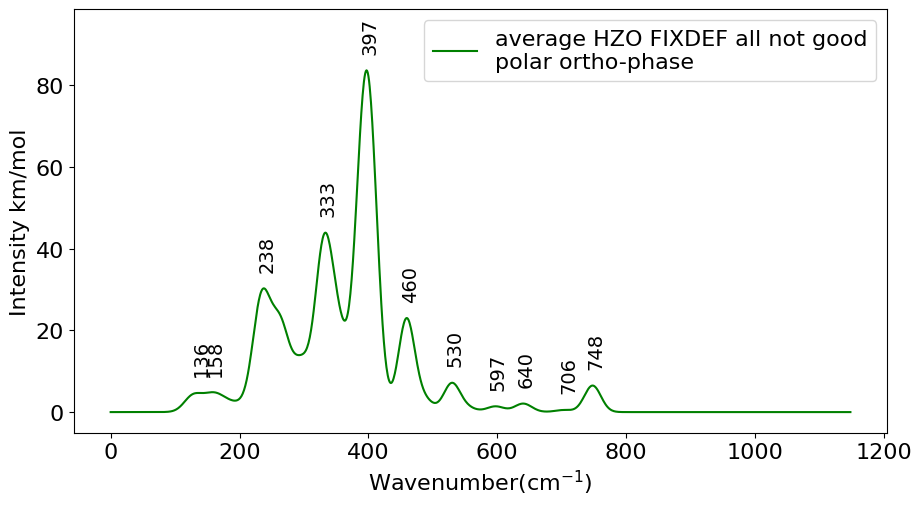

In [33]:
# Calculating the average of all configs
# empty lists to add intensity and frequency values to sum
Int_all_not_good = []
wvn_all_not_good = []

# iterate over the configs
for k in d_HZO_all_pop_FIXDEF_not_good.keys():
    # adds the frequencies to an empty list
    wvn_all_not_good.append(d_HZO_all_pop_FIXDEF_not_good[k]['Frequency'])
    # adds the intensities to an empty list
    Int_all_not_good.append(d_HZO_all_pop_FIXDEF_not_good[k]['Raw_abs'])

# total weight of all configurations is 210        
Int_Average_HZO_all_FIXDEF_not_good = sum(Int_all_not_good) #/210
wvn_Average_HZO_all_FIXDEF_not_good = sum(wvn_all_not_good)/len(wvn_all_not_good)

# create figure and axes
fig, ax = plt.subplots()

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# matplotlib.rcParams.update({'font.size': 18})
# plotting
ax.plot(wvn_Average_HZO_all_FIXDEF_not_good, Int_Average_HZO_all_FIXDEF_not_good, c='green', 
         label='average HZO FIXDEF all not good\npolar ortho-phase')
ax.legend(fontsize=16)
ax.set_xlabel('Wavenumber(cm$^{-1}$)', fontsize=16)
ax.set_ylabel('Intensity km/mol', fontsize=16)
ax.set_ylim(-5, max(Int_Average_HZO_all_FIXDEF_not_good)+15)

# adding frequency values to peaks iteratively
for peak in find_peaks(Int_Average_HZO_all_FIXDEF_not_good)[0]:
    ax.annotate(str(round(wvn_Average_HZO_all_FIXDEF_not_good[peak])), 
                xytext=(wvn_Average_HZO_all_FIXDEF_not_good[peak]-10, Int_Average_HZO_all_FIXDEF_not_good[peak]+5), 
                xy=(wvn_Average_HZO_all_FIXDEF_not_good[peak], Int_Average_HZO_all_FIXDEF_not_good[peak]), 
                fontsize=14, rotation=90) 

fig.set_size_inches(10.5, 5.5)
# fig.savefig("Average_HZOall_sp29_not_good.png", bbox_inches="tight")



#### Plotting the data: not_good vs corrected

Text(0, 0.5, 'Intensity km/mol')

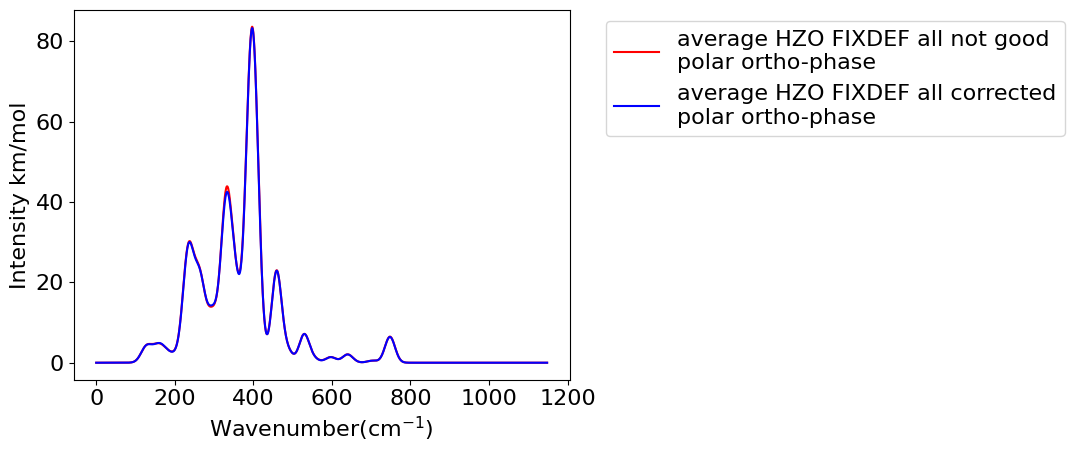

In [51]:
# create figure and axes
fig, ax = plt.subplots()

ax.plot(wvn_Average_HZO_all_FIXDEF_not_good, Int_Average_HZO_all_FIXDEF_not_good, c='red', 
         label='average HZO FIXDEF all not good\npolar ortho-phase')

ax.plot(wvn_Average_HZO_all_FIXDEF, Int_Average_HZO_all_FIXDEF, c='blue', 
         label='average HZO FIXDEF all corrected\npolar ortho-phase')

ax.legend(bbox_to_anchor=(1.05, 1))

ax.set_xlabel('Wavenumber(cm$^{-1}$)', fontsize=16)
ax.set_ylabel('Intensity km/mol', fontsize=16)

## HZO Supercell FIXDEF MONO14
- this is the one we are going to put inside the paper
- the energies were extracted from the IR output files, this is done inside another notebook: http://localhost:8888/notebooks/OneDrive/Python/HZO/Params_extraction/extracting_params_out_DFT_file.ipynb#

### Plotting all configs for SI of HZO paper

HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_A.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_B.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_C.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_D.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_E.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_F.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_G.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_H.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_I.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_J.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_K.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_L.irspec
HZO_Supercell_Monoclinic14/irspec\HZO_sg14_112_M.irspec


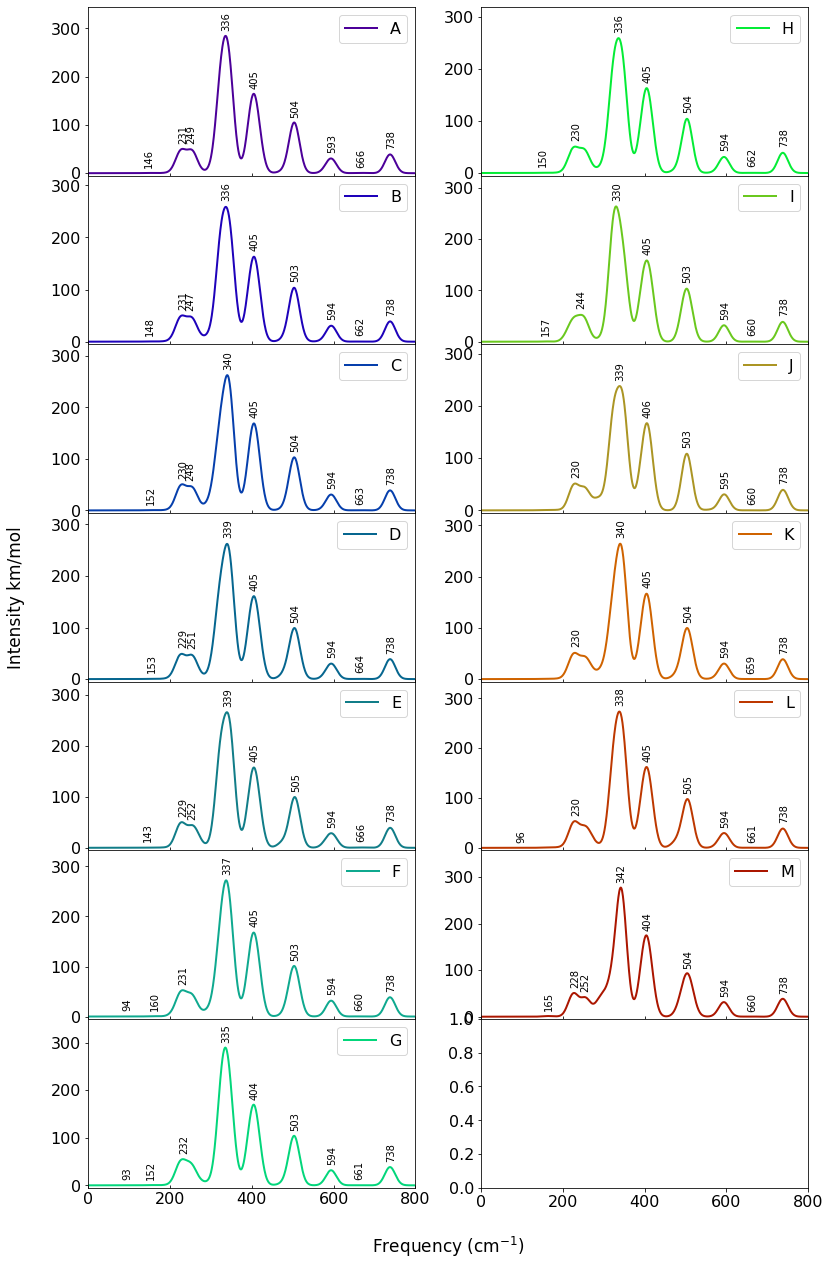

In [121]:
# listing all files to plot
filenames_HZO_all_MONO14_FIXDEF = glob.glob('HZO_Supercell_Monoclinic14/irspec/*')
# sort them by alphabetical order
filenames_HZO_all_MONO14_FIXDEF.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# creating figure and axes
fig, ax = plt.subplots(nrows=7, ncols=2, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = 14
colors = cm.rainbow(np.linspace(0, 1, n))

# itarating over the files, colors and columns fot he figure
for i, j, z in zip(filenames_HZO_all_MONO14_FIXDEF, colors, range(14)):
    if '112' in i:
        print(i)
        #opening the files with pandas
        config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                    names=["Frequency", "Wavelength", 
                           "Raw_abs", "Classical_abs", 
                           "Rayleigh_scat1", "Rayleigh_scat2", 
                           "Reflec_x", "Reflec_y", "Reflec_z"], header=None)

        non_norm = ["J", "M"]

        # plotting half of data into the first column of figure
        if z < 7:
                ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                           label=i[-8], 
                           color=adjust_lightness(j, darker))
                ax[z,0].legend()  
                ax[z,0].tick_params(axis='x', direction='in')
                ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
                ax[z,0].set_xlim(0, 800)
                # adding the frequency values to the peaks
                for peak in find_peaks(config.Raw_abs[:])[0]:
        #             print(peak)

                    #annotation
                    ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                     xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

        else:
            if i[-8] in non_norm:
                normalized = config.Raw_abs[:800]*2
                ax[z-7, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                                label=i[-8], 
                                color=adjust_lightness(j, darker))
                ax[z-7, 1].set_ylim(-5, max(normalized)+80)
                for peak in find_peaks(normalized)[0]:
                    ax[z-7, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                     xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)

            else:   
                ax[z-7, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                                label=i[-8], 
                                color=adjust_lightness(j, darker))

                ax[z-7, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
                for peak in find_peaks(config.Raw_abs[:])[0]:
                    ax[z-7, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                     xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
            ax[z-7, 1].legend() 
            ax[z-7, 1].tick_params(axis='x', direction='in')

# fig.text(0.45, 0.92, 'HZO 112 FIXDEF', fontsize = 17)
fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)


# fig.savefig("HZO_DFT_112_FIXDEF_IR_atoms_unit_cell.png", bbox_inches="tight")

to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_A.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_B.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_C.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_D.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_E.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_F.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_G.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_H.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_I.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_J.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_K.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_L.irspec
to_plot_SI_papier_HZO/mono14_121\HZO_sg14_121_M.irspec


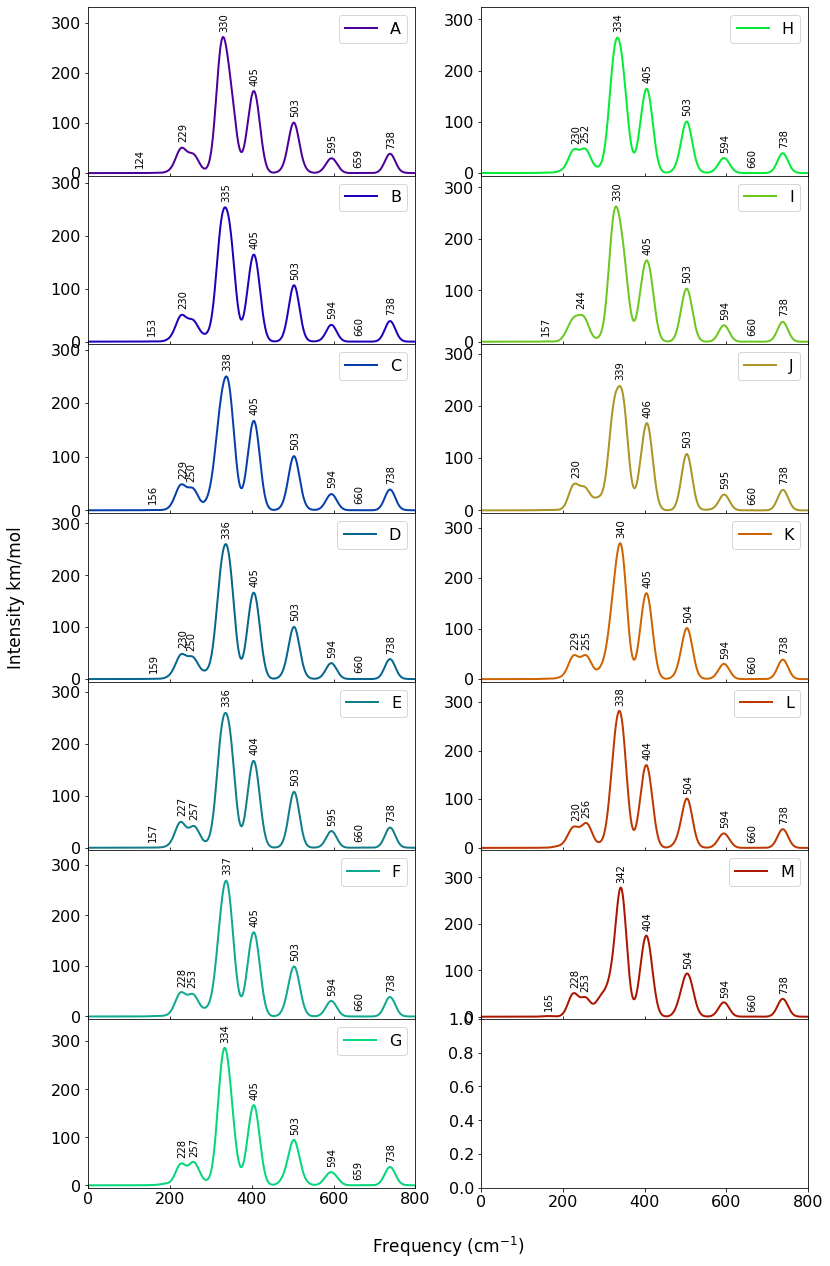

In [133]:
# listing all files to plot
filenames_HZO_all_MONO14_FIXDEF = glob.glob('to_plot_SI_papier_HZO/mono14_121/*')
# print(filenames_HZO_all_MONO14_FIXDEF)
# sort them by alphabetical order
filenames_HZO_all_MONO14_FIXDEF.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# creating figure and axes
fig, ax = plt.subplots(nrows=7, ncols=2, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = 14
colors = cm.rainbow(np.linspace(0, 1, n))

# itarating over the files, colors and columns fot he figure
for i, j, z in zip(filenames_HZO_all_MONO14_FIXDEF, colors, range(14)):
    print(i)
    #opening the files with pandas
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)

    non_norm =  ["J", "M"]

    # plotting half of data into the first column of figure
    if z < 7:
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                       label=i[-8], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(config.Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

    else:
        if i[-8] in non_norm:
            normalized = config.Raw_abs[:800]*2
            ax[z-7, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-7, 1].set_ylim(-5, max(normalized)+80)
            for peak in find_peaks(normalized)[0]:
                ax[z-7, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)

        else:   
            ax[z-7, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))

            ax[z-7, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
            for peak in find_peaks(config.Raw_abs[:])[0]:
                ax[z-7, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        ax[z-7, 1].legend() 
        ax[z-7, 1].tick_params(axis='x', direction='in')

# fig.text(0.45, 0.92, 'HZO 112 FIXDEF', fontsize = 17)
fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)


# fig.savefig("HZO_DFT_112_FIXDEF_IR_atoms_unit_cell.png", bbox_inches="tight")

to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_A.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_B.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_C.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_D.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_E.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_F.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_G.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_H.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_I.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_J.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_K.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_L.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_M.irspec
to_plot_SI_papier_HZO/mono14_211\HZO_sg14_211_N.irspec


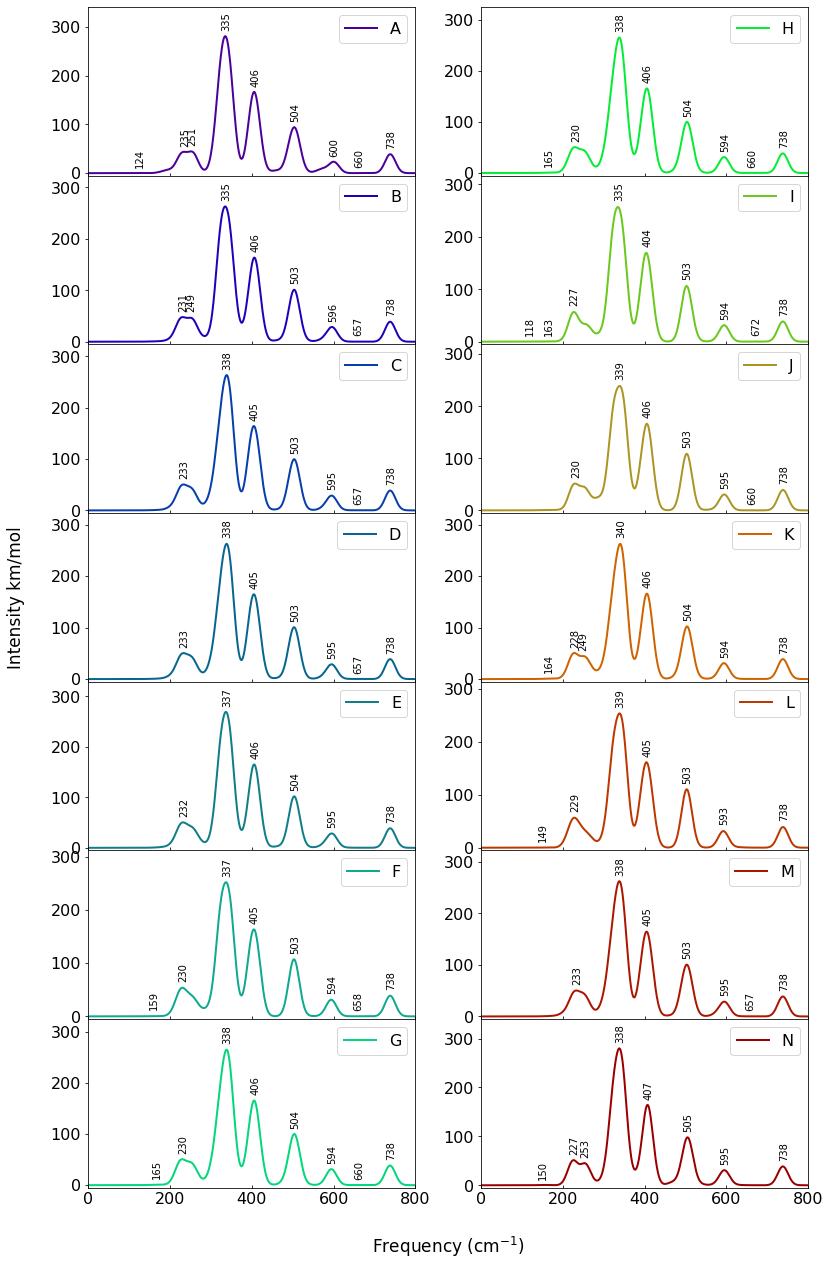

In [136]:
# listing all files to plot
filenames_HZO_all_MONO14_FIXDEF = glob.glob('to_plot_SI_papier_HZO/mono14_211/*')
# print(filenames_HZO_all_MONO14_FIXDEF)
# sort them by alphabetical order
filenames_HZO_all_MONO14_FIXDEF.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# creating figure and axes
fig, ax = plt.subplots(nrows=7, ncols=2, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = 14
colors = cm.rainbow(np.linspace(0, 1, n))

# itarating over the files, colors and columns fot he figure
for i, j, z in zip(filenames_HZO_all_MONO14_FIXDEF, colors, range(14)):
    print(i)
    #opening the files with pandas
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)

    non_norm =  ["J"]

    # plotting half of data into the first column of figure
    if z < 7:
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                       label=i[-8], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(config.Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

    else:
        if i[-8] in non_norm:
            normalized = config.Raw_abs[:800]*2
            ax[z-7, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-7, 1].set_ylim(-5, max(normalized)+80)
            for peak in find_peaks(normalized)[0]:
                ax[z-7, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)

        else:   
            ax[z-7, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))

            ax[z-7, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
            for peak in find_peaks(config.Raw_abs[:])[0]:
                ax[z-7, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        ax[z-7, 1].legend() 
        ax[z-7, 1].tick_params(axis='x', direction='in')

# fig.text(0.45, 0.92, 'HZO 112 FIXDEF', fontsize = 17)
fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)


# fig.savefig("HZO_DFT_112_FIXDEF_IR_atoms_unit_cell.png", bbox_inches="tight")

### Averaging all the 3 HZO MONO14 (112 121 211) using Boltzmann distribution
- the energies are extracted directly from the .out files of Crystal

In [22]:
# opening populations coming from another notebook 
df_HZO_all_populations_MONO14_FIXDEF = pd.read_csv("../Params_extraction/population_HZO_MONO14_FIXDEF_all_corrected.csv")
df_HZO_all_populations_MONO14_FIXDEF = df_HZO_all_populations_MONO14_FIXDEF.sort_values('Unnamed: 0')
# df_HZO_all_populations_MONO14_FIXDEF

In [23]:
# listing all files to plot
filenames_HZO_all_MONO14_FIXDEF = glob.glob('HZO_Supercell_Monoclinic14/irspec/*')
# sort them by alphabetical order
filenames_HZO_all_MONO14_FIXDEF.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# empty dictionary to add the normalized data
d_HZO_all_pop_MONO14_FIXDEF = {}

# iterate over the list of files to plot and the population of each config to be multiplied
for i, population in zip(filenames_HZO_all_MONO14_FIXDEF, df_HZO_all_populations_MONO14_FIXDEF["normalized_population %"]):
#     print(i[34:-7], population)
    # opens the spectrm file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    # calculates the weight of this config
    config["Raw_abs"] = (config.Raw_abs*population)/100
    # saves this config inside the dict
    d_HZO_all_pop_MONO14_FIXDEF[i[34:-7]] = config[["Frequency", "Raw_abs"]]
    
d_HZO_all_pop_MONO14_FIXDEF

{'HZO_sg14_112_A':       Frequency       Raw_abs
 0         0.001  1.322105e-15
 1         1.001  2.303101e-15
 2         2.001  3.987364e-15
 3         3.001  6.860919e-15
 4         4.001  1.173282e-14
 ...         ...           ...
 1174   1174.000  0.000000e+00
 1175   1175.000  0.000000e+00
 1176   1176.000  0.000000e+00
 1177   1177.000  0.000000e+00
 1178   1178.000  0.000000e+00
 
 [1179 rows x 2 columns],
 'HZO_sg14_112_B':       Frequency       Raw_abs
 0         0.001  1.499888e-14
 1         1.001  2.553853e-14
 2         2.001  4.321733e-14
 3         3.001  7.268512e-14
 4         4.001  1.214956e-13
 ...         ...           ...
 1173   1173.000  0.000000e+00
 1174   1174.000  0.000000e+00
 1175   1175.000  0.000000e+00
 1176   1176.000  0.000000e+00
 1177   1177.000  0.000000e+00
 
 [1178 rows x 2 columns],
 'HZO_sg14_112_C':       Frequency       Raw_abs
 0         0.001  2.907267e-15
 1         1.001  5.018883e-15
 2         2.001  8.611077e-15
 3         3.001  1.46

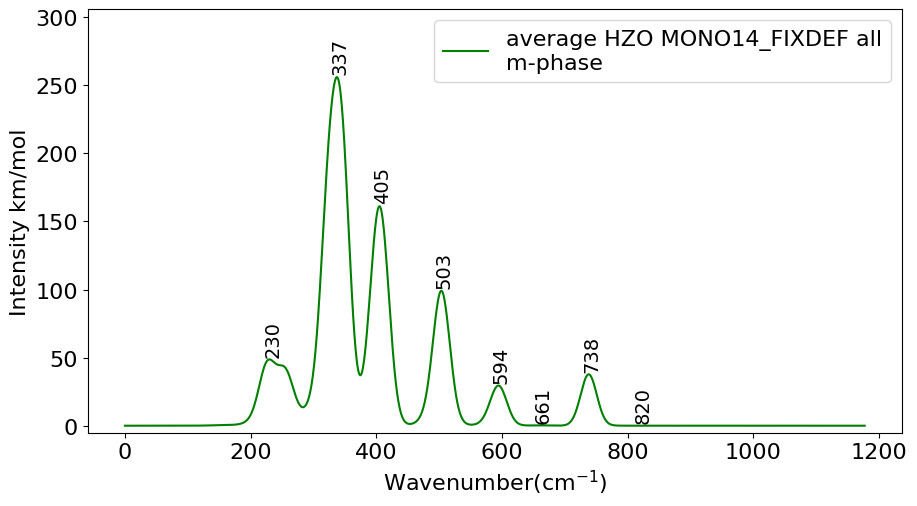

In [24]:
# Calculating the average of all configs
# empty lists to add intensity and frequency values to sum
Int_all = []
wvn_all = []

# iterate over the configs
for k in d_HZO_all_pop_MONO14_FIXDEF.keys():
    # adds the frequencies to an empty list
    wvn_all.append(d_HZO_all_pop_MONO14_FIXDEF[k]['Frequency'])
    # adds the intensities to an empty list
    Int_all.append(d_HZO_all_pop_MONO14_FIXDEF[k]['Raw_abs'])

# total weight of all configurations is 210        
Int_Average_HZO_all_MONO14_FIXDEF = sum(Int_all) #/210
wvn_Average_HZO_all_MONO14_FIXDEF = sum(wvn_all)/len(wvn_all)

# create figure and axes
fig, ax = plt.subplots()

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# matplotlib.rcParams.update({'font.size': 18})
# plotting
ax.plot(wvn_Average_HZO_all_MONO14_FIXDEF, Int_Average_HZO_all_MONO14_FIXDEF, c='green', 
         label='average HZO MONO14_FIXDEF all\nm-phase')
ax.legend(fontsize=16)
ax.set_xlabel('Wavenumber(cm$^{-1}$)', fontsize=16)
ax.set_ylabel('Intensity km/mol', fontsize=16)
ax.set_ylim(-5, max(Int_Average_HZO_all_MONO14_FIXDEF)+50)

# adding frequency values to peaks iteratively
for peak in find_peaks(Int_Average_HZO_all_MONO14_FIXDEF)[0]:
    ax.annotate(str(round(wvn_Average_HZO_all_MONO14_FIXDEF[peak])), 
                xytext=(wvn_Average_HZO_all_MONO14_FIXDEF[peak]-10, Int_Average_HZO_all_MONO14_FIXDEF[peak]+5), 
                xy=(wvn_Average_HZO_all_MONO14_FIXDEF[peak], Int_Average_HZO_all_MONO14_FIXDEF[peak]), 
                fontsize=14, rotation=90) 

fig.set_size_inches(10.5, 5.5)
# fig.savefig("Average_HZOall_sp29.png", bbox_inches="tight")



In [25]:
np.save('Int_Average_HZO_all_MONO14_FIXDEF_corrected.npy', Int_Average_HZO_all_MONO14_FIXDEF)
np.save('wvn_Average_HZO_all_MONO14_FIXDEF_corrected.npy', wvn_Average_HZO_all_MONO14_FIXDEF)

### still ongoing- HZO 112 MONO14

HZO_sg14_112_A
HZO_sg14_112_B
HZO_sg14_112_C
HZO_sg14_112_D
HZO_sg14_112_E
HZO_sg14_112_F
HZO_sg14_112_G
HZO_sg14_112_H
HZO_sg14_112_I
HZO_sg14_112_J
HZO_sg14_112_K
HZO_sg14_112_L
HZO_sg14_112_M
HZO_sg14_121_A
HZO_sg14_121_B
HZO_sg14_121_C
HZO_sg14_121_D
HZO_sg14_121_E
HZO_sg14_121_F
HZO_sg14_121_G
HZO_sg14_121_H
HZO_sg14_121_I
HZO_sg14_121_J
HZO_sg14_121_K
HZO_sg14_121_L
HZO_sg14_121_M
HZO_sg14_211_A
HZO_sg14_211_B
HZO_sg14_211_C
HZO_sg14_211_D
HZO_sg14_211_E
HZO_sg14_211_F
HZO_sg14_211_G
HZO_sg14_211_H
HZO_sg14_211_I
HZO_sg14_211_J
HZO_sg14_211_K
HZO_sg14_211_L
HZO_sg14_211_M
HZO_sg14_211_N


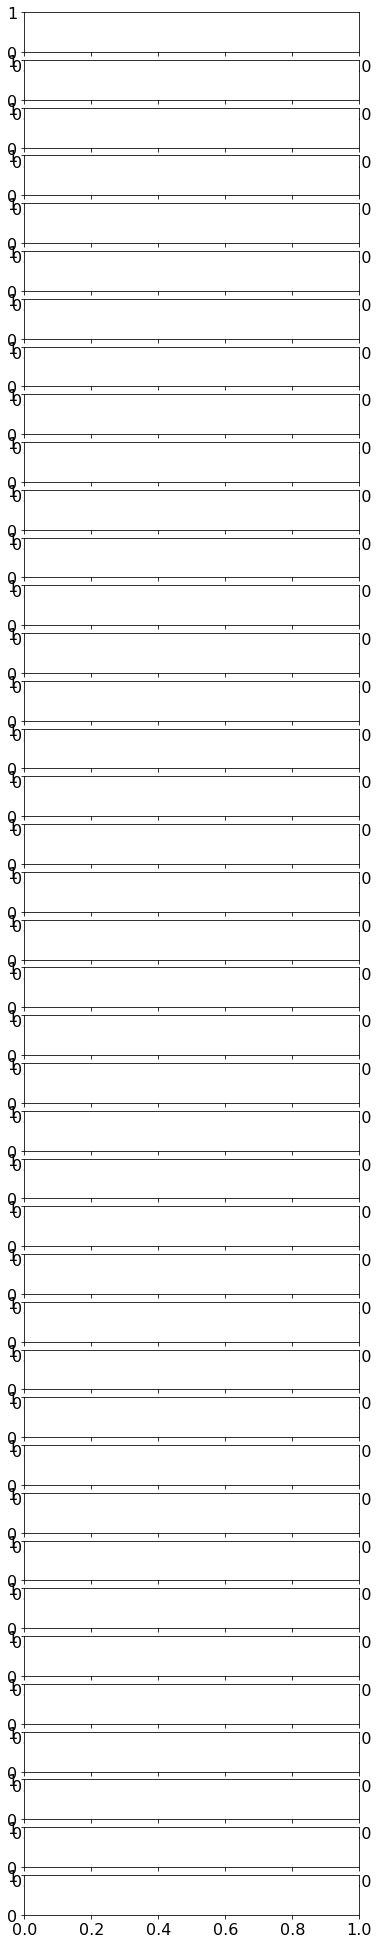

In [21]:
# listing all files to plot
filenames_HZO_112_MONO14_FIXDEF = glob.glob('HZO_Supercell_Monoclinic14/irspec/*')
# print(filenames_HZO_112_MONO14_FIXDEF)

# # white background to appears in dark jupyter theme
fig, ax = plt.subplots(nrows=len(filenames_HZO_112_MONO14_FIXDEF), ncols=1, figsize=(6,35))
rect = fig.patch
rect.set_facecolor('white')

# empty dictionary to add the normalized data
d_HZO_112_MONO14_FIXDEF = {}

# only 12 atoms in unit cell, not 24 as the others
non_norm = ["F", "J", "M"] # CHANGEEEEEEEEEEEEEEEEEE

# iterate over the list of files to plot 
for i in filenames_HZO_112_MONO14_FIXDEF:
#     print(i[-8])
    print(i[-21:-7])
    # opens the spectrm file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    if i[-23] in non_norm:
        print(i[-23])
        # calculates the weight of this config
        config["Raw_abs"] = config["Raw_abs"]*2
    else:
        config["Raw_abs"] = config["Raw_abs"]
    # saves this config inside the dict
    d_HZO_112_MONO14_FIXDEF[i[-21:-7]] = config[["Frequency", "Raw_abs"]]

IndexError: string index out of range

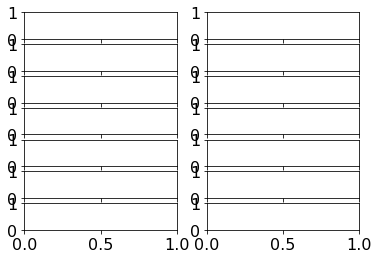

In [27]:
# Plotting HZO 121 using the number of atoms in unit cell
nrows=7
ncols=2
darker=0.6

# creating figure and axes
fig, ax = plt.subplots(nrows, ncols, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = len(d_HZO_112_MONO14_FIXDEF)
colors = cm.rainbow(np.linspace(0, 1, n))

# iterating over the files, colors and columns for the figure
for i, j, z in zip(d_HZO_112_MONO14_FIXDEF.keys(), colors, range(len(d_HZO_112_MONO14_FIXDEF))):
    print(i, i[-16])
    # plotting half of data into the first column of figure
    if z < nrows:
            ax[z,0].plot(d_HZO_112_MONO14_FIXDEF[i].Frequency[:800], d_HZO_112_MONO14_FIXDEF[i].Raw_abs[:800], linewidth=2, 
                       label=i[-16], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(d_HZO_112_MONO14_FIXDEF[i].Raw_abs[:])+70)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(d_HZO_112_MONO14_FIXDEF[i].Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(d_HZO_112_MONO14_FIXDEF[i].Frequency[peak])), xytext=(d_HZO_112_MONO14_FIXDEF[i].Frequency[peak]-10, d_HZO_112_MONO14_FIXDEF[i].Raw_abs[peak]+15), 
                                 xy=(d_HZO_112_MONO14_FIXDEF[i].Frequency[peak], d_HZO_112_MONO14_FIXDEF[i].Raw_abs[peak]), fontsize=10, rotation=90)

    else:
            ax[z-nrows, 1].plot(d_HZO_112_MONO14_FIXDEF[i].Frequency[:800], d_HZO_112_MONO14_FIXDEF[i].Raw_abs[:800], linewidth=2, 
                            label=i[-16], 
                            color=adjust_lightness(j, darker))
            ax[z-nrows, 1].legend()  
            ax[z-nrows, 1].tick_params(axis='x', direction='in')
            ax[z-nrows, 1].set_ylim(-5, max(d_HZO_112_MONO14_FIXDEF[i].Raw_abs[:])+70)

            for peak in find_peaks(d_HZO_112_MONO14_FIXDEF[i].Raw_abs[:])[0]:
                ax[z-nrows, 1].annotate(str(round(d_HZO_112_MONO14_FIXDEF[i].Frequency[peak])), xytext=(d_HZO_112_MONO14_FIXDEF[i].Frequency[peak]-10, d_HZO_112_MONO14_FIXDEF[i].Raw_abs[peak]+15), 
                                 xy=(d_HZO_112_MONO14_FIXDEF[i].Frequency[peak], d_HZO_112_MONO14_FIXDEF[i].Raw_abs[peak]), fontsize=10, rotation=90)


fig.text(0.32, 0.92, "HZO 121 - same atoms in unit cell", fontsize = 17)
fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)


# fig.savefig("HZO_112_MONO14_FIXDEF_DFT_IR_atoms_unit_cell.png", bbox_inches="tight")

### HZO 121 MONO14

### HZO 211 MONO14

## HZO Supercell FIXDEF TETRA137
- this is the one we are going to put inside the paper
- the energies were extracted from the IR output files, this is done inside another notebook: http://localhost:8888/notebooks/OneDrive/Python/HZO/Params_extraction/extracting_params_out_DFT_file.ipynb#

### Plotting all configs for SI of HZO paper

to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_F.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_F.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_F.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_G.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_G.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_H.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_H.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_I.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_I.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_J.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_J.irspec
to_plot_SI_papier_HZO/tetra137_122\HZO_sg137_122_J.irspec


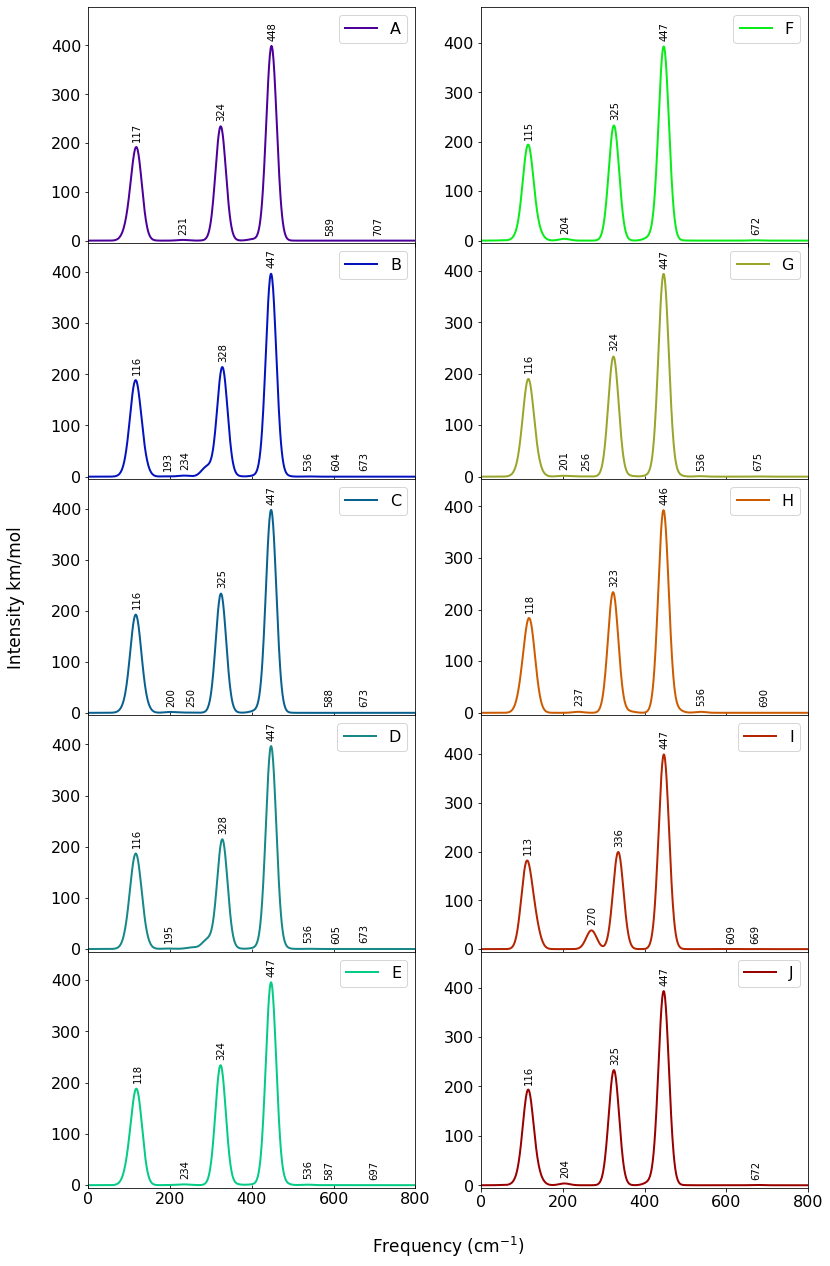

In [165]:
# listing all files to plot
filenames = glob.glob('to_plot_SI_papier_HZO/tetra137_122/*')
# print(filenames_HZO_all_MONO14_FIXDEF)
# sort them by alphabetical order
filenames.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# creating figure and axes
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = 10
colors = cm.rainbow(np.linspace(0, 1, n))

# itarating over the files, colors and columns fot he figure
for i, j, z in zip(filenames, colors, range(14)):
#     print(i)
    #opening the files with pandas
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)

#     non_norm =  ["A", "F"]

    # plotting half of data into the first column of figure
    if z < 5:
        if i[-8] == 'A':
#             print(i)
            normalized = config.Raw_abs[:800]*2
            ax[z, 0].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z, 0].set_ylim(-5, max(normalized)+80)
            ax[z,0].legend()
            for peak in find_peaks(normalized)[0]:
                ax[z, 0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
        else:    
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                       label=i[-8], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(config.Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

    else:
        print(i)
        if i[-8] == 'F'or i[-8] == 'J':
            print(i)
            normalized = config.Raw_abs[:800]*2
            ax[z-5, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-5, 1].set_ylim(-5, max(normalized)+80)
            ax[z-5, 1].legend()
            for peak in find_peaks(normalized)[0]:
                ax[z-5, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)

        if i[-8] == 'I':
            print(i)
            normalized = config.Raw_abs[:800]*4
            ax[z-5, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-5, 1].set_ylim(-5, max(normalized)+80)
            for peak in find_peaks(normalized)[0]:
                ax[z-5, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
                
        else:  
            print(i)
            if i[-8] == 'F'or i[-8] == 'J':
                continue
            ax[z-5, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))

            ax[z-5, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
            for peak in find_peaks(config.Raw_abs[:])[0]:
                ax[z-5, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        ax[z-5, 1].legend() 
        ax[z-5, 1].tick_params(axis='x', direction='in')

fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)



to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_F.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_F.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_F.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_G.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_G.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_H.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_H.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_I.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_I.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_J.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_J.irspec
to_plot_SI_papier_HZO/tetra137_212\HZO_sg137_212_J.irspec


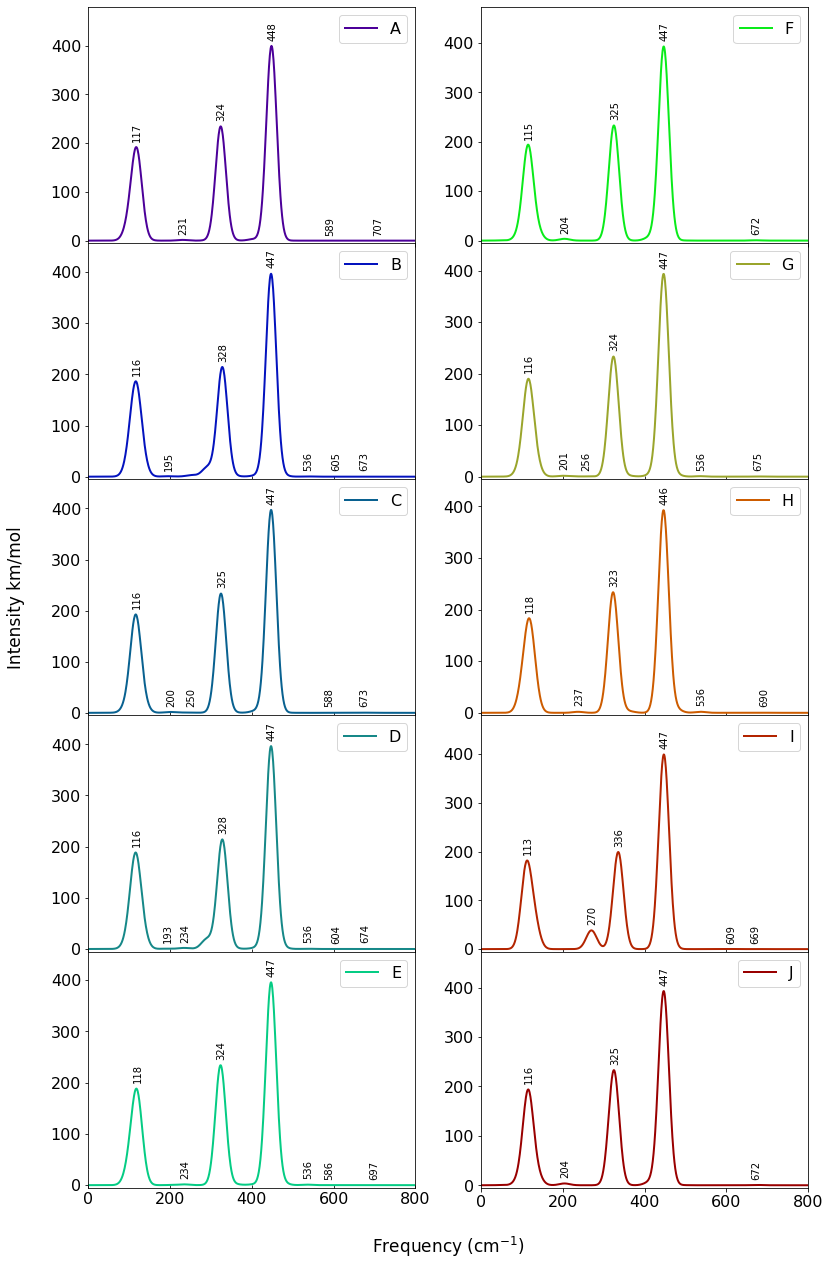

In [166]:
# listing all files to plot
filenames = glob.glob('to_plot_SI_papier_HZO/tetra137_212/*')
# print(filenames_HZO_all_MONO14_FIXDEF)
# sort them by alphabetical order
filenames.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# creating figure and axes
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = 10
colors = cm.rainbow(np.linspace(0, 1, n))

# itarating over the files, colors and columns fot he figure
for i, j, z in zip(filenames, colors, range(14)):
#     print(i)
    #opening the files with pandas
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)

#     non_norm =  ["A", "F"]

    # plotting half of data into the first column of figure
    if z < 5:
        if i[-8] == 'A':
#             print(i)
            normalized = config.Raw_abs[:800]*2
            ax[z, 0].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z, 0].set_ylim(-5, max(normalized)+80)
            ax[z,0].legend()
            for peak in find_peaks(normalized)[0]:
                ax[z, 0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
        else:    
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                       label=i[-8], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(config.Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

    else:
        print(i)
        if i[-8] == 'F'or i[-8] == 'J':
            print(i)
            normalized = config.Raw_abs[:800]*2
            ax[z-5, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-5, 1].set_ylim(-5, max(normalized)+80)
            ax[z-5, 1].legend()
            for peak in find_peaks(normalized)[0]:
                ax[z-5, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)

        if i[-8] == 'I':
            print(i)
            normalized = config.Raw_abs[:800]*4
            ax[z-5, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-5, 1].set_ylim(-5, max(normalized)+80)
            for peak in find_peaks(normalized)[0]:
                ax[z-5, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
                
        else:  
            print(i)
            if i[-8] == 'F'or i[-8] == 'J':
                continue
            ax[z-5, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))

            ax[z-5, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
            for peak in find_peaks(config.Raw_abs[:])[0]:
                ax[z-5, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        ax[z-5, 1].legend() 
        ax[z-5, 1].tick_params(axis='x', direction='in')

fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 20.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)



to_plot_SI_papier_HZO/tetra137_221\HZO_sg137_221_D.irspec
to_plot_SI_papier_HZO/tetra137_221\HZO_sg137_221_D.irspec
to_plot_SI_papier_HZO/tetra137_221\HZO_sg137_221_E.irspec
to_plot_SI_papier_HZO/tetra137_221\HZO_sg137_221_E.irspec
to_plot_SI_papier_HZO/tetra137_221\HZO_sg137_221_F.irspec
to_plot_SI_papier_HZO/tetra137_221\HZO_sg137_221_F.irspec
to_plot_SI_papier_HZO/tetra137_221\HZO_sg137_221_F.irspec


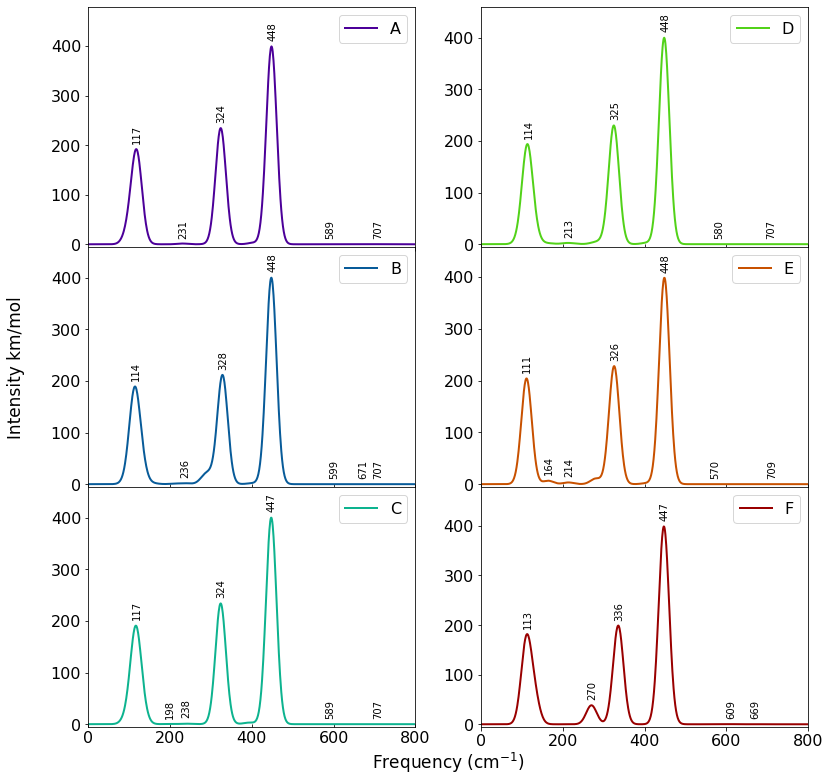

In [175]:
# listing all files to plot
filenames = glob.glob('to_plot_SI_papier_HZO/tetra137_221/*')
# print(filenames_HZO_all_MONO14_FIXDEF)
# sort them by alphabetical order
filenames.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# creating figure and axes
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
n = 6
colors = cm.rainbow(np.linspace(0, 1, n))

# itarating over the files, colors and columns fot he figure
for i, j, z in zip(filenames, colors, range(14)):
#     print(i)
    #opening the files with pandas
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)

#     non_norm =  ["A", "F"]

    # plotting half of data into the first column of figure
    if z < 3:
        if i[-8] == 'A':
#             print(i)
            normalized = config.Raw_abs[:800]*2
            ax[z, 0].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z, 0].set_ylim(-5, max(normalized)+80)
            ax[z,0].legend()
            for peak in find_peaks(normalized)[0]:
                ax[z, 0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
        else:    
            ax[z,0].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                       label=i[-8], 
                       color=adjust_lightness(j, darker))
            ax[z,0].legend()  
            ax[z,0].tick_params(axis='x', direction='in')
            ax[z,0].set_ylim(-5, max(config.Raw_abs[:])+60)
            ax[z,0].set_xlim(0, 800)
            # adding the frequency values to the peaks
            for peak in find_peaks(config.Raw_abs[:])[0]:
    #             print(peak)

                #annotation
                ax[z,0].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)

    else:
        print(i)
        if i[-8] == 'F'or i[-8] == 'J':
            print(i)
            normalized = config.Raw_abs[:800]*4
            ax[z-3, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-3, 1].set_ylim(-5, max(normalized)+80)
            ax[z-3, 1].legend()
            for peak in find_peaks(normalized)[0]:
                ax[z-3, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)

        if i[-8] == 'I':
            print(i)
            normalized = config.Raw_abs[:800]*4
            ax[z-3, 1].plot(config.Frequency[:800], normalized, linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))
            ax[z-3, 1].set_ylim(-5, max(normalized)+80)
            for peak in find_peaks(normalized)[0]:
                ax[z-3, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, normalized[peak]+15), 
                                 xy=(config.Frequency[peak], normalized[peak]), fontsize=10, rotation=90)
                
        else:  
            print(i)
            if i[-8] == 'F'or i[-8] == 'J':
                continue
            ax[z-3, 1].plot(config.Frequency[:800], config.Raw_abs[:800], linewidth=2, 
                            label=i[-8], 
                            color=adjust_lightness(j, darker))

            ax[z-3, 1].set_ylim(-5, max(config.Raw_abs[:])+60)
            for peak in find_peaks(config.Raw_abs[:])[0]:
                ax[z-3, 1].annotate(str(round(config.Frequency[peak])), xytext=(config.Frequency[peak]-10, config.Raw_abs[peak]+15), 
                                 xy=(config.Frequency[peak], config.Raw_abs[peak]), fontsize=10, rotation=90)
        ax[z-3, 1].legend() 
        ax[z-3, 1].tick_params(axis='x', direction='in')

fig.text(0.5, 0.06, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 16})
fig.set_size_inches(12.5, 12.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0)



### Averaging all the 3 HZO TETRA137 (112 121 211) using Boltzmann distribution
- the energies are extracted directly from the .out files of Crystal

In [27]:
# opening populations coming from another notebook 
df_HZO_all_populations_TETRA137_FIXDEF = pd.read_csv("../Params_extraction/population_HZO_TETRA137_FIXDEF_all_corrected.csv")
df_HZO_all_populations_TETRA137_FIXDEF = df_HZO_all_populations_TETRA137_FIXDEF.sort_values('Unnamed: 0')
df_HZO_all_populations_TETRA137_FIXDEF

Unnamed: 0  normalized_population  normalized_population %
0   HZO_sg137_122_A                0.01920                  1.92043
1   HZO_sg137_122_B                0.07606                  7.60615
2   HZO_sg137_122_C                0.03797                  3.79683
3   HZO_sg137_122_D                0.07593                  7.59312
4   HZO_sg137_122_E                0.03828                  3.82822
5   HZO_sg137_122_F                0.00935                  0.93545
6   HZO_sg137_122_G                0.03777                  3.77655
7   HZO_sg137_122_H                0.01900                  1.89998
8   HZO_sg137_122_I                0.00948                  0.94775
9   HZO_sg137_122_J                0.00937                  0.93689
10  HZO_sg137_212_A                0.01921                  1.92063
11  HZO_sg137_212_B                0.07596                  7.59555
12  HZO_sg137_212_C                0.03795                  3.79535
13  HZO_sg137_212_D                0.07606                  7.60585
14  HZO_sg137_212_E                0.03829                  3.82901
15  HZO_sg137_212_F                0.00935                  0.93542
16  HZO_sg137_212_G                0.03778                  3.77803
17  HZO_sg137_212_H                0.01900                  1.89986
18  HZO_sg137_212_I                0.00948                  0.94772
19  HZO_sg137_212_J                0.00937                  0.93689
20  HZO_sg137_221_A                0.03841                  3.84101
21  HZO_sg137_221_B                0.15320                 15.32031
22  HZO_sg137_221_C                0.03834                  3.83366
23  HZO_sg137_221_D                0.07672                  7.67248
24  HZO_sg137_221_E                0.01900                  1.90045
25  HZO_sg137_221_F                0.00946                  0.94638

In [28]:
# listing all files to plot
filenames_HZO_all_TETRA137_FIXDEF = glob.glob('HZO_Supercell_Tetra137/irspec/*')
# sort them by alphabetical order
filenames_HZO_all_TETRA137_FIXDEF.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# empty dictionary to add the normalized data
d_HZO_all_pop_TETRA137_FIXDEF = {}

# iterate over the list of files to plot and the population of each config to be multiplied
for i, population in zip(filenames_HZO_all_TETRA137_FIXDEF, df_HZO_all_populations_TETRA137_FIXDEF["normalized_population %"]):
#     print(i[34:-7], population)
    # opens the spectrm file of one config
    config = pd.read_csv(i, delim_whitespace=True, index_col=False, 
                names=["Frequency", "Wavelength", 
                       "Raw_abs", "Classical_abs", 
                       "Rayleigh_scat1", "Rayleigh_scat2", 
                       "Reflec_x", "Reflec_y", "Reflec_z"], header=None)
    # calculates the weight of this config
    config["Raw_abs"] = (config.Raw_abs*population)/100
    # saves this config inside the dict
    d_HZO_all_pop_TETRA137_FIXDEF[i[30:-7]] = config[["Frequency", "Raw_abs"]]
    
# d_HZO_all_pop_TETRA137_FIXDEF

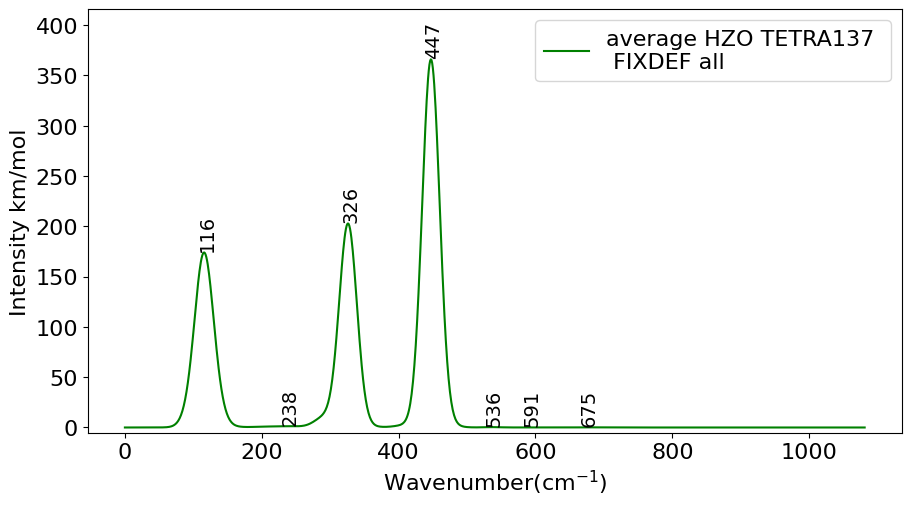

In [29]:
# Calculating the average of all configs
# empty lists to add intensity and frequency values to sum
Int_all = []
wvn_all = []

# iterate over the configs
for k in d_HZO_all_pop_TETRA137_FIXDEF.keys():
    # adds the frequencies to an empty list
    wvn_all.append(d_HZO_all_pop_TETRA137_FIXDEF[k]['Frequency'])
    # adds the intensities to an empty list
    Int_all.append(d_HZO_all_pop_TETRA137_FIXDEF[k]['Raw_abs'])

# total weight of all configurations is 210        
Int_Average_HZO_all_TETRA137_FIXDEF = sum(Int_all) #/210
wvn_Average_HZO_all_TETRA137_FIXDEF = sum(wvn_all)/len(wvn_all)

# create figure and axes
fig, ax = plt.subplots()

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# matplotlib.rcParams.update({'font.size': 18})
# plotting
ax.plot(wvn_Average_HZO_all_TETRA137_FIXDEF, Int_Average_HZO_all_TETRA137_FIXDEF, c='green', 
         label='average HZO TETRA137 \n FIXDEF all')
ax.legend(fontsize=16)
ax.set_xlabel('Wavenumber(cm$^{-1}$)', fontsize=16)
ax.set_ylabel('Intensity km/mol', fontsize=16)
ax.set_ylim(-5, max(Int_Average_HZO_all_TETRA137_FIXDEF)+50)

# adding frequency values to peaks iteratively
for peak in find_peaks(Int_Average_HZO_all_TETRA137_FIXDEF)[0]:
    ax.annotate(str(round(wvn_Average_HZO_all_TETRA137_FIXDEF[peak])), 
                xytext=(wvn_Average_HZO_all_TETRA137_FIXDEF[peak]-10, Int_Average_HZO_all_TETRA137_FIXDEF[peak]+5), 
                xy=(wvn_Average_HZO_all_TETRA137_FIXDEF[peak], Int_Average_HZO_all_TETRA137_FIXDEF[peak]), 
                fontsize=14, rotation=90) 

fig.set_size_inches(10.5, 5.5)
# fig.savefig("Average_HZOall_sp29.png", bbox_inches="tight")



In [30]:
np.save('Int_Average_HZO_all_TETRA137_FIXDEF_corrected.npy', Int_Average_HZO_all_TETRA137_FIXDEF)
np.save('wvn_Average_HZO_all_TETRA137_FIXDEF_corrected.npy', wvn_Average_HZO_all_TETRA137_FIXDEF)

## Plotting Figure for HZO paper: Boltzmann Average of all HZO for t-, m- and o- phases
- can start from here
- all calculs finished
- all averages saved as npy

In [345]:
Int_Average_HZO_all_TETRA137_FIXDEF = np.load('Int_Average_HZO_all_TETRA137_FIXDEF.npy')
wvn_Average_HZO_all_TETRA137_FIXDEF = np.load('wvn_Average_HZO_all_TETRA137_FIXDEF.npy')

Int_Average_HZO_all_MONO14_FIXDEF = np.load('Int_Average_HZO_all_MONO14_FIXDEF.npy')
wvn_Average_HZO_all_MONO14_FIXDEF = np.load('wvn_Average_HZO_all_MONO14_FIXDEF.npy')

Int_Average_HZO_all_FIXDEF = np.load('Int_Average_HZO_all_FIXDEF.npy')
wvn_Average_HZO_all_FIXDEF = np.load('wvn_Average_HZO_all_FIXDEF.npy')

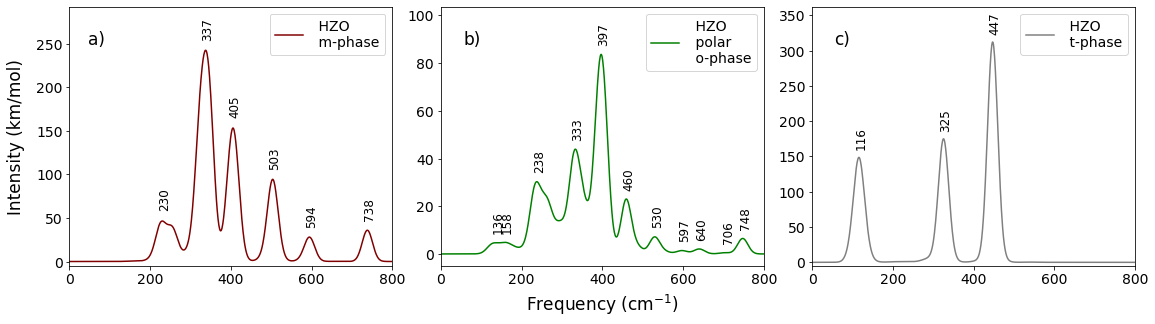

In [346]:
# creating figure and axes
fig, ax = plt.subplots(nrows=1, ncols=3) #, sharey=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
colors = cm.rainbow(np.linspace(0, 1, 3))

# itarating over the files, colors and columns for the figure

### MONOCLINIC ###
ax[0].plot(wvn_Average_HZO_all_MONO14_FIXDEF, Int_Average_HZO_all_MONO14_FIXDEF, c='maroon', 
     label=' HZO \n m-phase')
ax[0].legend(fontsize=14)
ax[0].set_ylim(-5, max(Int_Average_HZO_all_MONO14_FIXDEF)+50)
ax[0].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_MONO14_FIXDEF, 
         Int=Int_Average_HZO_all_MONO14_FIXDEF, 
         axis=ax[0], 
         fontsize=12,
         shift_Int= 15, 
         shift_x= -10, 
         rotation=90, 
#              width=0.00000002,
         threshold=10,
             distance=0.0000001,
         prominence=None,
         height=0)
            
### ORTHORHOMBIC ###
ax[1].plot(wvn_Average_HZO_all_FIXDEF, Int_Average_HZO_all_FIXDEF, c='green', 
     label=' HZO \n polar \n o-phase')
ax[1].legend(fontsize=14)
ax[1].set_ylim(-5, max(Int_Average_HZO_all_FIXDEF)+20)
ax[1].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_FIXDEF, 
         Int=Int_Average_HZO_all_FIXDEF, 
         axis=ax[1], 
         fontsize=12,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
#          threshold=threshold_loss_function,
#              distance=0.0001,
         prominence=None,
         height=0)


### TETRAGONAL ###
ax[2].plot(wvn_Average_HZO_all_TETRA137_FIXDEF, Int_Average_HZO_all_TETRA137_FIXDEF, c='gray', 
     label=' HZO \n t-phase')
ax[2].legend(fontsize=14)
ax[2].set_ylim(-5, max(Int_Average_HZO_all_TETRA137_FIXDEF)+50)
ax[2].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_TETRA137_FIXDEF, 
         Int=Int_Average_HZO_all_TETRA137_FIXDEF, 
         axis=ax[2], 
         fontsize=12,
         shift_Int= 15, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=20,
#              distance=0.0001,
         prominence=None,
         height=0)

    
# fig.text(0.38, 0.92, 'Average HZO - Tetra, Mono, Ortho', fontsize = 17)
fig.text(0.5, -0.02, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.06, 0.5, 'Intensity (km/mol)', ha='center', va='center', rotation='vertical', fontsize = 17)
plt.rcParams.update({'font.size': 14})
fig.set_size_inches(18.5, 4.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0)

# ax[0].annotate("a)", xy=(100, ))
fig.text(0.1202, 0.8, 'a)', ha='center', va='center', fontsize = 17)
fig.text(0.402, 0.8, 'b)', ha='center', va='center', fontsize = 17)
fig.text(0.68, 0.8, 'c)', ha='center', va='center', fontsize = 17)

fig.savefig("Average_HZO_tetra_mono_ortho.png", bbox_inches="tight")

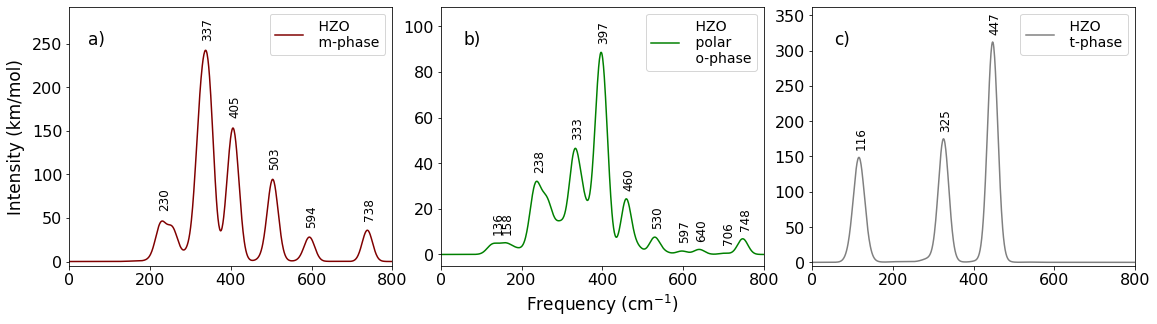

In [32]:
Image(filename='Average_HZO_tetra_mono_ortho.png') 

## Plotting Figure for HZO Paper: Exp vs Theoretical

### Opening Boltzmann Averages DFT spectra data:

In [29]:
Int_Average_HZO_all_TETRA137_FIXDEF = np.load('Int_Average_HZO_all_TETRA137_FIXDEF.npy')
wvn_Average_HZO_all_TETRA137_FIXDEF = np.load('wvn_Average_HZO_all_TETRA137_FIXDEF.npy')

Int_Average_HZO_all_MONO14_FIXDEF = np.load('Int_Average_HZO_all_MONO14_FIXDEF.npy')
wvn_Average_HZO_all_MONO14_FIXDEF = np.load('wvn_Average_HZO_all_MONO14_FIXDEF.npy')

Int_Average_HZO_all_FIXDEF = np.load('Int_Average_HZO_all_FIXDEF.npy')
wvn_Average_HZO_all_FIXDEF = np.load('wvn_Average_HZO_all_FIXDEF.npy')

### Opening experimental HZO IR data:

In [30]:
filenames = glob.glob('../HZO_Exp/*.npy')
print(filenames)

# empty dictionary to add the exp data
d_HZO_exp = {}

# iterating over the files to save data
for file in filenames:
    print(file)
    
    sample = np.load(file)
    
    d_HZO_exp[file[-6:-4]] = sample 

# d_HZO_exp

['../HZO_Exp\\10.npy', '../HZO_Exp\\11.npy', '../HZO_Exp\\17.npy', '../HZO_Exp\\21.npy', '../HZO_Exp\\52.npy']
../HZO_Exp\10.npy
../HZO_Exp\11.npy
../HZO_Exp\17.npy
../HZO_Exp\21.npy
../HZO_Exp\52.npy


### Mixing Tetra+Mono DFT spectra

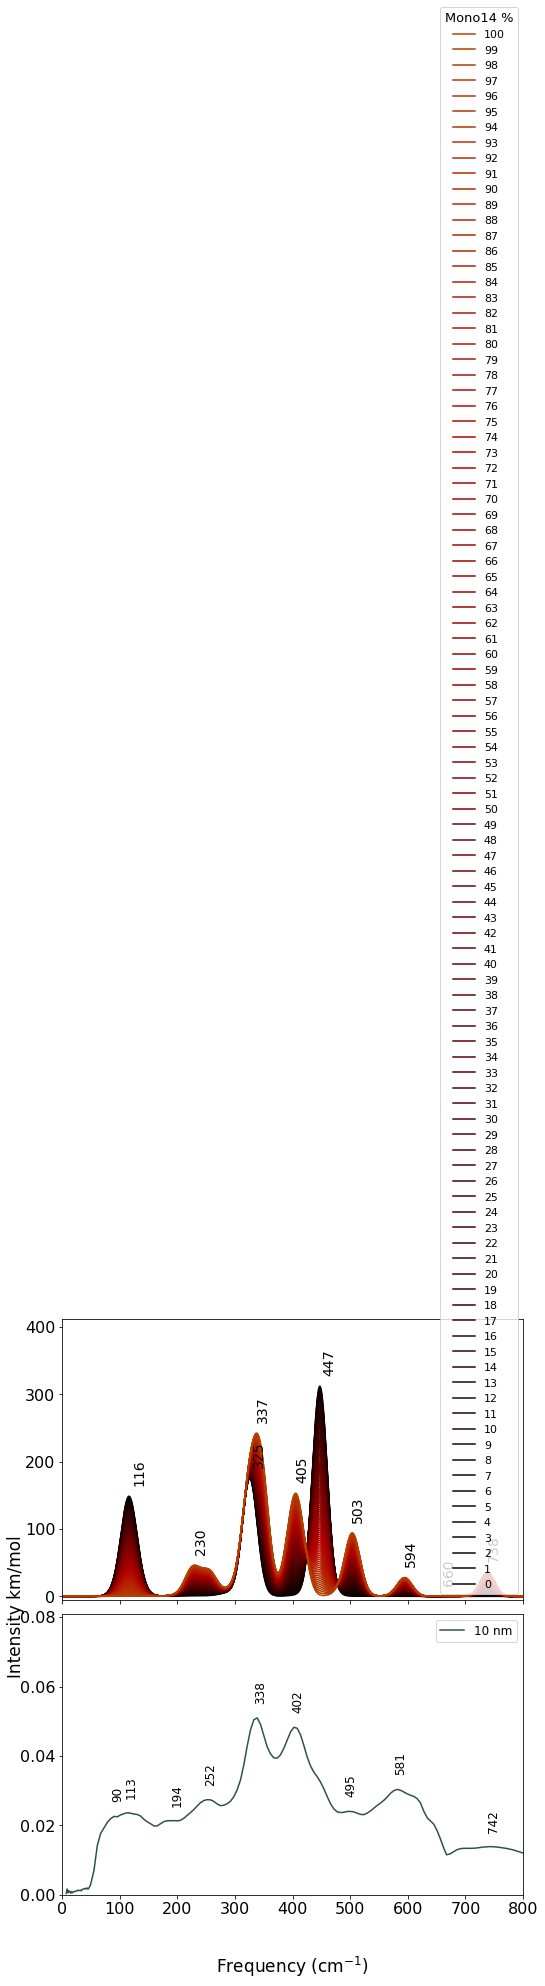

In [321]:
ratios = np.arange(0, 1.01, 0.01)
# ratios = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# ratios = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
# ratios = [0.5, 0.6, 0.7, 0.8]

darker = 0.7

# Intensities already averaged with Boltzmann distribution (I cut where there are NAN - different shapes)
tetra137 = Int_Average_HZO_all_TETRA137_FIXDEF[:1082]
mono14 = Int_Average_HZO_all_MONO14_FIXDEF[:1082]

wvn = (wvn_Average_HZO_all_TETRA137_FIXDEF[:1082] + \
       wvn_Average_HZO_all_MONO14_FIXDEF[:1082])/2

colors = plt.cm.hot(np.linspace(0, 0.5, len(ratios)))

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,10)) 

mix_mono14_tetra137 = {}
for i, j in zip(ratios, colors):
    av = mono14*i + tetra137*(1-i)
    mix_mono14_tetra137[i] = np.concatenate((np.array([wvn]).T, np.array([av]).T), axis=1)
    ax[0].plot(wvn, av, c=adjust_lightness(j, darker), 
         label=round(i*100))
    
ax[0].set_xlim(50, 670)
ax[0].set_ylim(-5, max(tetra137)+100)

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], title='Mono14 %', title_fontsize= 13, fontsize=11)

put_freq(wvn, tetra137, axis=ax[0], color="black", shift_x=5, shift_Int=20, threshold=20)
put_freq(wvn, mono14, axis=ax[0], color="black", shift_x=-1, shift_Int=20)


### 10 nm + MIX TETRA MONO ###
ax[1].plot(d_HZO_exp['10'][:, 0], -np.log(d_HZO_exp['10'][:, 1]), c='darkslategray', 
     label='10 nm')
ax[1].legend(fontsize=12) #, title='HZO Exp m- and polar o-phase (nm)', title_fontsize=10)
ax[1].set_ylim(0, max(-np.log(d_HZO_exp['10'][:, 1]))+0.03)
ax[1].set_xlim(0, 800)

# ax2=ax[1].twinx()
# ratio_to_plot = 0.5
# ax2.plot(mix_mono14_tetra137[ratio_to_plot][:, 0], mix_mono14_tetra137[ratio_to_plot][:, 1], c='darkslategray', alpha=0.2,
#      label=f'Mix {ratio_to_plot} Tetra + Mono')
# ax2.legend(fontsize=12, bbox_to_anchor=(1, 0.8)) 

put_freq(x=d_HZO_exp['10'][:, 0], 
         Int=-np.log(d_HZO_exp['10'][:, 1]), 
         axis=ax[1], 
         fontsize=12,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.005,
#              distance=0.0001,
         prominence=None,
         height=None)



# fig.text(0.15, 0.92, 'Mix HZO Mono14 + tetra137 for Different Ratios', fontsize = 17)
fig.text(0.5, 0, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.05)


In [184]:
mix_mono14_tetra137

{0.0: array([[1.00000000e-03, 7.92405256e-05],
        [1.00100000e+00, 1.05166928e-04],
        [2.00100000e+00, 1.38722111e-04],
        ...,
        [1.07900000e+03, 0.00000000e+00],
        [1.08000000e+03, 0.00000000e+00],
        [1.08100000e+03, 0.00000000e+00]]),
 0.01: array([[1.00000000e-03, 7.84481204e-05],
        [1.00100000e+00, 1.04115259e-04],
        [2.00100000e+00, 1.37334890e-04],
        ...,
        [1.07900000e+03, 2.84854660e-94],
        [1.08000000e+03, 0.00000000e+00],
        [1.08100000e+03, 0.00000000e+00]]),
 0.02: array([[1.00000000e-03, 7.76557151e-05],
        [1.00100000e+00, 1.03063590e-04],
        [2.00100000e+00, 1.35947669e-04],
        ...,
        [1.07900000e+03, 5.69709319e-94],
        [1.08000000e+03, 0.00000000e+00],
        [1.08100000e+03, 0.00000000e+00]]),
 0.03: array([[1.00000000e-03, 7.68633099e-05],
        [1.00100000e+00, 1.02011920e-04],
        [2.00100000e+00, 1.34560448e-04],
        ...,
        [1.07900000e+03, 8.54563979e-

#### 10 nm + MIX TETRA MONO : multiple ratios ###

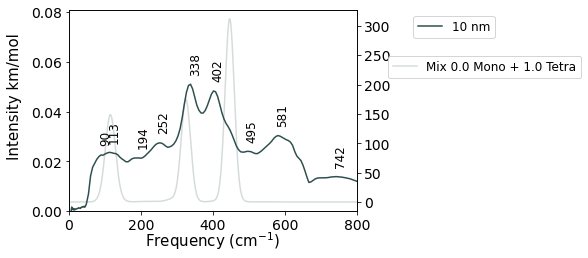

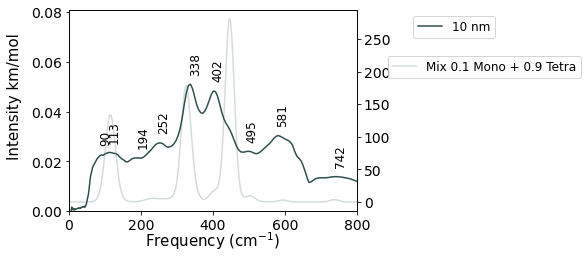

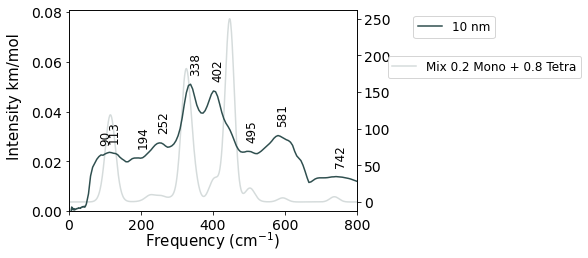

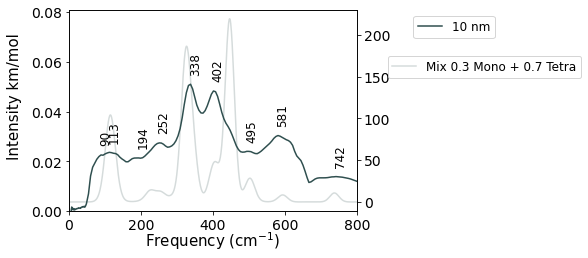

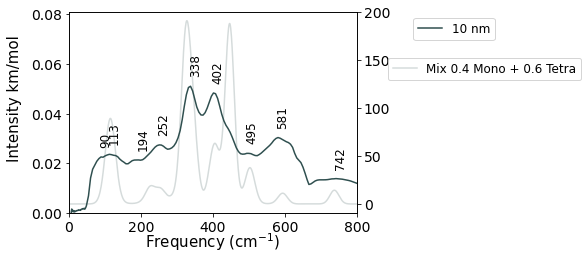

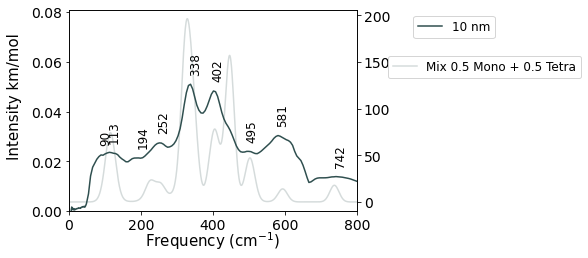

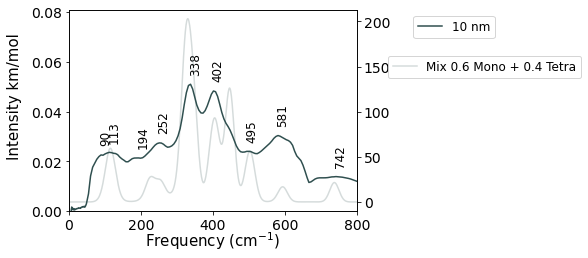

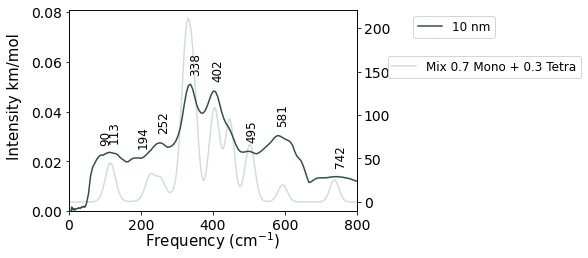

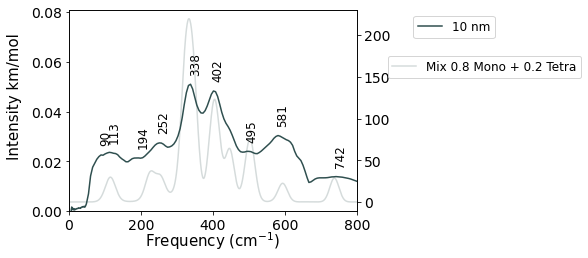

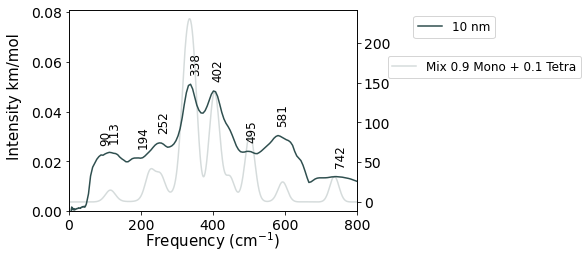

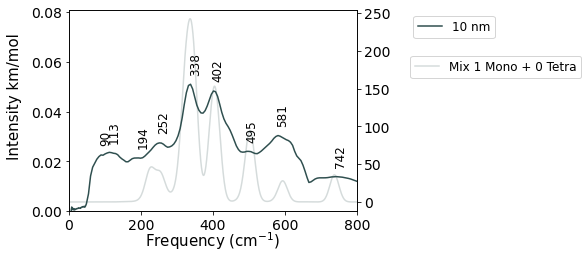

In [32]:
### 10 nm + MIX TETRA MONO : multiple ratios ###

darker = 0.7




for ratio_to_plot in mix_mono14_tetra137:
    fig, ax = plt.subplots(figsize=(5, 4)) 
    
    ax.plot(d_HZO_exp['10'][:, 0], -np.log(d_HZO_exp['10'][:, 1]), c='darkslategray', label='10 nm')
    ax.legend(fontsize=12, bbox_to_anchor=(1.5, 1)) 
    ax.set_ylim(0, max(-np.log(d_HZO_exp['10'][:, 1]))+0.03)
    ax.set_xlim(0, 800)

    ax2=ax.twinx()
    ax2.plot(mix_mono14_tetra137[ratio_to_plot][:, 0], mix_mono14_tetra137[ratio_to_plot][:, 1],
             c='darkslategray', alpha=0.2, label=f'Mix {ratio_to_plot} Mono + {round(1-ratio_to_plot, 1)} Tetra')
    ax2.legend(fontsize=12, bbox_to_anchor=(1.8, 0.8)) 

    put_freq(x=d_HZO_exp['10'][:, 0], 
             Int=-np.log(d_HZO_exp['10'][:, 1]), 
             axis=ax, 
             fontsize=12,
             shift_Int= 0.005, 
             shift_x= -5, 
             rotation=90, 
             width=0.0001,
             threshold=0.005,
    #              distance=0.0001,
             prominence=None,
             height=None)



#     fig.text(0.05, 0.92, 'Mix HZO Mono14 + tetra137 for Different Ratios', fontsize = 15)
    fig.text(0.5, 0, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 15)
    fig.text(-0.05, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 15)




    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.8, 
                        wspace=0.25, 
                        hspace=0.05)


### Mixing Ortho29+Mono DFT spectra

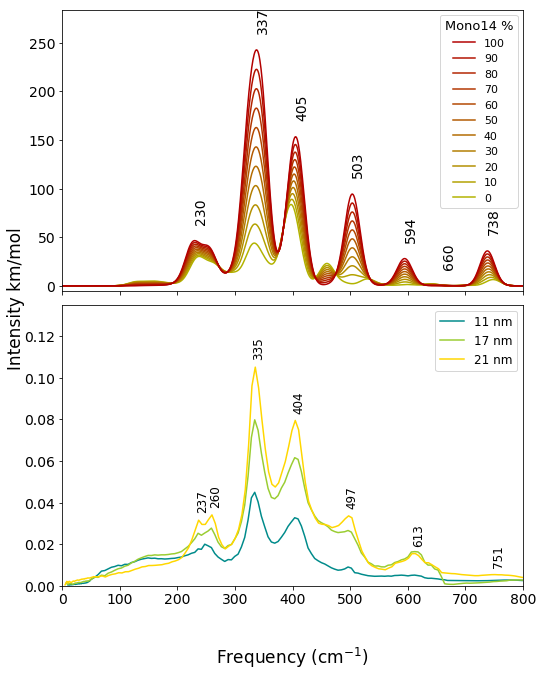

In [337]:
# ratios = np.arange(0, 1.01, 0.01)
ratios = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# ratios = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
# ratios = [0.5, 0.6, 0.7, 0.8]

darker = 0.7

# Intensities already averaged with Boltzmann distribution
ortho29 = Int_Average_HZO_all_FIXDEF[:1149]
mono14 = Int_Average_HZO_all_MONO14_FIXDEF[:1149]

wvn = (wvn_Average_HZO_all_FIXDEF[:1149] + \
       wvn_Average_HZO_all_MONO14_FIXDEF[:1149])/2

colors = plt.cm.autumn_r(np.linspace(0, 1, len(ratios)))

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,10)) 

mix_mono14_ortho29 = {}
for i, j in zip(ratios, colors):
    av = mono14*i + ortho29*(1-i)
    mix_mono14_ortho29[i] = np.concatenate((np.array([wvn]).T, np.array([av]).T), axis=1)
    ax[0].plot(wvn, av, c=adjust_lightness(j, darker), 
         label=round(i*100))
    
ax[0].set_xlim(50, 670)
ax[0].set_ylim(-5, max(ortho29)+200)

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], title='Mono14 %', title_fontsize= 13, fontsize=11)

# put_freq(wvn, ortho29, axis=ax[0], color="black", shift_x=5, shift_Int=20)
put_freq(wvn, mono14, axis=ax[0], color="black", shift_x=-1, shift_Int=20)


### 11, 17, 21 nm ###
ax[1].plot(d_HZO_exp['11'][:, 0], -np.log(d_HZO_exp['11'][:, 1]), c='darkcyan', 
     label='11 nm')
ax[1].plot(d_HZO_exp['17'][:, 0], -np.log(d_HZO_exp['17'][:, 1]), c='yellowgreen', 
     label='17 nm')
ax[1].plot(d_HZO_exp['21'][:, 0], -np.log(d_HZO_exp['21'][:, 1]), c='gold', 
     label='21 nm')
 
ax[1].legend(fontsize=12) #, title='HZO Exp m- and polar o-phase (nm)', title_fontsize=10)
ax[1].set_ylim(0, max(-np.log(d_HZO_exp['21'][:, 1]))+0.03)
ax[1].set_xlim(0, 800)

put_freq(x=d_HZO_exp['21'][:, 0], 
         Int=-np.log(d_HZO_exp['21'][:, 1]), 
         axis=ax[1], 
         fontsize=12,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.005,
#              distance=0.0001,
         prominence=None,
         height=None)



# fig.text(0.15, 0.92, 'Mix HZO Mono14 + Ortho29 for Different Ratios', fontsize = 17)
fig.text(0.5, 0, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.02, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 17)




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.05)


#### 17 nm + MIX ORTHO MONO : multiple ratios ###

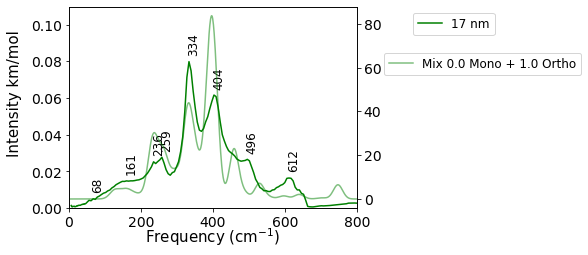

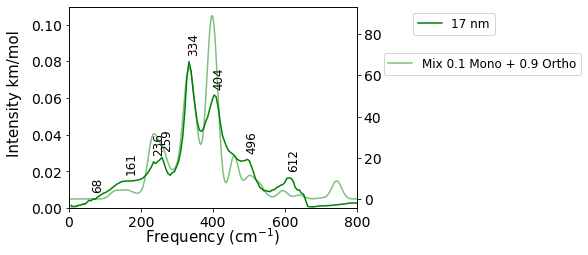

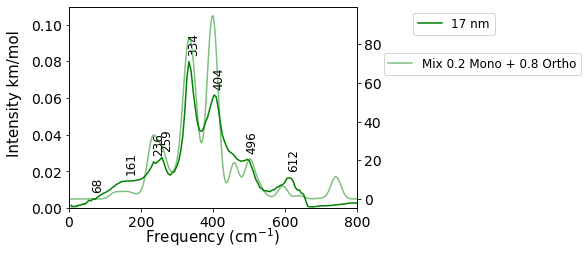

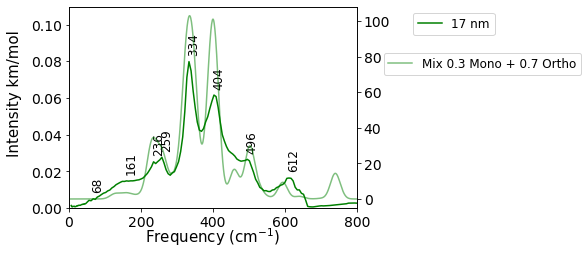

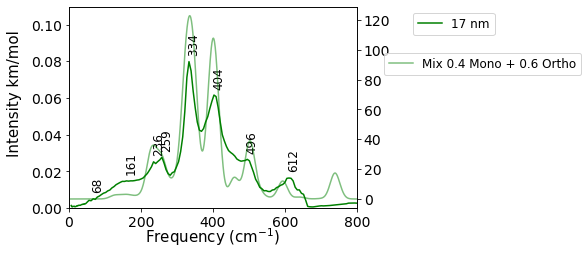

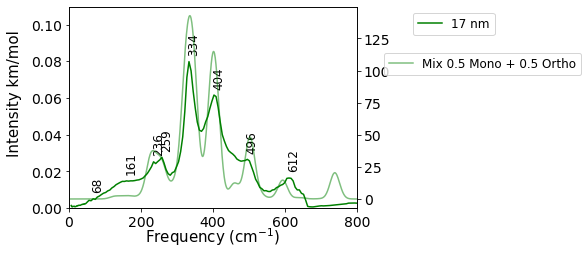

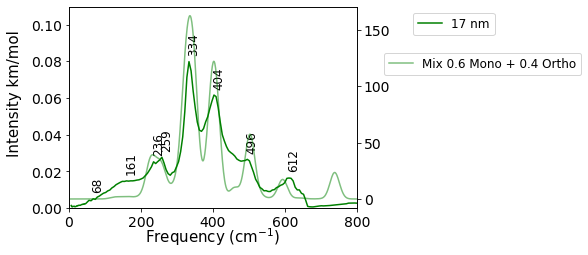

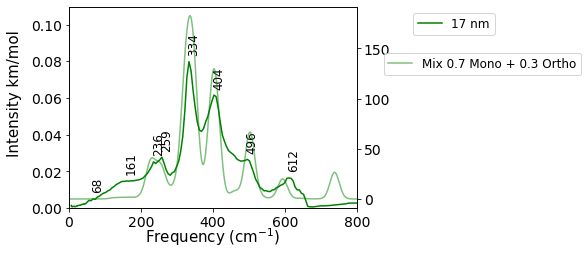

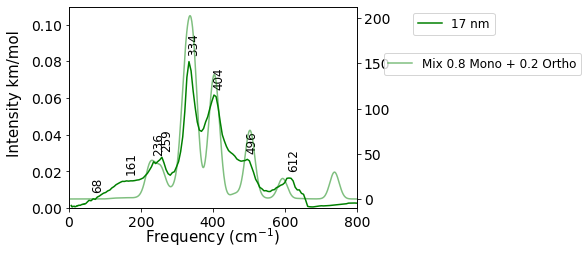

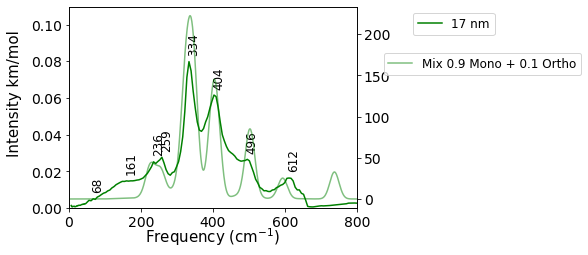

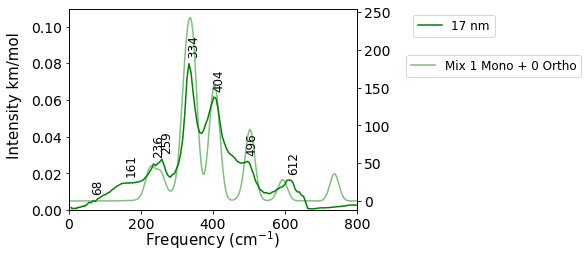

In [77]:
### 17 nm + MIX ORTHO MONO : multiple ratios ###

darker = 0.7




for ratio_to_plot in mix_mono14_ortho29:
    fig, ax = plt.subplots(figsize=(5, 4)) 
    
    ax.plot(d_HZO_exp['17'][:, 0], -np.log(d_HZO_exp['17'][:, 1]), c='green', label='17 nm')
    ax.legend(fontsize=12, bbox_to_anchor=(1.5, 1)) 
    ax.set_ylim(0, max(-np.log(d_HZO_exp['17'][:, 1]))+0.03)
    ax.set_xlim(0, 800)

    ax2=ax.twinx()
    ax2.plot(mix_mono14_ortho29[ratio_to_plot][:, 0], mix_mono14_ortho29[ratio_to_plot][:, 1],
             c='green', alpha=0.5, label=f'Mix {ratio_to_plot} Mono + {round(1-ratio_to_plot, 1)} Ortho')
    ax2.legend(fontsize=12, bbox_to_anchor=(1.8, 0.8)) 

    put_freq(x=d_HZO_exp['17'][:, 0], 
             Int=-np.log(d_HZO_exp['17'][:, 1]), 
             axis=ax, 
             fontsize=12,
             shift_Int= 0.005, 
             shift_x= -5, 
             rotation=90, 
             width=0.0001,
             threshold=0.005,
    #              distance=0.0001,
             prominence=None,
             height=None)



#     fig.text(0.05, 0.92, 'Mix HZO Mono14 + tetra137 for Different Ratios', fontsize = 15)
    fig.text(0.5, 0, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 15)
    fig.text(-0.05, 0.5, 'Intensity km/mol', ha='center', va='center', rotation='vertical', fontsize = 15)




    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.8, 
                        wspace=0.25, 
                        hspace=0.05)


### Making a test with two sets of data in the form of  gaussians

In [38]:
# gaussian function
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [39]:
# Function to calculate Chi-distance
def chi2_distance(A, B):
 
    # compute the chi-squared distance using above formula
    chi = 0.5 * np.sum([((a - b) ** 2) / (a + b)
                      for (a, b) in zip(A, B)])
 
    return chi

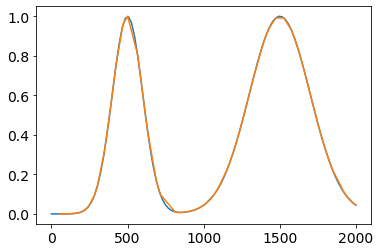

In [87]:
x = np.linspace(1, 2000, 100)
y = gaussian(x, mu=500, sig=100) + gaussian(x, mu=1500, sig=200)

x2 = np.sort(np.random.randint(1, 2000, 100))
y2 = gaussian(x2, mu=500, sig=100) + gaussian(x2, mu=1500, sig=200)

plt.plot(x, y)
plt.plot(x2, y2)

In [88]:
# A and B have same dimension but not the same values
A = np.concatenate((np.array([x]).T, np.array([y]).T), axis=1)
B = np.concatenate((np.array([x2]).T, np.array([y2]).T), axis=1)

In [89]:
# they are essencially the same but the Frechet distance is completely different
frdist(A, B)

53.00000000001827

In [43]:
frdist(A, A)

0.0

In [94]:
# they have different X axis but are essencially the same and the Pearson's r is also not correct
np.corrcoef(A[:, 1], B[:, 1])

array([[1.       , 0.8947132],
       [0.8947132, 1.       ]])

In [45]:
# doesnt matter if I take only the intensities or both axis, I have the same result
chi2_distance(A[:, 1], B[:, 1])

22.346653877906107

In [46]:
chi2_distance(A[:, 1], A[:, 1])

0.0

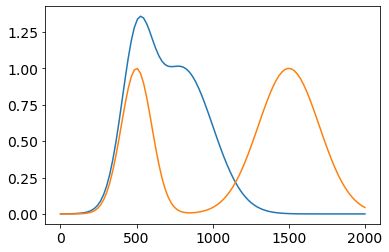

In [90]:
x3 = np.linspace(1, 2000, 100)
y3 = gaussian(x, mu=500, sig=100) + gaussian(x, mu=800, sig=200)

plt.plot(x3, y3)
plt.plot(x, y)

In [91]:
C = np.concatenate((np.array([x3]).T, np.array([y3]).T), axis=1)

In [92]:
# they have the same X axis but are very different
frdist(A, C)

0.9973338738413602

In [93]:
np.corrcoef(A[:, 1], C[:, 1])

array([[1.        , 0.01789756],
       [0.01789756, 1.        ]])

In [51]:
chi2_distance(A[:, 1], C[:, 1])

19.1132673972999

In [52]:
chi2_distance(A, C)

19.113267397299904

### Exploring the correlation metrics between two curves using the different mixes:
-  tetra+mono or ortho+mono 
- correlation metrics: Frechet distance or Pearson's correlation coefficient $r$

##### Frechet Distance

In [53]:
frechet_distance = frdist(mix_mono14_ortho29[0.5], mix_mono14_ortho29[0.5])
frechet_distance

0.0

In [54]:
for key in mix_mono14_ortho29:
    if key+0.1 == 1.1:
        break
    else:
        frechet_distance = frdist(mix_mono14_ortho29[0.5], mix_mono14_ortho29[round(key+0.1, 1)])
        print(frechet_distance)

79.27415833096101
59.55007761781117
39.72364597967599
19.87372380527208
0.0
19.948208963333002
39.89567860377794
59.83970915135762
79.78582889882009
99.73278436158355


In [27]:
# for key in mix_mono14_ortho29:
#     frechet_distance = frdist(mix_mono14_ortho29[key], mix_mono14_ortho29[round(key+0.1, 1)])
#     print(frechet_distance)

##### Pearson's correlation coefficient $r$

https://www.developpez.net/forums/d1559901/general-developpement/algorithme-mathematiques/mathematiques/comparer-courbes/

https://stackoverflow.com/questions/51933785/getting-a-mean-curve-of-several-curves-with-x-values-not-being-the-same

In [55]:
# checking if the two x (wvn) axis are really the same values (should be) - they are
np.argwhere((mix_mono14_ortho29[0.5][:, 0] == mix_mono14_ortho29[0.6][:, 0]) == False)

array([], shape=(0, 1), dtype=int64)

In [56]:
# checking r for two mixes 
np.corrcoef(mix_mono14_ortho29[0.5][:, 1], mix_mono14_ortho29[0.9][:, 1])

array([[1.        , 0.98891019],
       [0.98891019, 1.        ]])

In [57]:
# checking r for two extremes (full mono et ortho) - r is quite different (it is what we expected)
np.corrcoef(mix_mono14_ortho29[0.0][:, 1], mix_mono14_ortho29[0.9][:, 1])

array([[1.        , 0.75855222],
       [0.75855222, 1.        ]])

In [58]:
# conclusion: the r coef seemes to work and compare curves in the expected way
for key in mix_mono14_ortho29:
    if key+0.1 == 1.1:
        break
    else:
        r = np.corrcoef(mix_mono14_ortho29[0.5][:, 1], mix_mono14_ortho29[round(key+0.1, 1)][:, 1])
        print(f'\n\n0.5 compared to {round(key+0.1, 1)}\n', r, r[0, 1], r[1, 0])



0.5 compared to 0.1
 [[1.         0.92896486]
 [0.92896486 1.        ]] 0.9289648632963355 0.9289648632963355


0.5 compared to 0.2
 [[1.         0.97067214]
 [0.97067214 1.        ]] 0.9706721375968237 0.9706721375968237


0.5 compared to 0.3
 [[1.         0.99020939]
 [0.99020939 1.        ]] 0.9902093875610976 0.9902093875610974


0.5 compared to 0.4
 [[1.         0.99811463]
 [0.99811463 1.        ]] 0.9981146340608303 0.9981146340608305


0.5 compared to 0.5
 [[1. 1.]
 [1. 1.]] 1.0 1.0


0.5 compared to 0.6
 [[1.         0.99880199]
 [0.99880199 1.        ]] 0.9988019935409085 0.9988019935409084


0.5 compared to 0.7
 [[1.         0.99606763]
 [0.99606763 1.        ]] 0.9960676298429032 0.9960676298429032


0.5 compared to 0.8
 [[1.         0.99262224]
 [0.99262224 1.        ]] 0.9926222390325378 0.9926222390325377


0.5 compared to 0.9
 [[1.         0.98891019]
 [0.98891019 1.        ]] 0.9889101911209165 0.9889101911209166


0.5 compared to 1.0
 [[1.         0.98517063]
 [0.98

In [59]:
# checking r for 0.0 (ortho) compared to all other mixes: makes sense, r decreases with more mono
for key in mix_mono14_ortho29:
    if key+0.1 == 1.1:
        break
    else:
        r = np.corrcoef(mix_mono14_ortho29[0.0][:, 1], mix_mono14_ortho29[round(key+0.1, 1)][:, 1])
        print(f'\n\n0.0 compared to {round(key+0.1, 1)}\n', r, r[0, 1], r[1, 0])



0.0 compared to 0.1
 [[1.         0.98358271]
 [0.98358271 1.        ]] 0.9835827103724815 0.9835827103724816


0.0 compared to 0.2
 [[1.         0.94990753]
 [0.94990753 1.        ]] 0.9499075271146552 0.9499075271146552


0.0 compared to 0.3
 [[1.         0.91284641]
 [0.91284641 1.        ]] 0.9128464129793554 0.9128464129793553


0.0 compared to 0.4
 [[1.         0.87795347]
 [0.87795347 1.        ]] 0.8779534713099709 0.8779534713099708


0.0 compared to 0.5
 [[1.         0.84691406]
 [0.84691406 1.        ]] 0.8469140559739945 0.8469140559739945


0.0 compared to 0.6
 [[1.         0.81987956]
 [0.81987956 1.        ]] 0.819879556739048 0.819879556739048


0.0 compared to 0.7
 [[1.         0.79647447]
 [0.79647447 1.        ]] 0.7964744662102083 0.7964744662102083


0.0 compared to 0.8
 [[1.         0.77619452]
 [0.77619452 1.        ]] 0.7761945228699524 0.7761945228699524


0.0 compared to 0.9
 [[1.         0.75855222]
 [0.75855222 1.        ]] 0.7585522171757475 0.75855221717

### Comparing the Theoretical (Theo) curves with the Experimental (Exp) curves

### mix_mono14_ortho29 comparison with Exp

#### Using a Frechet distance metric

https://pypi.org/project/frechetdist/#:~:text=The%20discrete%20Fr%C3%A9chet%20distance%20may,This%20is%20a%20Python%203.

https://en.wikipedia.org/wiki/Fr%C3%A9chet_distance#:~:text=In%20mathematics%2C%20the%20Fr%C3%A9chet%20distance,the%20points%20along%20the%20curves.

##### Preparing the data
- putting theo and exp in the same shape
- normalizing to one ( check with Jerome if this makes sense)

In [60]:
np.intersect1d(d_HZO_exp['11'][:, 0], mix_mono14_ortho29[0.5][:, 0]) # no values in common betwen theo et exp

array([], dtype=float64)

For sure I need to interpolate the two curves to change the shape of the Exp data so it has the same shape as the Theo
https://stackoverflow.com/questions/55688856/python-how-interpolate-two-measurements-such-that-the-x-values-are-the-same

In [61]:
import scipy.interpolate as interp
import numpy as np

x1 = d_HZO_exp['11'][:, 0]
y1 = d_HZO_exp['11'][:, 1]

new_x1 = mix_mono14_ortho29[0.5][:, 0]

interpolated_1 = interp.interp1d(x1, y1, fill_value="extrapolate")
new_y1 = interpolated_1(new_x1)
new_y1

array([0.99920171, 0.99924002, 0.99927832, ..., 0.99931752, 0.99932067,
       0.99932381])

(1149,)
(1149,)


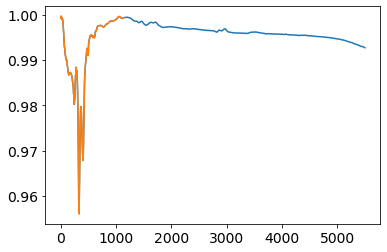

In [62]:
# it works!
plt.plot(x1, y1)
plt.plot(new_x1, new_y1)
print(new_x1.shape)
print(mix_mono14_ortho29[0.5][:, 0].shape)

In [191]:
# saving the interpolated Exp data into a new dic, already normalized to 1
d_HZO_exp_interpol = {}
for key in d_HZO_exp:
    x1 = d_HZO_exp[key][:, 0] # define the old axis x
    y1 = -np.log(d_HZO_exp[key][:, 1]) # define the old axis y

    new_x1 = mix_mono14_ortho29[0.5][:, 0] # I use the 0.5 as all theo have the same x axis

    interpolated_1 = interp.interp1d(x1, y1, fill_value="extrapolate")
    new_y1 = interpolated_1(new_x1)

    absorbance_norm = new_y1/np.max(new_y1)

    d_HZO_exp_interpol[key] = np.concatenate((np.array([new_x1]).T, np.array([absorbance_norm]).T), axis=1)

In [192]:
# checking if they all have the same shape - yes
for key_exp, key_theo in zip(d_HZO_exp_interpol, mix_mono14_ortho29):
    print(key_exp, d_HZO_exp_interpol[key_exp].shape)
    print(key_theo, mix_mono14_ortho29[key_theo].shape)

10 (1149, 2)
0.0 (1149, 2)
11 (1149, 2)
0.01 (1149, 2)
17 (1149, 2)
0.02 (1149, 2)
21 (1149, 2)
0.03 (1149, 2)
52 (1149, 2)
0.04 (1149, 2)


#### Normalizing the data using a Scale factor
- I take the maximum intensity of the spectrum with highest itnensity (100% mono)
- This way I keep the same profile as the original

In [313]:
# saving the interpolated Exp data into a new dic, already normalized to 1
d_HZO_exp_interpol = {}
for key in d_HZO_exp:
    x1 = d_HZO_exp[key][:, 0] # define the old axis x
    y1 = -np.log(d_HZO_exp[key][:, 1]) # define the old axis y

    new_x1 = mix_mono14_ortho29[0.5][:, 0] # I use the 0.5 as all theo have the same x axis

    interpolated_1 = interp.interp1d(x1, y1, fill_value="extrapolate")
    new_y1 = interpolated_1(new_x1)

    absorbance_norm = new_y1/np.max(-np.log(d_HZO_exp['52'][:, 1]))

    d_HZO_exp_interpol[key] = np.concatenate((np.array([new_x1]).T, np.array([absorbance_norm]).T), axis=1)

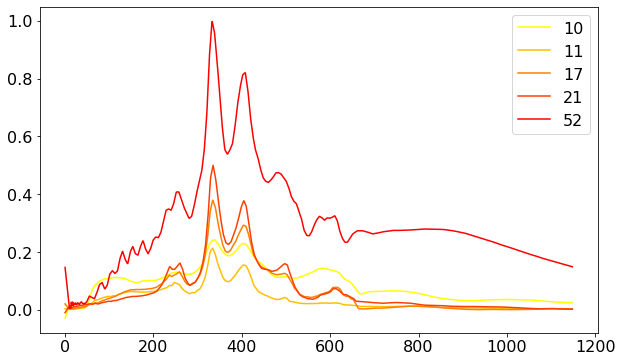

In [314]:
colors = plt.cm.autumn_r(np.linspace(0, 1, len(d_HZO_exp_interpol)))

fig, ax = plt.subplots(figsize=(10,6)) 

for key, color in zip(d_HZO_exp_interpol, colors):
    ax.plot(d_HZO_exp_interpol[key][:, 0], d_HZO_exp_interpol[key][:, 1], c=color, label=key)
    ax.legend()

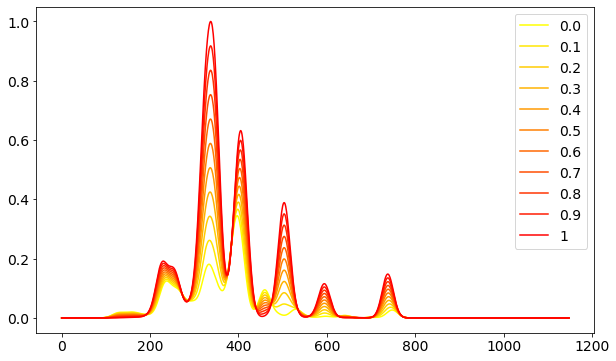

In [344]:
# normalizing the theo data - scale factor
mix_mono14_ortho29_norm_scale_factor = {}
for key in mix_mono14_ortho29:

    intensity_norm = mix_mono14_ortho29[key][:, 1]/np.max(mix_mono14_ortho29[1.0][:, 1])
    
    mix_mono14_ortho29_norm_scale_factor[key] = np.concatenate((np.array([mix_mono14_ortho29[key][:, 0]]).T, 
                                                        np.array([intensity_norm]).T), 
                                                        axis=1)
    
colors = plt.cm.autumn_r(np.linspace(0, 1, len(ratios)))

fig, ax = plt.subplots(figsize=(10,6)) 

for key, color in zip(mix_mono14_ortho29_norm_scale_factor, colors):
    ax.plot(mix_mono14_ortho29_norm_scale_factor[key][:, 0], mix_mono14_ortho29_norm_scale_factor[key][:, 1], c=color, label=key)
    ax.legend()

#### Pearson's correlation coeficient
- appearently is only for linear (?) coreelations
- values do not seem to change when I change the data (the intensities for ex.) which is weird

In [297]:
# Evaluating the r coef for Theo vs Exp
r_dic = {}
for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        r = np.corrcoef(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], d_HZO_exp_interpol[key_exp][:, 1])
        
        r_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = r[0, 1]
        
#         print(key_theo, key_exp, r, r[0, 1], r[1, 0])
# sorted(r_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in r_dic.items() if str(key_exp+'nm') in a.lower()], key=lambda x:x[1], reverse=True))
    print('\n')

[('20% Mono 10nm', 0.7973843690013263),
 ('30% Mono 10nm', 0.7934280588628609),
 ('10% Mono 10nm', 0.7896486083014944),
 ('40% Mono 10nm', 0.7847419293307761),
 ('50% Mono 10nm', 0.7745806464726933),
 ('60% Mono 10nm', 0.76438707863705),
 ('0% Mono 10nm', 0.756684996280428),
 ('70% Mono 10nm', 0.7547592417783248),
 ('80% Mono 10nm', 0.7459079481613765),
 ('90% Mono 10nm', 0.737869782485296),
 ('100% Mono 10nm', 0.730606325540754)]


[('20% Mono 11nm', 0.9073322416675835),
 ('30% Mono 11nm', 0.9053885403154266),
 ('40% Mono 11nm', 0.8974457964880805),
 ('10% Mono 11nm', 0.8951379807724451),
 ('50% Mono 11nm', 0.8873807835140336),
 ('60% Mono 11nm', 0.876959278217878),
 ('70% Mono 11nm', 0.866947787895987),
 ('80% Mono 11nm', 0.8576459306875801),
 ('0% Mono 11nm', 0.853225422079659),
 ('90% Mono 11nm', 0.849137335285109),
 ('100% Mono 11nm', 0.8414083181067683)]


[('30% Mono 17nm', 0.9231105229139289),
 ('20% Mono 17nm', 0.922839691452407),
 ('40% Mono 17nm', 0.9167375976145183),
 ('50%

Text(430.0, 0.5, 'THEO')

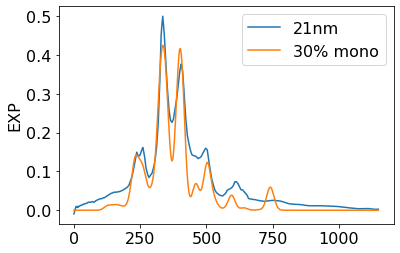

In [298]:
fig, ax = plt.subplots()
ax.plot(d_HZO_exp_interpol['21'][:, 0], d_HZO_exp_interpol['21'][:, 1], label="21nm")
# ax2 = ax.twinx()
ax.plot(mix_mono14_ortho29_norm_scale_factor[0.3][:, 0], mix_mono14_ortho29_norm_scale_factor[0.3][:, 1], label="30% mono")

ax.legend()
# ax2.legend(loc='upper left')

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

Text(430.0, 0.5, 'THEO')

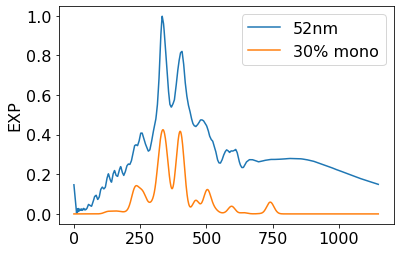

In [299]:
# I dont understand how this can have a highest correlation than the 70% which has the intensities much closer???

fig, ax = plt.subplots()
ax.plot(d_HZO_exp_interpol['52'][:, 0], d_HZO_exp_interpol['52'][:, 1], label="52nm")
# ax2 = ax.twinx()
ax.plot(mix_mono14_ortho29_norm_scale_factor[0.3][:, 0], mix_mono14_ortho29_norm_scale_factor[0.3][:, 1], label="30% mono")

ax.legend()
# ax2.legend(loc='upper left')

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

Text(430.0, 0.5, 'THEO')

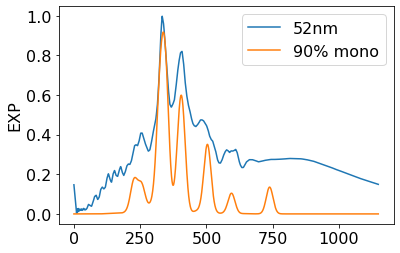

In [300]:
fig, ax = plt.subplots()
ax.plot(d_HZO_exp_interpol['52'][:, 0], d_HZO_exp_interpol['52'][:, 1], label="52nm")
# ax2 = ax.twinx()
ax.plot(mix_mono14_ortho29_norm_scale_factor[0.9][:, 0], mix_mono14_ortho29_norm_scale_factor[0.9][:, 1], label="90% mono")

ax.legend()
# ax2.legend(loc='upper left')

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

#### Chi-squared
- gives results which do not make any sense

In [305]:
# Evaluating the chi squared for Theo vs Exp
chi2_distance_dic = {}
for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        chi_value = chi2_distance(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], d_HZO_exp_interpol[key_exp][:, 1])
        
        chi2_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = chi_value

        
# sorted(chi2_distance_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in chi2_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=True))
    print('\n')

[('100% Mono 10nm', 34.909956960916354),
 ('90% Mono 10nm', 32.535024289451314),
 ('80% Mono 10nm', 30.348771552718716),
 ('70% Mono 10nm', 28.375577241655566),
 ('60% Mono 10nm', 26.649147314347175),
 ('0% Mono 10nm', 26.434735649189708),
 ('50% Mono 10nm', 25.216261322939857),
 ('10% Mono 10nm', 24.338767843910787),
 ('40% Mono 10nm', 24.143024238195252),
 ('30% Mono 10nm', 23.525775386868887),
 ('20% Mono 10nm', 23.511404641546875)]


[('100% Mono 11nm', 28.56195749003258),
 ('90% Mono 11nm', 25.31451190346371),
 ('80% Mono 11nm', 22.199632939558),
 ('70% Mono 11nm', 19.218306004096824),
 ('60% Mono 11nm', 16.38215397560902),
 ('50% Mono 11nm', 13.714420913419529),
 ('40% Mono 11nm', 11.254214395611147),
 ('30% Mono 11nm', 9.066121312766223),
 ('20% Mono 11nm', 7.261918782279962),
 ('10% Mono 11nm', 6.057693555948586),
 ('0% Mono 11nm', 5.988081768845478)]


[('100% Mono 17nm', 19.597186723097497),
 ('90% Mono 17nm', 17.10419095817683),
 ('80% Mono 17nm', 14.805844764041726),
 ('70%

#### Coef of determination $R^2$: best results!
- gives increasing percentage of mono as thickness increase!

In [319]:
from sklearn.metrics import r2_score

# Evaluating the r2 for Theo vs Exp
r2_distance_dic = {}
for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        r2_value = r2_score(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], d_HZO_exp_interpol[key_exp][:, 1])
        
        r2_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = r2_value

        
# sorted(r22_distance_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in r2_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=True))
    print('\n')

[('47% Mono 10nm', 0.45959302769042),
 ('48% Mono 10nm', 0.45955432282799114),
 ('46% Mono 10nm', 0.4594231696301059),
 ('49% Mono 10nm', 0.4593210708936243),
 ('45% Mono 10nm', 0.45902981147152055),
 ('50% Mono 10nm', 0.4589064227984886),
 ('44% Mono 10nm', 0.45839703490949535),
 ('51% Mono 10nm', 0.4583227176252864),
 ('52% Mono 10nm', 0.4575815326145085),
 ('43% Mono 10nm', 0.45750787714433916),
 ('53% Mono 10nm', 0.4566937301757312),
 ('42% Mono 10nm', 0.4563442638258971),
 ('54% Mono 10nm', 0.45566950207311285),
 ('41% Mono 10nm', 0.45488693818846293),
 ('55% Mono 10nm', 0.454518410932089),
 ('56% Mono 10nm', 0.4532494292110335),
 ('40% Mono 10nm', 0.4531153862762749),
 ('57% Mono 10nm', 0.45187097577760216),
 ('39% Mono 10nm', 0.4510077581828893),
 ('58% Mono 10nm', 0.4503909502248289),
 ('59% Mono 10nm', 0.44881676505694756),
 ('38% Mono 10nm', 0.4485407852581853),
 ('60% Mono 10nm', 0.4471553758695479),
 ('37% Mono 10nm', 0.44568969327538277),
 ('61% Mono 10nm', 0.4454133096431

Text(430.0, 0.5, 'THEO')

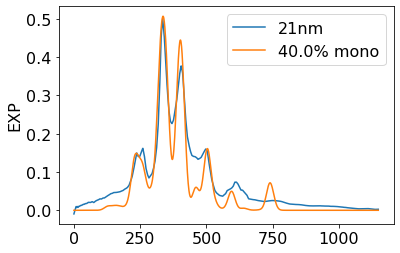

In [302]:
fig, ax = plt.subplots()
thickness = '21'
ax.plot(d_HZO_exp_interpol[thickness][:, 0], d_HZO_exp_interpol[thickness][:, 1], label=f"{thickness}nm")
# ax2 = ax.twinx()
key = 0.4
ax.plot(mix_mono14_ortho29_norm_scale_factor[key][:, 0], 
        mix_mono14_ortho29_norm_scale_factor[key][:, 1], 
        label=f"{key*100}% mono")

ax.legend()
# ax2.legend(loc='upper left')

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

Text(430.0, 0.5, 'THEO')

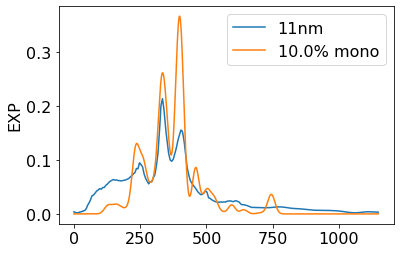

In [303]:
fig, ax = plt.subplots()
thickness = '11'
ax.plot(d_HZO_exp_interpol[thickness][:, 0], d_HZO_exp_interpol[thickness][:, 1], label=f"{thickness}nm")
# ax2 = ax.twinx()
key = 0.1
ax.plot(mix_mono14_ortho29_norm_scale_factor[key][:, 0], 
        mix_mono14_ortho29_norm_scale_factor[key][:, 1], 
        label=f"{key*100}% mono")

ax.legend()
# ax2.legend(loc='upper left')

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

Text(430.0, 0.5, 'THEO')

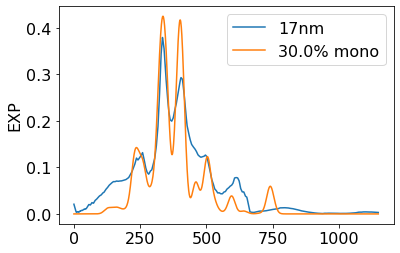

In [304]:
fig, ax = plt.subplots()
thickness = '17'
ax.plot(d_HZO_exp_interpol[thickness][:, 0], d_HZO_exp_interpol[thickness][:, 1], label=f"{thickness}nm")
# ax2 = ax.twinx()
key = 0.3
ax.plot(mix_mono14_ortho29_norm_scale_factor[key][:, 0], 
        mix_mono14_ortho29_norm_scale_factor[key][:, 1], 
        label=f"{key*100}% mono")

ax.legend()
# ax2.legend(loc='upper left')

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

In [320]:
from sklearn.metrics import mean_absolute_error

# Evaluating the MAE for Theo vs Exp
MAE_distance_dic = {}
for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        MAE_value = mean_absolute_error(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], d_HZO_exp_interpol[key_exp][:, 1])
        
        MAE_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = MAE_value

        
# sorted(MAE2_distance_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in MAE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')

[('15% Mono 10nm', 0.057637893786896856),
 ('16% Mono 10nm', 0.05764607869895441),
 ('14% Mono 10nm', 0.057648825212086974),
 ('17% Mono 10nm', 0.05767166430411769),
 ('13% Mono 10nm', 0.0576814639592838),
 ('18% Mono 10nm', 0.057717773624875075),
 ('12% Mono 10nm', 0.057748928208025),
 ('19% Mono 10nm', 0.05777680958509504),
 ('20% Mono 10nm', 0.057845615608786184),
 ('11% Mono 10nm', 0.057849263119237895),
 ('21% Mono 10nm', 0.057925485571035946),
 ('10% Mono 10nm', 0.05799239473845915),
 ('22% Mono 10nm', 0.05801977384252474),
 ('23% Mono 10nm', 0.058121222848105565),
 ('9% Mono 10nm', 0.05818521322957287),
 ('24% Mono 10nm', 0.0582311839318024),
 ('25% Mono 10nm', 0.058348558776432455),
 ('8% Mono 10nm', 0.05845645414124991),
 ('26% Mono 10nm', 0.058473513701974955),
 ('27% Mono 10nm', 0.05860911103746488),
 ('28% Mono 10nm', 0.058755165186300175),
 ('7% Mono 10nm', 0.058844413516109896),
 ('29% Mono 10nm', 0.05895045269488939),
 ('30% Mono 10nm', 0.05916988288903333),
 ('6% Mono 1

In [308]:
from sklearn.metrics import mean_squared_error

# Evaluating the MSE for Theo vs Exp
MSE_distance_dic = {}
for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        MSE_value = mean_squared_error(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], d_HZO_exp_interpol[key_exp][:, 1])
        
        MSE_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = MSE_value

        
# sorted(MSE2_distance_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in MSE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')

[('10% Mono 10nm', 0.004560529609452147),
 ('20% Mono 10nm', 0.004569250291264096),
 ('0% Mono 10nm', 0.00506631994564099),
 ('30% Mono 10nm', 0.005092481991076837),
 ('40% Mono 10nm', 0.006130224708890372),
 ('50% Mono 10nm', 0.007682478444704698),
 ('60% Mono 10nm', 0.009749243198519816),
 ('70% Mono 10nm', 0.012330518970335727),
 ('80% Mono 10nm', 0.015426305760152434),
 ('90% Mono 10nm', 0.01903660356796992),
 ('100% Mono 10nm', 0.023161412393788213)]


[('0% Mono 11nm', 0.0011443028899599946),
 ('10% Mono 11nm', 0.001413541999637567),
 ('20% Mono 11nm', 0.002197292127315932),
 ('30% Mono 11nm', 0.0034955532729950885),
 ('40% Mono 11nm', 0.005308325436675038),
 ('50% Mono 11nm', 0.007635608618355781),
 ('60% Mono 11nm', 0.010477402818037313),
 ('70% Mono 11nm', 0.013833708035719636),
 ('80% Mono 11nm', 0.01770452427140276),
 ('90% Mono 11nm', 0.022089851525086666),
 ('100% Mono 11nm', 0.026989689796771372)]


[('20% Mono 17nm', 0.0013536979817943679),
 ('30% Mono 17nm', 0.001490413

In [310]:
from sklearn.metrics import mean_squared_error

# Evaluating the RMSE for Theo vs Exp
RMSE_distance_dic = {}
for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        RMSE_value = np.sqrt(mean_squared_error(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], 
                                             d_HZO_exp_interpol[key_exp][:, 1]))
        
        RMSE_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = RMSE_value

        
# sorted(RMSE2_distance_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in RMSE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')

[('10% Mono 10nm', 0.06753169337024022),
 ('20% Mono 10nm', 0.0675962298598383),
 ('0% Mono 10nm', 0.07117808613359164),
 ('30% Mono 10nm', 0.07136162828212958),
 ('40% Mono 10nm', 0.07829575153793705),
 ('50% Mono 10nm', 0.08764974868591865),
 ('60% Mono 10nm', 0.09873825600302963),
 ('70% Mono 10nm', 0.11104286996622398),
 ('80% Mono 10nm', 0.12420268016493216),
 ('90% Mono 10nm', 0.137973198730659),
 ('100% Mono 10nm', 0.15218873937906252)]


[('0% Mono 11nm', 0.03382754631893946),
 ('10% Mono 11nm', 0.03759710094724814),
 ('20% Mono 11nm', 0.04687528269051753),
 ('30% Mono 11nm', 0.059123204184102614),
 ('40% Mono 11nm', 0.0728582557894096),
 ('50% Mono 11nm', 0.0873819696410866),
 ('60% Mono 11nm', 0.1023591853134701),
 ('70% Mono 11nm', 0.11761678466834415),
 ('80% Mono 11nm', 0.13305834912324277),
 ('90% Mono 11nm', 0.1486265505388814),
 ('100% Mono 11nm', 0.16428539130662645)]


[('20% Mono 17nm', 0.036792634885182765),
 ('30% Mono 17nm', 0.038605874206105235),
 ('10% Mono 17nm

#### Testing other normalizations:
- normalizing to 1 (dividing each spectrum by its maximum)
- normalizing to the sum of all intensities 

- **conclusion**: both methods change the original profile and result in a bad quantification of phases for the 52nm sample

In [211]:
# normalizing the theo data
mix_mono14_ortho29_norm = {}
for key in mix_mono14_ortho29:

    intensity_norm = mix_mono14_ortho29[key][:, 1]/np.max(mix_mono14_ortho29[key][:, 1])

    mix_mono14_ortho29_norm[key] = np.concatenate((np.array([mix_mono14_ortho29[key][:, 0]]).T, np.array([intensity_norm]).T), axis=1)

In [194]:
# Evaluating the r coef for Theo vs Exp
r_dic = {}
for key_theo in mix_mono14_ortho29_norm:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        r = np.corrcoef(mix_mono14_ortho29_norm[key_theo][:, 1], d_HZO_exp_interpol[key_exp][:, 1])
        
        r_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = r[0, 1]
        
#         print(key_theo, key_exp, r, r[0, 1], r[1, 0])
sorted(r_dic.items(), key=lambda x:x[1], reverse=True)

[('30% Mono 21nm', 0.9584348454214151),
 ('29% Mono 21nm', 0.9584083771471812),
 ('31% Mono 21nm', 0.9583851448726545),
 ('28% Mono 21nm', 0.9582993935798724),
 ('32% Mono 21nm', 0.9582651852532732),
 ('27% Mono 21nm', 0.9581010816191113),
 ('33% Mono 21nm', 0.958080467954684),
 ('34% Mono 21nm', 0.9578361128202876),
 ('26% Mono 21nm', 0.9578061300729421),
 ('35% Mono 21nm', 0.957536883441673),
 ('25% Mono 21nm', 0.9574066966788632),
 ('36% Mono 21nm', 0.9571872109767686),
 ('24% Mono 21nm', 0.9568943736678514),
 ('37% Mono 21nm', 0.9567912165373668),
 ('38% Mono 21nm', 0.9563527321998095),
 ('23% Mono 21nm', 0.956260151968096),
 ('39% Mono 21nm', 0.955875320696993),
 ('22% Mono 21nm', 0.9554943841889249),
 ('40% Mono 21nm', 0.955362293852628),
 ('41% Mono 21nm', 0.9548167298201543),
 ('21% Mono 21nm', 0.9545867465777496),
 ('42% Mono 21nm', 0.9542414891891108),
 ('43% Mono 21nm', 0.9536392300213525),
 ('20% Mono 21nm', 0.9535262002051439),
 ('44% Mono 21nm', 0.9530124218784478),
 ('45

Using 10% mix

[('30% Mono 21nm', 0.9584348454214151),

 ('40% Mono 21nm', 0.955362293852628),
 
 ('20% Mono 21nm', 0.9535262002051439),
 
 ('50% Mono 21nm', 0.9488537040911662),
 
 ('60% Mono 21nm', 0.941101587030919),
 
 ('70% Mono 21nm', 0.9331452566666701),
 
 ('10% Mono 21nm', 0.9314942947680509),
 
 ('80% Mono 21nm', 0.9254619134545049),
 
 ('30% Mono 17nm', 0.9231105229139285),
 
 ('20% Mono 17nm', 0.9228396914524073),
 
 ('90% Mono 21nm', 0.9182535707078225),
 
 ('40% Mono 17nm', 0.9167375976145181),
 
 ('100% Mono 21nm', 0.9115874583232072),
 
 ('50% Mono 17nm', 0.907816252730124),
 
 ('10% Mono 17nm', 0.9074566941317187),
 
 ('20% Mono 11nm', 0.9073322416675837),
 
 ('30% Mono 11nm', 0.9053885403154266),
 
 ('60% Mono 17nm', 0.8982513624400587),
 
 ('40% Mono 11nm', 0.8974457964880809),
 
 ('10% Mono 11nm', 0.8951379807724454),
 
 ('70% Mono 17nm', 0.8888981298001857),
 
 ('30% Mono 52nm', 0.8887731878997167),
 
 ('40% Mono 52nm', 0.8879600796211197),
 
 ('50% Mono 11nm', 0.8873807835140334),
 
 ('50% Mono 52nm', 0.883506772117338),
 
 ('20% Mono 52nm', 0.8815629069169393),
 
 ('80% Mono 17nm', 0.8801137837692736),
 
 ('60% Mono 52nm', 0.8775697860101384),
 
 ('60% Mono 11nm', 0.8769592782178777),
 
 ('0% Mono 21nm', 0.8754814348816684),
 
 ('90% Mono 17nm', 0.8720202861061486),
 
 ('70% Mono 52nm', 0.8711998639408266),
 
 ('70% Mono 11nm', 0.8669477878959869),
 
 ('80% Mono 52nm', 0.86490059098653),
 
 ('100% Mono 17nm', 0.8646301085713831),
 
 ('0% Mono 17nm', 0.8609583593824621),
 
 ('90% Mono 52nm', 0.8589026049859413),
 
 ('10% Mono 52nm', 0.8576508044736357),
 
 ('80% Mono 11nm', 0.8576459306875808),
 
 ('100% Mono 52nm', 0.8532994330414202),
 
 ('0% Mono 11nm', 0.8532254220796588),
 
 ('90% Mono 11nm', 0.8491373352851088),
 
 ('100% Mono 11nm', 0.8414083181067684),
 
 ('0% Mono 52nm', 0.8012653459396561),
 
 ('20% Mono 10nm', 0.7973843690013264),
 
 ('30% Mono 10nm', 0.7934280588628608),
 
 ('10% Mono 10nm', 0.7896486083014942),
 
 ('40% Mono 10nm', 0.784741929330776),
 
 ('50% Mono 10nm', 0.7745806464726935),
 
 ('60% Mono 10nm', 0.7643870786370505),
 
 ('0% Mono 10nm', 0.7566849962804288),
 
 ('70% Mono 10nm', 0.7547592417783248),
 
 ('80% Mono 10nm', 0.7459079481613771),
 
 ('90% Mono 10nm', 0.7378697824852959),
 
 ('100% Mono 10nm', 0.7306063255407541)]

Text(0, 0.5, 'THEO')

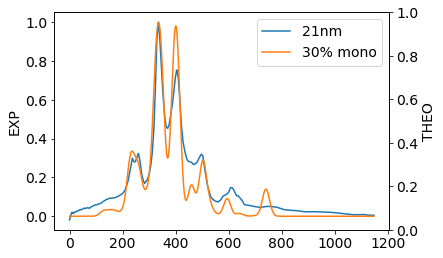

In [67]:
fig, ax = plt.subplots()
ax.plot(d_HZO_exp_interpol['21'][:, 0], d_HZO_exp_interpol['21'][:, 1], label="21nm")
ax2 = ax.twinx()
ax.plot(mix_mono14_ortho29_norm[0.3][:, 0], mix_mono14_ortho29_norm[0.3][:, 1], label="30% mono")
ax.legend()

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

Text(0, 0.5, 'THEO')

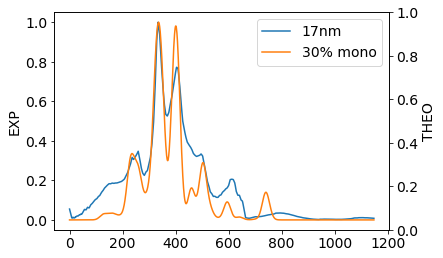

In [68]:
fig, ax = plt.subplots()
ax.plot(d_HZO_exp_interpol['17'][:, 0], d_HZO_exp_interpol['17'][:, 1], label="17nm")
ax2 = ax.twinx()
ax.plot(mix_mono14_ortho29_norm[0.3][:, 0], mix_mono14_ortho29_norm[0.3][:, 1], label="30% mono")
ax.legend()

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

Text(0, 0.5, 'THEO')

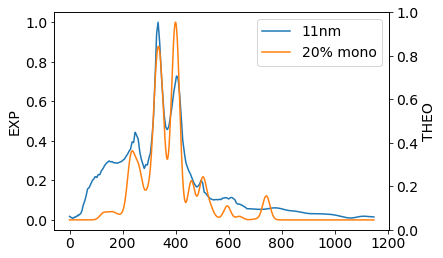

In [69]:
fig, ax = plt.subplots()
ax.plot(d_HZO_exp_interpol['11'][:, 0], d_HZO_exp_interpol['11'][:, 1], label="11nm")
ax2 = ax.twinx()
ax.plot(mix_mono14_ortho29_norm[0.2][:, 0], mix_mono14_ortho29_norm[0.2][:, 1], label="20% mono")
ax.legend()

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

Text(0, 0.5, 'THEO')

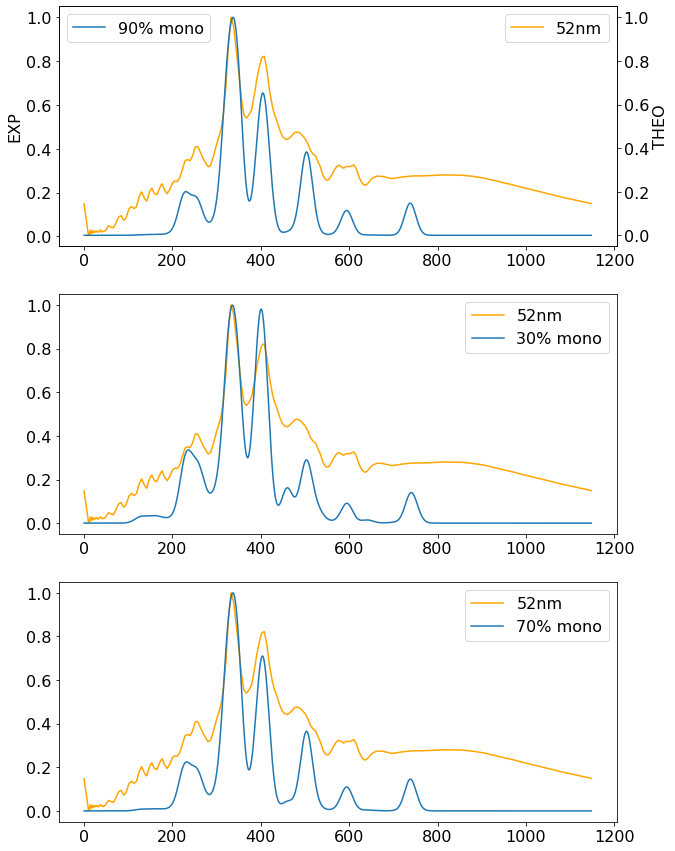

In [217]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
ax[0].plot(d_HZO_exp_interpol['52'][:, 0], d_HZO_exp_interpol['52'][:, 1], label="52nm", c='orange')
ax2 = ax[0].twinx()
ax2.plot(mix_mono14_ortho29_norm[0.90][:, 0], mix_mono14_ortho29_norm[0.90][:, 1], label="90% mono")
ax2.legend(loc='upper left')

ax[1].plot(d_HZO_exp_interpol['52'][:, 0], d_HZO_exp_interpol['52'][:, 1], label="52nm", c='orange')
ax[1].plot(mix_mono14_ortho29_norm[0.30][:, 0], mix_mono14_ortho29_norm[0.30][:, 1], label="30% mono")
ax[0].legend()
ax[1].legend()

ax[2].plot(d_HZO_exp_interpol['52'][:, 0], d_HZO_exp_interpol['52'][:, 1], label="52nm", c='orange')
ax[2].plot(mix_mono14_ortho29_norm[0.70][:, 0], mix_mono14_ortho29_norm[0.70][:, 1], label="70% mono")
ax[2].legend()


ax[0].set_ylabel("EXP")
ax2.set_ylabel("THEO")

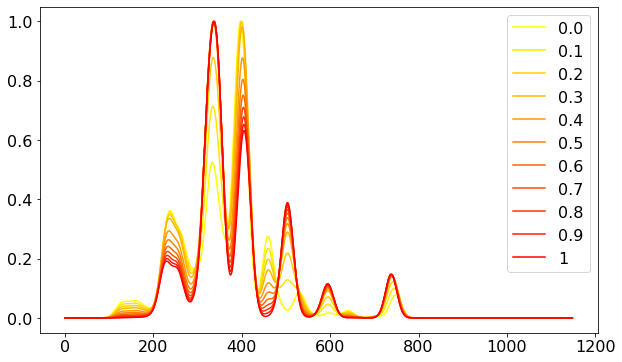

In [212]:
colors = plt.cm.autumn_r(np.linspace(0, 1, len(ratios)))

fig, ax = plt.subplots(figsize=(10,6)) 

for key, color in zip(mix_mono14_ortho29_norm, colors):
    ax.plot(mix_mono14_ortho29_norm[key][:, 0], mix_mono14_ortho29_norm[key][:, 1], c=color, label=key)
    ax.legend()

In [218]:
# normalizing the theo data - Int/somme intensités
mix_mono14_ortho29_norm_sum = {}
for key in mix_mono14_ortho29:

    intensity_norm = mix_mono14_ortho29[key][:, 1]/np.sum(mix_mono14_ortho29[key][:, 1])

    mix_mono14_ortho29_norm_sum[key] = np.concatenate((np.array([mix_mono14_ortho29[key][:, 0]]).T, np.array([intensity_norm]).T), axis=1)

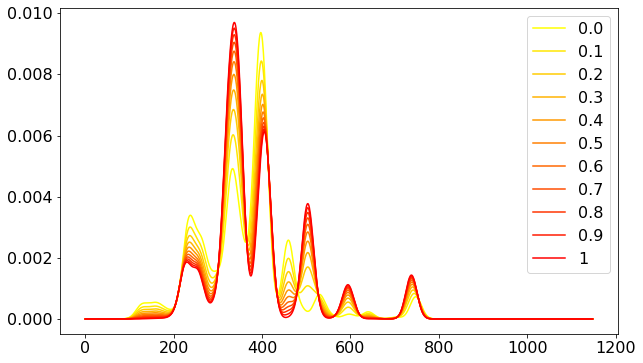

In [219]:
colors = plt.cm.autumn_r(np.linspace(0, 1, len(ratios)))

fig, ax = plt.subplots(figsize=(10,6)) 

for key, color in zip(mix_mono14_ortho29_norm_sum, colors):
    ax.plot(mix_mono14_ortho29_norm_sum[key][:, 0], mix_mono14_ortho29_norm_sum[key][:, 1], c=color, label=key)
    ax.legend()

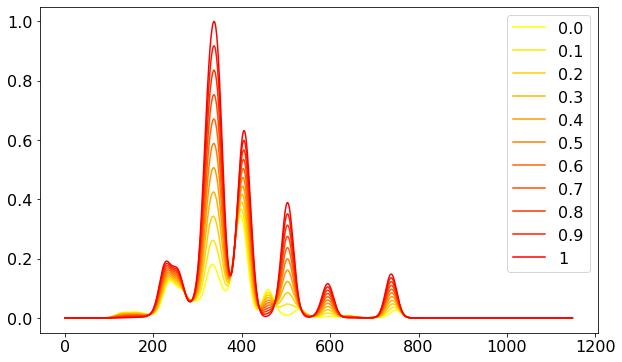

In [232]:
np.max(mix_mono14_ortho29[1.0][:, 1])

242.43991318390007

#### Preparing data: old code, done by hand instead of with interpolate

10 (163, 2)
11 (163, 2)
17 (163, 2)
21 (163, 2)
52 (163, 2)


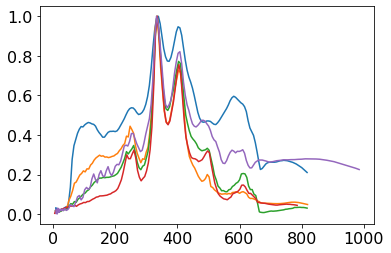

In [116]:
d_HZO_exp_frechet = {}
for key in d_HZO_exp:
#     print(key, d_HZO_exp[key].shape)
#     print(key, d_HZO_exp[key][0])
#     print(key, d_HZO_exp[key][-800])
#     print(key, d_HZO_exp[key][:-809].shape)
    if key in ["52"]:
        end = -433
    if key in ["10", "11", "17"]:
        end = -809
    elif key in ["21"]:
        end = -814

    exp_test = d_HZO_exp[key][:end]
    exp_test_int = -np.log(d_HZO_exp[key][:end][:, 1])
    exp_test = np.concatenate((np.array([exp_test[:, 0]]).T, np.array([exp_test_int]).T), axis=1)
#     plt.plot(exp_test[:, 0], exp_test[:, 1])
    
    exp_test_norm = exp_test[:, 1]/np.max(exp_test[:, 1])
    exp_test_norm_2D = np.concatenate((np.array([exp_test[:, 0]]).T, np.array([exp_test_norm]).T), axis=1)
    plt.plot(exp_test_norm_2D[:, 0], exp_test_norm_2D[:, 1])
    
    print(key, exp_test_norm_2D.shape)

    d_HZO_exp_frechet[key] = exp_test_norm_2D
        

0.0 (148, 2)
0.1 (148, 2)
0.2 (148, 2)
0.3 (148, 2)
0.4 (148, 2)
0.5 (148, 2)
0.6 (148, 2)
0.7 (148, 2)
0.8 (148, 2)
0.9 (148, 2)
1 (148, 2)


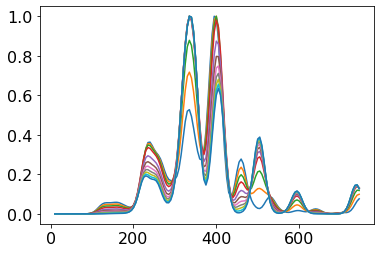

In [117]:
mix_mono14_ortho29_frechet = {}
for key in mix_mono14_ortho29:
#     print(key, mix_mono14_ortho29[key].shape)
#     print(key, mix_mono14_ortho29[key][10:-400][::5].shape)
    theo_test = mix_mono14_ortho29[key][10:-400][::5]
    theo_test_norm = theo_test[:, 1]/np.max(theo_test[:, 1])
    theo_test_norm_2D = np.concatenate((np.array([theo_test[:, 0]]).T, np.array([theo_test_norm]).T), axis=1)
    plt.plot(theo_test_norm_2D[:, 0], theo_test_norm_2D[:, 1])
    print(key, theo_test_norm_2D.shape)
    mix_mono14_ortho29_frechet[key] = theo_test_norm_2D

In [118]:
frechet_distances = {}
for key_theo in mix_mono14_ortho29_frechet:
    print("\n")
    for key_exp in d_HZO_exp_frechet:
        frechet_distance = frdist(mix_mono14_ortho29_frechet[key_theo], d_HZO_exp_frechet[key_exp])
        print(key_theo, key_exp, frechet_distance)
        frechet_distances[f"{key_theo}_{key_exp}"] = frechet_distance

ValueError: Input curves do not have the same dimensions.

In [62]:
chi2_distance_dic = {}
for key_theo in mix_mono14_ortho29_frechet:
    print("\n")
    for key_exp in d_HZO_exp_frechet:
        chi_value = chi2_distance(mix_mono14_ortho29_frechet[key_theo][:, 1], d_HZO_exp_frechet[key_exp][:, 1])
        print(key_theo, key_exp, chi_value)
        chi2_distance_dic[f"{key_theo}_{key_exp}"] = chi_value



0.0 10 17.115870518040012
0.0 11 4.257518895054048
0.0 17 5.521931373485685
0.0 21 8.387310365135827
0.0 52 11.2259684926771


0.1 10 16.175867095552555
0.1 11 4.026859177411477
0.1 17 5.300531433575727
0.1 21 8.093672047250788
0.1 52 10.567175051629382


0.2 10 15.764706994499079
0.2 11 4.264069100438741
0.2 17 5.481435000717266
0.2 21 8.163116773276608
0.2 52 10.376262971717045


0.3 10 15.64981067326434
0.3 11 4.698103097276036
0.3 17 5.844783647728134
0.3 21 8.40570812761734
0.3 52 10.432629669537839


0.4 10 16.322114542807565
0.4 11 5.1776829588140325
0.4 17 6.133667536233788
0.4 21 8.236922355572128
0.4 52 10.76537311891327


0.5 10 16.92074262497818
0.5 11 5.638761503923034
0.5 17 6.449797205799358
0.5 21 8.193384941735616
0.5 52 11.114055045558525


0.6 10 17.446675412300564
0.6 11 6.062928541776541
0.6 17 6.761304700664262
0.6 21 8.215389539161322
0.6 52 11.450593505511824


0.7 10 17.908209214803712
0.7 11 6.446933403854707
0.7 17 7.0562459285198855
0.7 21 8.27275673977789

In [63]:
sorted(chi2_distance_dic.items(), key=lambda x:x[1])

[('0.1_11', 4.026859177411477),
 ('0.0_11', 4.257518895054048),
 ('0.2_11', 4.264069100438741),
 ('0.3_11', 4.698103097276036),
 ('0.4_11', 5.1776829588140325),
 ('0.1_17', 5.300531433575727),
 ('0.2_17', 5.481435000717266),
 ('0.0_17', 5.521931373485685),
 ('0.5_11', 5.638761503923034),
 ('0.3_17', 5.844783647728134),
 ('0.6_11', 6.062928541776541),
 ('0.4_17', 6.133667536233788),
 ('0.7_11', 6.446933403854707),
 ('0.5_17', 6.449797205799358),
 ('0.6_17', 6.761304700664262),
 ('0.8_11', 6.7928098323303745),
 ('0.7_17', 7.0562459285198855),
 ('0.9_11', 7.104251199011998),
 ('0.8_17', 7.330783591205333),
 ('1_11', 7.385228302793981),
 ('0.9_17', 7.584503367450055),
 ('1_17', 7.818417687630642),
 ('0.1_21', 8.093672047250788),
 ('0.2_21', 8.163116773276608),
 ('0.5_21', 8.193384941735616),
 ('0.6_21', 8.215389539161322),
 ('0.4_21', 8.236922355572128),
 ('0.7_21', 8.27275673977789),
 ('0.8_21', 8.349185667033987),
 ('0.0_21', 8.387310365135827),
 ('0.3_21', 8.40570812761734),
 ('0.9_21',

In [ ]:
sorted(frechet_distances.items(), key=lambda x:x[1])

In [47]:
for key in mix_mono14_ortho29_frechet:
    frechet_distance = frdist(mix_mono14_ortho29_frechet[0.5], mix_mono14_ortho29_frechet[round(key+0.1, 1)])
    print(frechet_distance)

0.30756523109630374
0.23513182314737335
0.20591876175890156
0.08681475291751284
0.0
0.06608860113383219
0.1180817815831976
0.16005441633691309
0.1946487488968358
0.22365312401061843


KeyError: 1.1

In [52]:
for key in mix_mono14_ortho29_frechet:
    frechet_distance = chi2(mix_mono14_ortho29_frechet[0.5], mix_mono14_ortho29_frechet[round(key+0.1, 1)][:, 1])
    print(frechet_distance)

ValueError: Unknown label type: (array([5.31888703e-14, 6.18878587e-13, 6.19743835e-12, 5.34141305e-11,
       3.96281752e-10, 2.53172133e-09, 1.39387048e-08, 6.62324635e-08,
       2.72402230e-07, 9.75094268e-07, 3.07031043e-06, 8.67213631e-06,
       2.27097085e-05, 5.76741077e-05, 1.47731599e-04, 3.83967551e-04,
       9.81553010e-04, 2.36361178e-03, 5.18255503e-03, 1.01383710e-02,
       1.75182811e-02, 2.66624248e-02, 3.58630225e-02, 4.30731992e-02,
       4.70956415e-02, 4.83032456e-02, 4.82318879e-02, 4.83949677e-02,
       4.93070291e-02, 5.03679909e-02, 5.04874477e-02, 4.88828260e-02,
       4.55425066e-02, 4.11685007e-02, 3.67732418e-02, 3.33230099e-02,
       3.17821048e-02, 3.36632310e-02, 4.18190437e-02, 6.07507119e-02,
       9.53895787e-02, 1.47849762e-01, 2.13525810e-01, 2.79933245e-01,
       3.31118344e-01, 3.56162860e-01, 3.55640044e-01, 3.40278244e-01,
       3.22440809e-01, 3.07462993e-01, 2.91900450e-01, 2.69413182e-01,
       2.38441211e-01, 2.04854417e-01, 1.77824630e-01, 1.63344077e-01,
       1.61539316e-01, 1.70075222e-01, 1.90276976e-01, 2.29815079e-01,
       2.98089452e-01, 3.96558663e-01, 5.11706982e-01, 6.17711135e-01,
       6.88193066e-01, 7.08369867e-01, 6.78979731e-01, 6.11556042e-01,
       5.21811567e-01, 4.26898181e-01, 3.46211868e-01, 3.01583816e-01,
       3.13536931e-01, 3.93449241e-01, 5.34928549e-01, 7.10046466e-01,
       8.74764686e-01, 9.82511586e-01, 1.00000000e+00, 9.18921041e-01,
       7.59151228e-01, 5.61358156e-01, 3.71076942e-01, 2.22289322e-01,
       1.29673764e-01, 9.17271511e-02, 9.83517792e-02, 1.35282420e-01,
       1.84269450e-01, 2.24333212e-01, 2.38259667e-01, 2.21090415e-01,
       1.82729238e-01, 1.41238405e-01, 1.12026075e-01, 1.00984567e-01,
       1.04654469e-01, 1.14679158e-01, 1.22748742e-01, 1.24160113e-01,
       1.19155123e-01, 1.11355603e-01, 1.04070904e-01, 9.73961069e-02,
       8.87193956e-02, 7.59144291e-02, 5.97817906e-02, 4.34635793e-02,
       2.99732731e-02, 2.05317950e-02, 1.48596055e-02, 1.24285108e-02,
       1.32252797e-02, 1.75102069e-02, 2.49554276e-02, 3.38970324e-02,
       4.14170134e-02, 4.45278315e-02, 4.18416491e-02, 3.44829208e-02,
       2.54829499e-02, 1.81325198e-02, 1.44730696e-02, 1.46927919e-02,
       1.73962777e-02, 2.03867984e-02, 2.16565751e-02, 2.02435535e-02,
       1.65284369e-02, 1.17972372e-02, 7.41367107e-03, 4.19496003e-03,
       2.30688465e-03, 1.53577289e-03, 1.59699510e-03, 2.26322408e-03,
       3.31993540e-03, 4.50506598e-03, 5.60795918e-03, 6.78021219e-03,
       8.89642722e-03, 1.36340206e-02, 2.29624682e-02, 3.80019128e-02,
       5.76834014e-02, 7.80944173e-02, 9.33749988e-02, 9.81996367e-02,
       9.05815637e-02, 7.30814722e-02, 5.14227843e-02, 3.14688696e-02,
       1.67102168e-02, 7.68884751e-03, 3.06737791e-03, 1.06689910e-03,
       3.30768134e-04, 9.96320045e-05, 3.85835975e-05, 2.69401610e-05,
       2.75819451e-05, 2.96014110e-05, 2.93575061e-05]),)

In [57]:
mix_mono14_ortho29_frechet[0.5].shape

(163, 2)

In [55]:
chisquare(mix_mono14_ortho29_frechet[0.5], mix_mono14_ortho29_frechet[0.6])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
[0.         0.04157143]

In [58]:
# Function to calculate Chi-distance
def chi2_distance(A, B):
 
    # compute the chi-squared distance using above formula
    chi = 0.5 * np.sum([((a - b) ** 2) / (a + b)
                      for (a, b) in zip(A, B)])
 
    return chi

In [59]:
for key in mix_mono14_ortho29_frechet:
    frechet_distance = chi2_distance(mix_mono14_ortho29_frechet[0.5], mix_mono14_ortho29_frechet[round(key+0.1, 1)])
    print(frechet_distance)

1.0632127931778919
0.5049238090123483
0.26669567014086865
0.05301463149955009
0.0
0.03682088547811706
0.12687529848605536
0.24997056918964283
0.39444215121309356
0.5533411647397546


KeyError: 1.1

NameError: name 'mix_mono14_ortho29_frechet' is not defined

##### Using the Frehcet distance for 52 nm (different shape than the others)

In [ ]:
d_HZO_exp['52'][0]

In [ ]:
d_HZO_exp['52'][:-434].shape

exp_52nm_frechet_distance = d_HZO_exp['52'][:-434]
exp_52nm_frechet_distance_int = -np.log(d_HZO_exp['52'][:-434][:, 1])
exp_52nm_frechet_distance = np.concatenate((np.array([exp_52nm_frechet_distance[:, 0]]).T, np.array([exp_52nm_frechet_distance_int]).T), axis=1)
# plt.plot(exp_52nm_frechet_distance[:, 0], exp_52nm_frechet_distance[:, 1])

exp_52nm_frechet_distance_norm = exp_52nm_frechet_distance[:, 1]/np.max(exp_52nm_frechet_distance[:, 1])
exp_52nm_frechet_distance_norm_2D = np.concatenate((np.array([exp_52nm_frechet_distance[:, 0]]).T, np.array([exp_52nm_frechet_distance_norm]).T), axis=1)
plt.plot(exp_52nm_frechet_distance_norm_2D[:, 0], exp_52nm_frechet_distance_norm_2D[:, 1])

print(exp_52nm_frechet_distance_norm_2D[0], exp_52nm_frechet_distance_norm_2D[-1])

print(exp_52nm_frechet_distance_norm_2D.shape)

In [ ]:
mix_mono14_ortho29_frechet_52nm = {}
for key in mix_mono14_ortho29:
    mix_mono_ortho_for_52nm = mix_mono14_ortho29[key][10:-80][::7]
    mix_mono_ortho_for_52nm_norm = mix_mono_ortho_for_52nm[:, 1]/np.max(mix_mono_ortho_for_52nm[:, 1])
    mix_mono_ortho_for_52nm_norm_2D = np.concatenate((np.array([mix_mono_ortho_for_52nm[:, 0]]).T, np.array([mix_mono_ortho_for_52nm_norm]).T), axis=1)
    plt.plot(mix_mono_ortho_for_52nm_norm_2D[:, 0], mix_mono_ortho_for_52nm_norm_2D[:, 1])
    print(key, mix_mono_ortho_for_52nm_norm_2D.shape)
    mix_mono14_ortho29_frechet_52nm[key] = mix_mono_ortho_for_52nm_norm_2D




In [ ]:
frechet_distances_52nm = {}
for key_theo in mix_mono14_ortho29_frechet_52nm:
    print("\n")
    frechet_distance = frdist(mix_mono14_ortho29_frechet_52nm[key_theo], exp_52nm_frechet_distance_norm_2D)
    print(key_theo, "52nm", frechet_distance)
    frechet_distances_52nm[f"{key_theo}_52nm"] = frechet_distance

#### Trying intersect bewteen the two curves: a better way to have the same shape?

In [414]:
print(np.intersect1d(mix_mono14_ortho29[0.5][:, 0], d_HZO_exp["11"][:, 0])) 

[]


In [397]:
mix_mono14_ortho29[0.5][10:-80][::7].shape

(162, 2)

In [396]:
mix_mono14_ortho29[0.5][::7].shape

(175, 2)

In [218]:
(d_HZO_exp['11']).shape

(972, 2)

In [250]:
d_HZO_exp['11'][0]

array([9.76288  , 0.9995756])

In [254]:
mix_mono14_ortho29[0.5][10]

array([1.00010000e+01, 6.64844294e-12])

In [267]:
d_HZO_exp['11'][-800]

array([876.97141   ,   0.99831078])

In [319]:
end= -814
print(d_HZO_exp['21'][end])
d_HZO_exp['21'][:end].shape

[791.63665     0.9956071]


(163, 2)

In [336]:
end= -433
print(d_HZO_exp['52'][end])
d_HZO_exp['52'][:end].shape

[9.97018630e+02 9.54737391e-01]


(163, 2)

In [313]:
mix_mono14_ortho29[0.5][10:-400]

array([[1.00010000e+01, 6.64844294e-12],
       [1.10010000e+01, 1.08744088e-11],
       [1.20010000e+01, 1.76809846e-11],
       ...,
       [8.20001000e+02, 1.17216056e-02],
       [8.21001000e+02, 1.16687398e-02],
       [8.22001000e+02, 1.15521092e-02]])

In [275]:
d_HZO_exp['11'][:-809].shape

(163, 2)

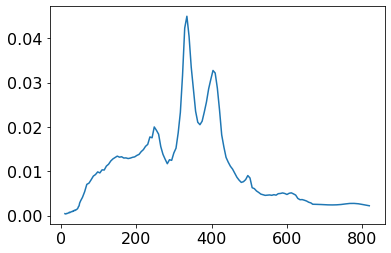

In [294]:
exp_test = d_HZO_exp['11'][:-809]
exp_test_int = -np.log(d_HZO_exp['11'][:-809][:, 1])
exp_test = np.concatenate((np.array([exp_test[:, 0]]).T, np.array([exp_test_int]).T), axis=1)
plt.plot(exp_test[:, 0], exp_test[:, 1])

In [259]:
mix_mono14_ortho29[0.5][10:-400][::5].shape

(163, 2)

In [277]:
theo_test = mix_mono14_ortho29[0.5][10:-400][::5]

In [219]:
mix_mono14_ortho29[0.5][::2].shape

(1223, 2)

In [278]:
frdist(theo_test, exp_test)

142.71621656275653

In [282]:
theo_test_norm = theo_test[:, 1]/np.max(theo_test[:, 1])

In [285]:
theo_test_norm_2D = np.concatenate((np.array([theo_test[:, 0]]).T, np.array([theo_test_norm]).T), axis=1)

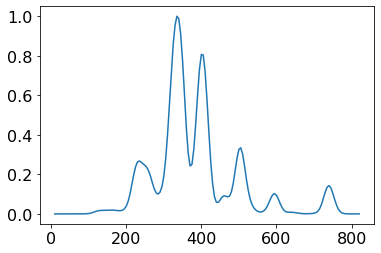

In [287]:
plt.plot(theo_test_norm_2D[:, 0], theo_test_norm_2D[:, 1])

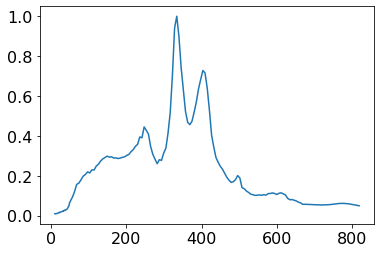

In [295]:
exp_test_norm = exp_test[:, 1]/np.max(exp_test[:, 1])
exp_test_norm_2D = np.concatenate((np.array([exp_test[:, 0]]).T, np.array([exp_test_norm]).T), axis=1)
plt.plot(exp_test_norm_2D[:, 0], exp_test_norm_2D[:, 1])

In [297]:
frdist(theo_test_norm_2D, exp_test_norm_2D)

2.897930861564758

In [290]:
frdist(theo_test, exp_test) # without normalizing the intensities 826.7092273883985

826.7092273883985

### mix_mono14_tetra137 comparison with Exp

#### Pretreating the data

In [322]:
# normalizing the theo data
mix_mono14_tetra137_norm = {}
for key in mix_mono14_tetra137:

    intensity_norm = mix_mono14_tetra137[key][:, 1]/np.max(mix_mono14_tetra137[1.0][:, 1])

    mix_mono14_tetra137_norm[key] = np.concatenate((np.array([mix_mono14_tetra137[key][:, 0]]).T, np.array([intensity_norm]).T), axis=1)

In [323]:
# saving the interpolated Exp data into a new dic, already normalized to 1
d_HZO_exp_interpol_tetra_mono = {}
for key in d_HZO_exp:
    x1 = d_HZO_exp[key][:, 0] # define the old axis x
    y1 = -np.log(d_HZO_exp[key][:, 1]) # define the old axis y

    new_x1 = mix_mono14_tetra137_norm[0.5][:, 0] # I use the 0.5 as all theo have the same x axis

    interpolated_1 = interp.interp1d(x1, y1, fill_value="extrapolate")
    new_y1 = interpolated_1(new_x1)

    absorbance_norm = new_y1/np.max(-np.log(d_HZO_exp['52'][:, 1]))

    d_HZO_exp_interpol_tetra_mono[key] = np.concatenate((np.array([new_x1]).T, np.array([absorbance_norm]).T), axis=1)

In [324]:
# checking if they all have the same shape - yes
for key_exp, key_theo in zip(d_HZO_exp_interpol_tetra_mono, mix_mono14_tetra137_norm):
    print(key_exp, d_HZO_exp_interpol_tetra_mono[key_exp].shape)
    print(key_theo, mix_mono14_tetra137_norm[key_theo].shape)

10 (1082, 2)
0.0 (1082, 2)
11 (1082, 2)
0.01 (1082, 2)
17 (1082, 2)
0.02 (1082, 2)
21 (1082, 2)
0.03 (1082, 2)
52 (1082, 2)
0.04 (1082, 2)


#### Pearson's correlation coeficcient

In [189]:
# Evaluating the r coef for Theo vs Exp
r_dic_tetra = {}
for key_theo in mix_mono14_tetra137_norm:
#     print("\n")
    for key_exp in d_HZO_exp_interpol_tetra_mono:
        r = np.corrcoef(mix_mono14_tetra137_norm[key_theo][:, 1], d_HZO_exp_interpol_tetra_mono[key_exp][:, 1])
        
        r_dic_tetra[f"{round(key_theo*100)}% Mono {key_exp}nm"] = r[0, 1]
        
#         print(key_theo, key_exp, r, r[0, 1], r[1, 0])
sorted(r_dic_tetra.items(), key=lambda x:x[1], reverse=True)

[('87% Mono 21nm', 0.9225419701474665),
 ('88% Mono 21nm', 0.9224663658498485),
 ('86% Mono 21nm', 0.9224612388697476),
 ('89% Mono 21nm', 0.9222399710445883),
 ('85% Mono 21nm', 0.9222186700078198),
 ('90% Mono 21nm', 0.9218683540229058),
 ('84% Mono 21nm', 0.9218088255782241),
 ('91% Mono 21nm', 0.9213570876492736),
 ('83% Mono 21nm', 0.9212263536502795),
 ('92% Mono 21nm', 0.9207117319340358),
 ('82% Mono 21nm', 0.9204660113460427),
 ('93% Mono 21nm', 0.9199378178520125),
 ('81% Mono 21nm', 0.9195226887065304),
 ('94% Mono 21nm', 0.91904083241669),
 ('80% Mono 21nm', 0.9183914332993697),
 ('95% Mono 21nm', 0.918026205007285),
 ('79% Mono 21nm', 0.9170674754245207),
 ('96% Mono 21nm', 0.9168992949350466),
 ('97% Mono 21nm', 0.9156653802255063),
 ('78% Mono 21nm', 0.915546253756527),
 ('98% Mono 21nm', 0.9143296475850693),
 ('77% Mono 21nm', 0.9138234412442587),
 ('99% Mono 21nm', 0.9128971835132347),
 ('76% Mono 21nm', 0.9118949710726619),
 ('75% Mono 21nm', 0.9097570624760999),
 ('7

 Using 10% ratio:
 ('80% Mono 10nm', 0.7672810444506206),
 
 ('70% Mono 10nm', 0.766491189370341),
 
 ('90% Mono 10nm', 0.7537450020788399),
 
 ('60% Mono 10nm', 0.7478306419649811),
 
 
 Using 1% ratio:
 
 '75% Mono 10nm', 0.7689520137505794),
 
 ('76% Mono 10nm', 0.7689330003437601),
 
 ('74% Mono 10nm', 0.7688052921683438),
 
 ('77% Mono 10nm', 0.7687521741359381),
 
 ('73% Mono 10nm', 0.7684891452807279),
 
 ('78% Mono 10nm', 0.7684136666487742),
 
 ('72% Mono 10nm', 0.7680001368252034),
 
 ('79% Mono 10nm', 0.7679217960422179),
 
 ('71% Mono 10nm', 0.7673351062123444),
 
 ('80% Mono 10nm', 0.7672810444506206),
 
 ('81% Mono 10nm', 0.766496035526827),
 
 ('70% Mono 10nm', 0.7664911893703413),

Text(0, 0.5, 'THEO')

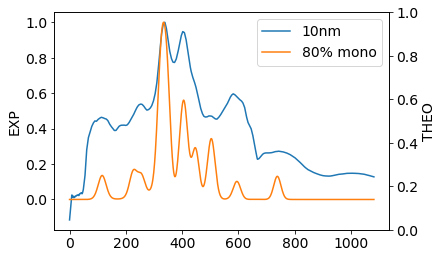

In [74]:
fig, ax = plt.subplots()
ax.plot(d_HZO_exp_interpol_tetra_mono['10'][:, 0], d_HZO_exp_interpol_tetra_mono['10'][:, 1], label="10nm")
ax2 = ax.twinx()
ax.plot(mix_mono14_tetra137_norm[0.8][:, 0], mix_mono14_tetra137_norm[0.8][:, 1], label="80% mono")
ax.legend()

ax.set_ylabel("EXP")
ax2.set_ylabel("THEO")

#### Coeficient of determination $R^2$: best results!

In [325]:
from sklearn.metrics import r2_score

# Evaluating the r2 for Theo vs Exp
r2_distance_dic_tetra = {}
for key_theo in mix_mono14_tetra137_norm:
#     print("\n")
    for key_exp in d_HZO_exp_interpol_tetra_mono:
        r2_value = r2_score(mix_mono14_tetra137_norm[key_theo][:, 1], d_HZO_exp_interpol_tetra_mono[key_exp][:, 1])
        
        r2_distance_dic_tetra[f"{round(key_theo*100)}% Mono {key_exp}nm"] = r2_value

        

for key_exp in d_HZO_exp_interpol_tetra_mono:
    pprint(sorted([(a, b) for a, b in r2_distance_dic_tetra.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=True))
    print('\n')

[('69% Mono 10nm', 0.41387865006716007),
 ('70% Mono 10nm', 0.4138325316798599),
 ('68% Mono 10nm', 0.4137249979122687),
 ('71% Mono 10nm', 0.4135899303856071),
 ('67% Mono 10nm', 0.4133687972696958),
 ('72% Mono 10nm', 0.41315461444478674),
 ('66% Mono 10nm', 0.4128078061609953),
 ('73% Mono 10nm', 0.4125308012794566),
 ('65% Mono 10nm', 0.41204034169785786),
 ('74% Mono 10nm', 0.4117231240134619),
 ('64% Mono 10nm', 0.4110652997130676),
 ('75% Mono 10nm', 0.4107365964252645),
 ('63% Mono 10nm', 0.40988217059750154),
 ('76% Mono 10nm', 0.40957657672216685),
 ('62% Mono 10nm', 0.4084910510841182),
 ('77% Mono 10nm', 0.40824873053755395),
 ('61% Mono 10nm', 0.4068926517686374),
 ('78% Mono 10nm', 0.40675899353965017),
 ('79% Mono 10nm', 0.40511353402183736),
 ('60% Mono 10nm', 0.4050883002104434),
 ('80% Mono 10nm', 0.40331871582149104),
 ('59% Mono 10nm', 0.4030799395151513),
 ('81% Mono 10nm', 0.4013810618874635),
 ('58% Mono 10nm', 0.40087012236102937),
 ('82% Mono 10nm', 0.399307218

In [326]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Evaluating the MAE for Theo vs Exp
MAE_distance_dic = {}

# Evaluating the MSE for Theo vs Exp
MSE_distance_dic = {}

# Evaluating the RMSE for Theo vs Exp
RMSE_distance_dic = {}


for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:
        MAE_value = mean_absolute_error(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], 
                                        d_HZO_exp_interpol[key_exp][:, 1])    

        MSE_value = mean_squared_error(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], 
                                       d_HZO_exp_interpol[key_exp][:, 1])
        
        RMSE_value = np.sqrt(mean_squared_error(mix_mono14_ortho29_norm_scale_factor[key_theo][:, 1], 
                                             d_HZO_exp_interpol[key_exp][:, 1]))        
        
        MAE_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = MAE_value
        MSE_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = MSE_value
        RMSE_distance_dic[f"{round(key_theo*100)}% Mono {key_exp}nm"] = RMSE_value


        
print('\n MEAN ABSOLUTE VALUE')

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in MAE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')
    
print('\n MEAN SQUARED VALUE')

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in MSE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')
    
print('\n ROOT MEAN SQUARED VALUE')

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in RMSE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')


 MEAN ABSOLUTE VALUE
[('15% Mono 10nm', 0.057637893786896856),
 ('16% Mono 10nm', 0.05764607869895441),
 ('14% Mono 10nm', 0.057648825212086974),
 ('17% Mono 10nm', 0.05767166430411769),
 ('13% Mono 10nm', 0.0576814639592838),
 ('18% Mono 10nm', 0.057717773624875075),
 ('12% Mono 10nm', 0.057748928208025),
 ('19% Mono 10nm', 0.05777680958509504),
 ('20% Mono 10nm', 0.057845615608786184),
 ('11% Mono 10nm', 0.057849263119237895),
 ('21% Mono 10nm', 0.057925485571035946),
 ('10% Mono 10nm', 0.05799239473845915),
 ('22% Mono 10nm', 0.05801977384252474),
 ('23% Mono 10nm', 0.058121222848105565),
 ('9% Mono 10nm', 0.05818521322957287),
 ('24% Mono 10nm', 0.0582311839318024),
 ('25% Mono 10nm', 0.058348558776432455),
 ('8% Mono 10nm', 0.05845645414124991),
 ('26% Mono 10nm', 0.058473513701974955),
 ('27% Mono 10nm', 0.05860911103746488),
 ('28% Mono 10nm', 0.058755165186300175),
 ('7% Mono 10nm', 0.058844413516109896),
 ('29% Mono 10nm', 0.05895045269488939),
 ('30% Mono 10nm', 0.0591698828

 ('27% Mono 21nm', 0.036385126531030675),
 ('42% Mono 21nm', 0.03674764255688702),
 ('26% Mono 21nm', 0.036922498029411104),
 ('43% Mono 21nm', 0.03732716930489246),
 ('25% Mono 21nm', 0.03752078622529958),
 ('44% Mono 21nm', 0.03796565570780367),
 ('24% Mono 21nm', 0.038177127280315394),
 ('45% Mono 21nm', 0.03866018065802167),
 ('23% Mono 21nm', 0.03888858194856403),
 ('46% Mono 21nm', 0.0394077813874147),
 ('22% Mono 21nm', 0.03965218373233645),
 ('47% Mono 21nm', 0.04020549725380438),
 ('21% Mono 21nm', 0.04046498058439868),
 ('48% Mono 21nm', 0.04105040675989803),
 ('20% Mono 21nm', 0.041324069775719875),
 ('49% Mono 21nm', 0.0419396577365684),
 ('19% Mono 21nm', 0.04222662598576135),
 ('50% Mono 21nm', 0.042870490983285096),
 ('18% Mono 21nm', 0.0431699229977793),
 ('51% Mono 21nm', 0.04384025790771951),
 ('17% Mono 21nm', 0.04415134959779849),
 ('52% Mono 21nm', 0.04484643285549929),
 ('16% Mono 21nm', 0.04516842039699701),
 ('53% Mono 21nm', 0.04588662088768639),
 ('15% Mono 21

In [ ]:
from sklearn.metrics import mean_squared_error


for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:

        
# sorted(RMSE2_distance_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in RMSE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')

In [ ]:
from sklearn.metrics import mean_squared_error


for key_theo in mix_mono14_ortho29_norm_scale_factor:
#     print("\n")
    for key_exp in d_HZO_exp_interpol:

        
# sorted(MSE2_distance_dic.items(), key=lambda x:x[1], reverse=True)

for key_exp in d_HZO_exp_interpol:
    pprint(sorted([(a, b) for a, b in MSE_distance_dic.items() if str(key_exp+'nm') in a.lower()], 
                  key=lambda x:x[1], 
                  reverse=False))
    print('\n')

### Plotting Final Theo vs Exp Figura for HZO Paper:

#### 6 subplot: Exp and Theo (only one phase per subplot)

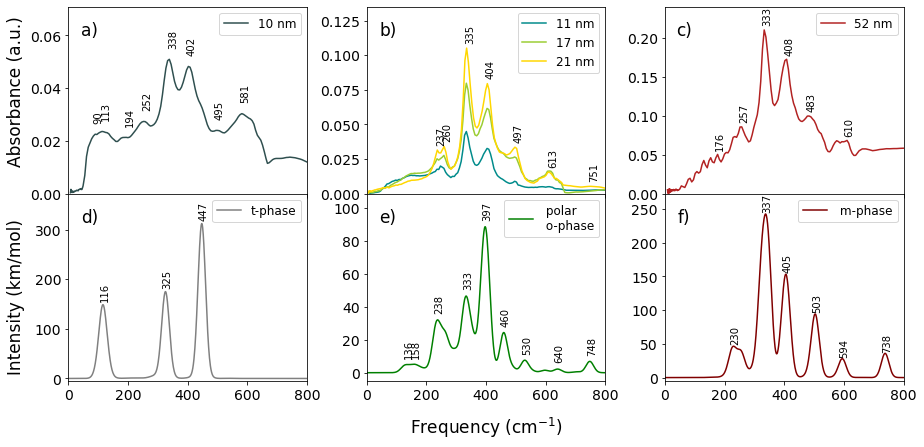

In [527]:
# creating figure and axes
fig, ax = plt.subplots(nrows=2, ncols=3 , sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# creating a range of colors in rainbow style
colors = cm.rainbow(np.linspace(0, 1, 3))

# itarating over the files, colors and columns for the figure

## 10 nm ###
ax[0, 0].plot(d_HZO_exp['10'][:, 0], -np.log(d_HZO_exp['10'][:, 1]), c='darkslategray', 
     label='10 nm') #'HZO Exp 10 nm (mix t- and m-phase)')
ax[0, 0].legend(fontsize=12, title_fontsize=10)
ax[0, 0].set_ylim(0, max(-np.log(d_HZO_exp['10'][:, 1]))+0.02)
ax[0, 0].set_xlim(0, 800)

put_freq(x=d_HZO_exp['10'][:, 0], 
         Int=-np.log(d_HZO_exp['10'][:, 1]), 
         axis=ax[0, 0], 
         fontsize=10,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.02,
#              distance=0.0001,
         prominence=None,
         height=None)



####  TETRA137 THEORETICAL #############
ax[1, 0].plot(wvn_Average_HZO_all_TETRA137_FIXDEF, Int_Average_HZO_all_TETRA137_FIXDEF, c='gray', 
     label='t-phase')
ax[1, 0].legend(fontsize=12) #, title='HZO DFT', title_fontsize=10)
ax[1, 0].set_ylim(-5, max(Int_Average_HZO_all_TETRA137_FIXDEF)+60)
ax[1, 0].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_TETRA137_FIXDEF, 
         Int=Int_Average_HZO_all_TETRA137_FIXDEF, 
         axis=ax[1, 0], 
         fontsize=10,
         shift_Int= 10, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=50,
#              distance=0.0001,
         prominence=None,
         height=0)


            
### 11, 17, 21 nm ###
ax[0, 1].plot(d_HZO_exp['11'][:, 0], -np.log(d_HZO_exp['11'][:, 1]), c='darkcyan', 
     label='11 nm')
ax[0, 1].plot(d_HZO_exp['17'][:, 0], -np.log(d_HZO_exp['17'][:, 1]), c='yellowgreen', 
     label='17 nm')
ax[0, 1].plot(d_HZO_exp['21'][:, 0], -np.log(d_HZO_exp['21'][:, 1]), c='gold', 
     label='21 nm')
 
ax[0, 1].legend(fontsize=12) #, title='HZO Exp m- and polar o-phase (nm)', title_fontsize=10)
ax[0, 1].set_ylim(0, max(-np.log(d_HZO_exp['21'][:, 1]))+0.03)
ax[0, 1].set_xlim(0, 800)

put_freq(x=d_HZO_exp['21'][:, 0], 
         Int=-np.log(d_HZO_exp['21'][:, 1]), 
         axis=ax[0, 1], 
         fontsize=10,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.005,
#              distance=0.0001,
         prominence=None,
         height=None)


####  ORTHO29 THEORETICAL #############
ax[1, 1].plot(wvn_Average_HZO_all_FIXDEF, Int_Average_HZO_all_FIXDEF, c='green', 
     label=' polar \n o-phase')
ax[1, 1].legend(fontsize=12) #, title='HZO DFT', title_fontsize=10)
ax[1, 1].set_ylim(-5, max(Int_Average_HZO_all_FIXDEF)+20)
ax[1, 1].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_FIXDEF, 
         Int=Int_Average_HZO_all_FIXDEF, 
         axis=ax[1, 1], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=2,
#              distance=0.0001,
         prominence=None,
         height=0)

#### MONO14 THEORETICAL #############
ax[1, 2].plot(wvn_Average_HZO_all_MONO14_FIXDEF, Int_Average_HZO_all_MONO14_FIXDEF, c='maroon', 
     label=' m-phase')
ax[1, 2].legend(fontsize=12) #, title='HZO DFT', title_fontsize=10)
ax[1, 2].set_ylim(-5, max(Int_Average_HZO_all_MONO14_FIXDEF)+30)
ax[1, 2].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_MONO14_FIXDEF, 
         Int=Int_Average_HZO_all_MONO14_FIXDEF, 
         axis=ax[1, 2], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=20,
#              distance=0.0001,
         prominence=None,
         height=0)


### 52 nm ###
ax[0, 2].plot(d_HZO_exp['52'][:, 0], -np.log(d_HZO_exp['52'][:, 1]), c='firebrick', 
     label='52 nm') #'HZO Exp 52 nm (m-phase)')
ax[0, 2].legend(fontsize=12, title_fontsize=10)
ax[0, 2].set_ylim(0, max(-np.log(d_HZO_exp['52'][:, 1]))+0.03)
ax[0, 2].set_xlim(0, 800)

put_freq(x=d_HZO_exp['52'][:, 0], 
         Int=-np.log(d_HZO_exp['52'][:, 1]), 
         axis=ax[0, 2], 
         fontsize=10,
         shift_Int= 0.008, 
         shift_x= -8, 
         rotation=90, 
         width=0.005,
         threshold=0.05,
#              distance=0.0001,
         prominence=None,
         height=None)

    
# fig.text(0.38, 0.92, 'Average HZO - Tetra, Mono, Ortho', fontsize = 17)
fig.text(0.5, 0, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)


fig.text(0.05, 0.72, 'Absorbance (a.u.)', ha='center', va='center', rotation='vertical', fontsize = 17)
fig.text(0.05, 0.28, 'Intensity (km/mol)', ha='center', va='center', rotation='vertical', fontsize = 17)


plt.rcParams.update({'font.size': 14})
fig.set_size_inches(14.5, 6.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0)

# ax[0].annotate("a)", xy=(100, ))
fig.text(0.1202, 0.85, 'a)', ha='center', va='center', fontsize = 17)
fig.text(0.406, 0.85, 'b)', ha='center', va='center', fontsize = 17)
fig.text(0.69, 0.85, 'c)', ha='center', va='center', fontsize = 17)

fig.text(0.1202, 0.45, 'd)', ha='center', va='center', fontsize = 17)
fig.text(0.406, 0.45, 'e)', ha='center', va='center', fontsize = 17)
fig.text(0.69, 0.45, 'f)', ha='center', va='center', fontsize = 17)

# fig.savefig("Theo_vs_Exp_tetra_mono_ortho.png", bbox_inches="tight")

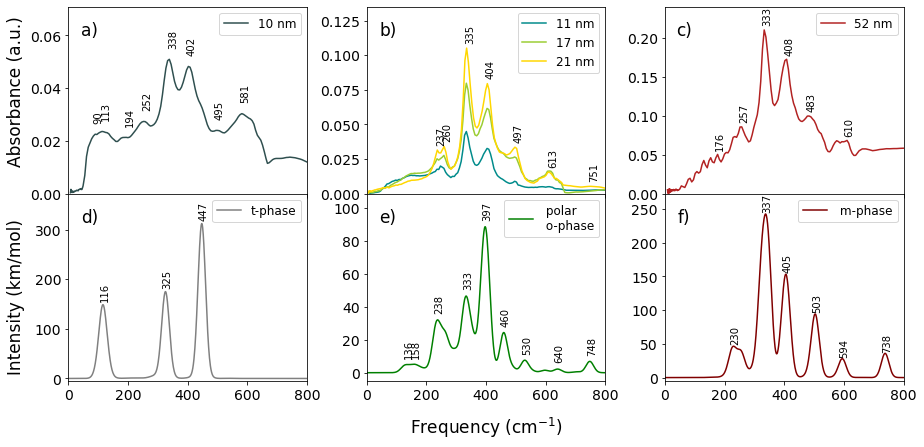

In [530]:
Image(filename="Theo_vs_Exp_tetra_mono_ortho.png") 

#### 9 subplots: 3 Exp, 3 theo pure phase, 3 mix two phases

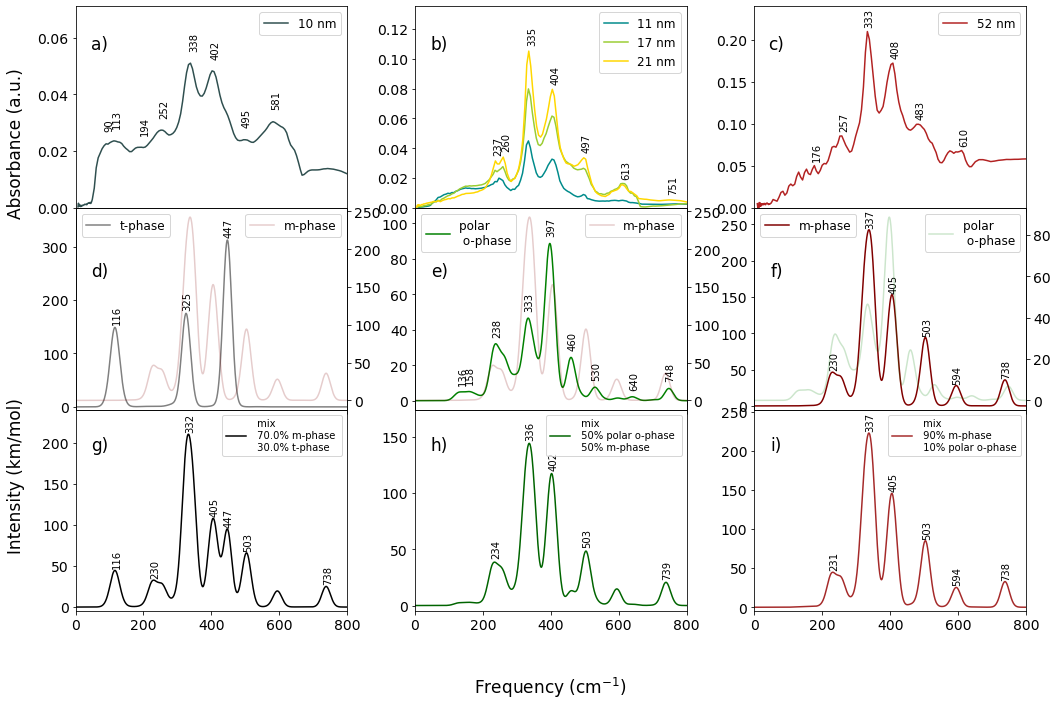

In [528]:
# creating figure and axes
fig, ax = plt.subplots(nrows=3, ncols=3 , sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# setting comon plotting params
alpha = 0.2
fontsize_mix = 10
ratio_to_plot_tetra = 0.7

## 10 nm ###
ax[0, 0].plot(d_HZO_exp['10'][:, 0], -np.log(d_HZO_exp['10'][:, 1]), c='darkslategray', 
     label='10 nm') #'HZO Exp 10 nm (mix t- and m-phase)')
ax[0, 0].legend(fontsize=12, title_fontsize=10)
ax[0, 0].set_ylim(0, max(-np.log(d_HZO_exp['10'][:, 1]))+0.02)
ax[0, 0].set_xlim(0, 800)

put_freq(x=d_HZO_exp['10'][:, 0], 
         Int=-np.log(d_HZO_exp['10'][:, 1]), 
         axis=ax[0, 0], 
         fontsize=10,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.02,
#              distance=0.0001,
         prominence=None,
         height=None)



####  TETRA137 + MONO14 THEORETICAL #############
ax1_0 = ax[1, 0].twinx()
ax1_0.plot(wvn_Average_HZO_all_MONO14_FIXDEF, Int_Average_HZO_all_MONO14_FIXDEF, c='maroon', alpha=alpha, 
     label='m-phase')
ax1_0.legend(fontsize=12)

ax[1, 0].plot(wvn_Average_HZO_all_TETRA137_FIXDEF, Int_Average_HZO_all_TETRA137_FIXDEF, c='gray', 
     label='t-phase')
ax[1, 0].legend(fontsize=12, loc='upper left') 
ax[1, 0].set_ylim(-5, max(Int_Average_HZO_all_TETRA137_FIXDEF)+60)
ax[1, 0].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_TETRA137_FIXDEF, 
         Int=Int_Average_HZO_all_TETRA137_FIXDEF, 
         axis=ax[1, 0], 
         fontsize=10,
         shift_Int= 10, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=50,
#              distance=0.0001,
         prominence=None,
         height=0)


            
### 11, 17, 21 nm ###
ax[0, 1].plot(d_HZO_exp['11'][:, 0], -np.log(d_HZO_exp['11'][:, 1]), c='darkcyan', 
     label='11 nm')
ax[0, 1].plot(d_HZO_exp['17'][:, 0], -np.log(d_HZO_exp['17'][:, 1]), c='yellowgreen', 
     label='17 nm')
ax[0, 1].plot(d_HZO_exp['21'][:, 0], -np.log(d_HZO_exp['21'][:, 1]), c='gold', 
     label='21 nm')
 
ax[0, 1].legend(fontsize=12) #, title='HZO Exp m- and polar o-phase (nm)', title_fontsize=10)
ax[0, 1].set_ylim(0, max(-np.log(d_HZO_exp['21'][:, 1]))+0.03)
ax[0, 1].set_xlim(0, 800)

put_freq(x=d_HZO_exp['21'][:, 0], 
         Int=-np.log(d_HZO_exp['21'][:, 1]), 
         axis=ax[0, 1], 
         fontsize=10,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.005,
#              distance=0.0001,
         prominence=None,
         height=None)


####  ORTHO29 + MONO14 THEORETICAL #############
ax1_1 = ax[1, 1].twinx()
ax1_1.plot(wvn_Average_HZO_all_MONO14_FIXDEF, Int_Average_HZO_all_MONO14_FIXDEF, c='maroon', alpha=alpha, 
     label='m-phase')
ax1_1.legend(fontsize=12)

ax[1, 1].plot(wvn_Average_HZO_all_FIXDEF, Int_Average_HZO_all_FIXDEF, c='green', 
     label='polar \n o-phase')
ax[1, 1].legend(fontsize=12, loc='upper left')
ax[1, 1].set_ylim(-5, max(Int_Average_HZO_all_FIXDEF)+20)
ax[1, 1].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_FIXDEF, 
         Int=Int_Average_HZO_all_FIXDEF, 
         axis=ax[1, 1], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=2,
#              distance=0.0001,
         prominence=None,
         height=0)

#### MONO14 THEORETICAL #############
ax1_2 = ax[1, 2].twinx()
ax1_2.plot(wvn_Average_HZO_all_FIXDEF, Int_Average_HZO_all_FIXDEF, c='green', alpha=alpha, 
     label='polar \n o-phase')
ax1_2.legend(fontsize=12)


ax[1, 2].plot(wvn_Average_HZO_all_MONO14_FIXDEF, Int_Average_HZO_all_MONO14_FIXDEF, c='maroon', 
     label='m-phase')
ax[1, 2].legend(fontsize=12, loc='upper left') 
ax[1, 2].set_ylim(-5, max(Int_Average_HZO_all_MONO14_FIXDEF)+30)
ax[1, 2].set_xlim(0, 800)

put_freq(x=wvn_Average_HZO_all_MONO14_FIXDEF, 
         Int=Int_Average_HZO_all_MONO14_FIXDEF, 
         axis=ax[1, 2], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=20,
#              distance=0.0001,
         prominence=None,
         height=0)


### 52 nm ###
ax[0, 2].plot(d_HZO_exp['52'][:, 0], -np.log(d_HZO_exp['52'][:, 1]), c='firebrick', 
     label='52 nm') 
ax[0, 2].legend(fontsize=12, title_fontsize=10)
ax[0, 2].set_ylim(0, max(-np.log(d_HZO_exp['52'][:, 1]))+0.03)
ax[0, 2].set_xlim(0, 800)

put_freq(x=d_HZO_exp['52'][:, 0], 
         Int=-np.log(d_HZO_exp['52'][:, 1]), 
         axis=ax[0, 2], 
         fontsize=10,
         shift_Int= 0.008, 
         shift_x= -8, 
         rotation=90, 
         width=0.005,
         threshold=0.05,
#              distance=0.0001,
         prominence=None,
         height=None)



#### MIX MONO14 ORTHO29 THEORETICAL #############
ax[2, 1].plot(mix_mono14_ortho29[0.5][:, 0], mix_mono14_ortho29[0.5][:, 1], c='darkgreen', 
     label=' mix \n 50% polar o-phase \n 50% m-phase')
ax[2, 1].legend(fontsize=fontsize_mix) #, title='HZO DFT', title_fontsize=10)
ax[2, 1].set_ylim(-5, max(mix_mono14_ortho29[0.5][:, 1])+30)
ax[2, 1].set_xlim(0, 800)

put_freq(x=mix_mono14_ortho29[0.5][:, 0], 
         Int= mix_mono14_ortho29[0.5][:, 1], 
         axis=ax[2, 1], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=20,
#              distance=0.0001,
         prominence=None,
         height=0)


#### MIX MONO14 ORTHO29 THEORETICAL #############
ax[2, 2].plot(mix_mono14_ortho29[0.9][:, 0], mix_mono14_ortho29[0.9][:, 1], c='brown', 
     label=' mix \n 90% m-phase \n 10% polar o-phase')
ax[2, 2].legend(fontsize=fontsize_mix) 
ax[2, 2].set_ylim(-5, max(mix_mono14_ortho29[0.9][:, 1])+30)
ax[2, 2].set_xlim(0, 800)

put_freq(x=mix_mono14_ortho29[0.9][:, 0], 
         Int= mix_mono14_ortho29[0.9][:, 1], 
         axis=ax[2, 2], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=20,
#              distance=0.0001,
         prominence=None,
         height=0)


ax[2, 0].plot(mix_mono14_tetra137[ratio_to_plot_tetra][:, 0], mix_mono14_tetra137[ratio_to_plot_tetra][:, 1],
             c='black', 
             label=f' mix \n {ratio_to_plot_tetra*100}% m-phase \n {round(1-ratio_to_plot_tetra, 1)*100}% t-phase')
ax[2, 0].legend(fontsize=fontsize_mix) 
ax[2, 0].set_ylim(-5, max(mix_mono14_tetra137[ratio_to_plot_tetra][:, 1])+30)
ax[2, 0].set_xlim(0, 800)

put_freq(x=mix_mono14_tetra137[ratio_to_plot_tetra][:, 0], 
         Int= mix_mono14_tetra137[ratio_to_plot_tetra][:, 1], 
         axis=ax[2, 0], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=20,
#              distance=0.0001,
         prominence=None,
         height=0)


    
# fig.text(0.38, 0.92, 'Average HZO - Tetra, Mono, Ortho', fontsize = 17)
fig.text(0.5, 0, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)


fig.text(0.05, 0.72, 'Absorbance (a.u.)', ha='center', va='center', rotation='vertical', fontsize = 17)
fig.text(0.05, 0.28, 'Intensity (km/mol)', ha='center', va='center', rotation='vertical', fontsize = 17)


plt.rcParams.update({'font.size': 14})
fig.set_size_inches(16.5, 10.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0)

# ax[0].annotate("a)", xy=(100, ))
fig.text(0.1202, 0.85, 'a)', ha='center', va='center', fontsize = 17)
fig.text(0.406, 0.85, 'b)', ha='center', va='center', fontsize = 17)
fig.text(0.69, 0.85, 'c)', ha='center', va='center', fontsize = 17)

fig.text(0.1202, 0.55, 'd)', ha='center', va='center', fontsize = 17)
fig.text(0.406, 0.55, 'e)', ha='center', va='center', fontsize = 17)
fig.text(0.69, 0.55, 'f)', ha='center', va='center', fontsize = 17)

fig.text(0.1202, 0.32, 'g)', ha='center', va='center', fontsize = 17)
fig.text(0.406, 0.32, 'h)', ha='center', va='center', fontsize = 17)
fig.text(0.69, 0.32, 'i)', ha='center', va='center', fontsize = 17)

# fig.savefig("Theo_vs_Exp_tetra_mono_ortho_9subplots.png", bbox_inches="tight")

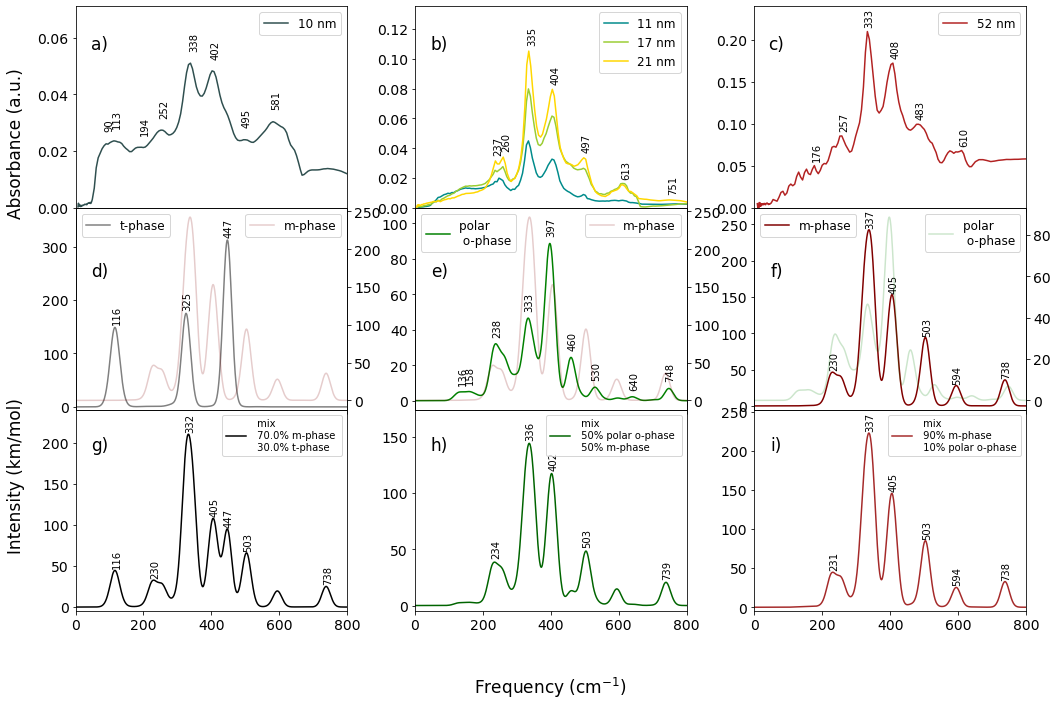

In [531]:
Image(filename="Theo_vs_Exp_tetra_mono_ortho_9subplots.png") 

#### 6 subplots:

- 10nm + mélange tetra 
- 11/17/21 + dégradé ortho/mono
- 52 nm + mono

0.0
0.1
here
0.2
here
0.3
here
0.4
here


Text(0.69, 0.45, 'f)')

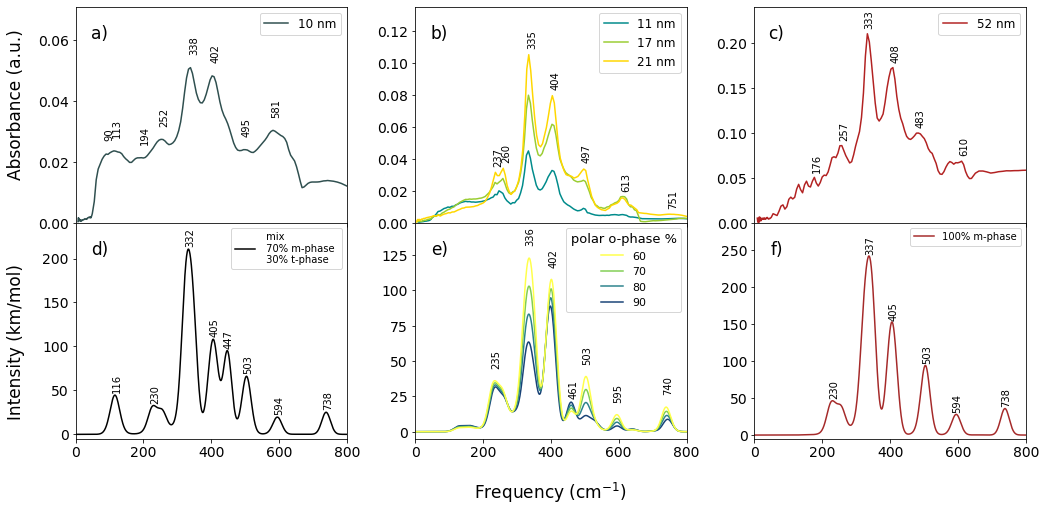

In [343]:
# creating figure and axes
fig, ax = plt.subplots(nrows=2, ncols=3 , sharex=True)

# white background to appears in dark jupyter theme
rect = fig.patch
rect.set_facecolor('white')

# setting comon plotting params
alpha = 0.2
fontsize_mix = 10
ratio_to_plot_tetra = 0.7000000000000001
ratio_to_plot_mono_52_theo = 1.0

## 10 nm ###
ax[0, 0].plot(d_HZO_exp['10'][:, 0], -np.log(d_HZO_exp['10'][:, 1]), c='darkslategray', 
     label='10 nm') #'HZO Exp 10 nm (mix t- and m-phase)')
ax[0, 0].legend(fontsize=12, title_fontsize=10)
ax[0, 0].set_ylim(0, max(-np.log(d_HZO_exp['10'][:, 1]))+0.02)
ax[0, 0].set_xlim(0, 800)

put_freq(x=d_HZO_exp['10'][:, 0], 
         Int=-np.log(d_HZO_exp['10'][:, 1]), 
         axis=ax[0, 0], 
         fontsize=10,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.02,
#              distance=0.0001,
         prominence=None,
         height=None)





            
### 11, 17, 21 nm ###
ax[0, 1].plot(d_HZO_exp['11'][:, 0], -np.log(d_HZO_exp['11'][:, 1]), c='darkcyan', 
     label='11 nm')
ax[0, 1].plot(d_HZO_exp['17'][:, 0], -np.log(d_HZO_exp['17'][:, 1]), c='yellowgreen', 
     label='17 nm')
ax[0, 1].plot(d_HZO_exp['21'][:, 0], -np.log(d_HZO_exp['21'][:, 1]), c='gold', 
     label='21 nm')
 
ax[0, 1].legend(fontsize=12) #, title='HZO Exp m- and polar o-phase (nm)', title_fontsize=10)
ax[0, 1].set_ylim(0, max(-np.log(d_HZO_exp['21'][:, 1]))+0.03)
ax[0, 1].set_xlim(0, 800)

put_freq(x=d_HZO_exp['21'][:, 0], 
         Int=-np.log(d_HZO_exp['21'][:, 1]), 
         axis=ax[0, 1], 
         fontsize=10,
         shift_Int= 0.005, 
         shift_x= -5, 
         rotation=90, 
         width=0.0001,
         threshold=0.005,
#              distance=0.0001,
         prominence=None,
         height=None)


### 52 nm ###
ax[0, 2].plot(d_HZO_exp['52'][:, 0], -np.log(d_HZO_exp['52'][:, 1]), c='firebrick', 
     label='52 nm') 
ax[0, 2].legend(fontsize=12, title_fontsize=10)
ax[0, 2].set_ylim(0, max(-np.log(d_HZO_exp['52'][:, 1]))+0.03)
ax[0, 2].set_xlim(0, 800)

put_freq(x=d_HZO_exp['52'][:, 0], 
         Int=-np.log(d_HZO_exp['52'][:, 1]), 
         axis=ax[0, 2], 
         fontsize=10,
         shift_Int= 0.008, 
         shift_x= -8, 
         rotation=90, 
         width=0.005,
         threshold=0.05,
#              distance=0.0001,
         prominence=None,
         height=None)



#### MIX MONO14 ORTHO29 THEORETICAL #############
ax[1, 2].plot(mix_mono14_ortho29[ratio_to_plot_mono_52_theo][:, 0], 
              mix_mono14_ortho29[ratio_to_plot_mono_52_theo][:, 1], c='brown', 
              label='100% m-phase')
ax[1, 2].legend(fontsize=fontsize_mix) 
ax[1, 2].set_ylim(-5, max(mix_mono14_ortho29[ratio_to_plot_mono_52_theo][:, 1])+45)
ax[1, 2].set_xlim(0, 800)

put_freq(x=mix_mono14_ortho29[ratio_to_plot_mono_52_theo][:, 0], 
         Int= mix_mono14_ortho29[ratio_to_plot_mono_52_theo][:, 1], 
         axis=ax[1, 2], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=20,
#              distance=0.0001,
         prominence=None,
         height=0)



#### MIX MONO14 TETRA137 THEORETICAL #############
ax[1, 0].plot(mix_mono14_tetra137[ratio_to_plot_tetra][:, 0], mix_mono14_tetra137[ratio_to_plot_tetra][:, 1],
             c='black', 
             label=f' mix \n {round(ratio_to_plot_tetra*100)}% m-phase \n {round((1-ratio_to_plot_tetra)*100)}% t-phase')
ax[1, 0].legend(fontsize=fontsize_mix) 
ax[1, 0].set_ylim(-5, max(mix_mono14_tetra137[ratio_to_plot_tetra][:, 1])+30)
ax[1, 0].set_xlim(0, 800)

put_freq(x=mix_mono14_tetra137[ratio_to_plot_tetra][:, 0], 
         Int= mix_mono14_tetra137[ratio_to_plot_tetra][:, 1], 
         axis=ax[1, 0], 
         fontsize=10,
         shift_Int= 5, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=10,
#              distance=0.0001,
         prominence=None,
         height=0)

#### MIX MONO14 ORTHO29 THEORETICAL #############
colors = plt.cm.YlGnBu_r(np.linspace(0, 1, 5))    

for key, color in zip(mix_mono14_ortho29, colors):
    print(key)
    if key in [0.1, 0.2, 0.3, 0.4]:
        print('here')
        ax[1, 1].plot(mix_mono14_ortho29[key][:, 0], mix_mono14_ortho29[key][:, 1], 
                  c=adjust_lightness(color, darker), label=round((1-key)*100)) 
    else:
        continue
    
ax[1, 1].set_ylim(-5, max(mix_mono14_ortho29[0.4][:, 1])+25)
ax[1, 1].set_xlim(0, 800)

handles, labels = ax[1, 1].get_legend_handles_labels()
ax[1,1].legend(handles[::-1], labels[::-1], title='polar o-phase %', title_fontsize= 13, fontsize=11)
    
put_freq(x=mix_mono14_ortho29[0.4][:, 0], 
         Int= mix_mono14_ortho29[0.4][:, 1], 
         axis=ax[1, 1], 
         fontsize=10,
         shift_Int= 10, 
         shift_x= -10, 
         rotation=90, 
#              width=0.002,
         threshold=10,
#              distance=0.0001,
         prominence=None,
         height=0)


    
fig.text(0.5, 0, 'Frequency (cm$^{-1}$)', ha='center', va='center', fontsize = 17)
fig.text(0.05, 0.72, 'Absorbance (a.u.)', ha='center', va='center', rotation='vertical', fontsize = 17)
fig.text(0.05, 0.28, 'Intensity (km/mol)', ha='center', va='center', rotation='vertical', fontsize = 17)


plt.rcParams.update({'font.size': 14})
fig.set_size_inches(16.5, 7.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0)

# ax[0].annotate("a)", xy=(100, ))
fig.text(0.1202, 0.85, 'a)', ha='center', va='center', fontsize = 17)
fig.text(0.406, 0.85, 'b)', ha='center', va='center', fontsize = 17)
fig.text(0.69, 0.85, 'c)', ha='center', va='center', fontsize = 17)

fig.text(0.1202, 0.45, 'd)', ha='center', va='center', fontsize = 17)
fig.text(0.406, 0.45, 'e)', ha='center', va='center', fontsize = 17)
fig.text(0.69, 0.45, 'f)', ha='center', va='center', fontsize = 17)

# fig.savefig("Theo_vs_Exp_tetra_mono_ortho_9subplots.png", bbox_inches="tight")

In [330]:
mix_mono14_ortho29

{0.0: array([[1.00000000e-03, 1.92004022e-14],
        [1.00100000e+00, 3.38689632e-14],
        [2.00100000e+00, 5.93816800e-14],
        ...,
        [1.14600000e+03, 0.00000000e+00],
        [1.14700000e+03, 0.00000000e+00],
        [1.14800000e+03, 0.00000000e+00]]),
 0.01: array([[1.00000000e-03, 1.95042030e-14],
        [1.00100000e+00, 3.43853747e-14],
        [2.00100000e+00, 6.02537043e-14],
        ...,
        [1.14600000e+03, 0.00000000e+00],
        [1.14700000e+03, 0.00000000e+00],
        [1.14800000e+03, 0.00000000e+00]]),
 0.02: array([[1.00000000e-03, 1.98080039e-14],
        [1.00100000e+00, 3.49017861e-14],
        [2.00100000e+00, 6.11257286e-14],
        ...,
        [1.14600000e+03, 0.00000000e+00],
        [1.14700000e+03, 0.00000000e+00],
        [1.14800000e+03, 0.00000000e+00]]),
 0.03: array([[1.00000000e-03, 2.01118048e-14],
        [1.00100000e+00, 3.54181975e-14],
        [2.00100000e+00, 6.19977529e-14],
        ...,
        [1.14600000e+03, 0.00000000e+